In [ ]:
'''
Jupyert Notebook to include crowding from background objects in our analysis. 
Will ellc light_3 method
to add light from other clusters stars (ignoring foreground/background objects)
and plot light curves

Crowding analysis has been completed with the Quest output files
These cluster-binary dta files can be downloaded for each observing scenario here:
https://northwestern.box.com/s/wb4cyw9ihne1lffkov4r988l0dk92lvl
'''

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy import units as u
from OpSim import OpSim
from TRILEGAL import TRILEGAL
from matplotlib import pyplot as plt
from vespa_update import trilegal

import ellc
from ellc import lc

In [3]:
# Getting OpSim data for later
# from OpSim import OpSim
OpSb = OpSim()
OpSb.dbFile = '/Users/andrewbowen/ceb_project/code/baseline2018a.db'
OpSb.getAllOpSimFields()

getting OpSim fields...
have summary cursor.
have field cursor.
returned 5292 fields


In [4]:
# !echo $PYTHONPATH
import cosmic

In [5]:
# Can print documentation on lc function if needed
# print(ellc.lc.__doc__)

In [6]:
# Reading in sammple binary table for M67
path ='/Users/andrewbowen/ceb_project/data/test_files/' # use your path							

OpSimDF = pd.read_csv(path + '2603output_file.csv', header = 0, nrows = 1)

# Binary dataframe, contains data on binaries in that OpSim field (p, ecc, inc. etc)
BinDF = pd.read_csv(path + '2603output_file.csv', header = 2)#Names for second data structure in files 


In [7]:
# Reading in Cluster files - cleaned files from Aaron

OCnames = ['ID','RA[hr]','Dec[deg]','dist[pc]','rhm[pc]','mass[Msun]','age[Myr]',\
           '[Fe/H]','sigma_v0_z[km/s]','OpSimID','OpSimRA[deg]','OpSimDec[deg]']

GCnames = ['ID','RA[hr]','Dec[deg]','dist[pc]','rhm[pc]','mass[Msun]','age[Myr]','[Fe/H]',\
           'sigma_v0_z[km/s]','OpSimID','OpSimRA[deg]','OpSimDec[deg]']

# Reading in GC/OC files for 
path = '/Users/andrewbowen/ceb_project/data/'
OCs = pd.read_csv(path + 'OC_data/OCdataForEBLSST.csv', sep = ',', header = 0, names = OCnames)
GCs = pd.read_csv(path + 'GC_data/GCdataForEBLSST.csv', sep = ',', header = 0, names = GCnames)





In [8]:
# Example from ellc's github
# t = np.arange(-0.25,0.75, 0.001)
# # spots_1 = [[30,180],[45,-45],[25,35],[0.2,0.8]]

# flux = ellc.lc(t,radius_1=0.2,radius_2=0.07,sbratio=0.6,\
#     incl=90, light_3 = 0.1,q=1,)#ld_1='quad',ldc_1=[0.65,0.2],ld_2='lin',ldc_2=0.45,\
#     #shape_1='poly3p0',shape_2='poly1p5',spots_1=spots_1)
# plt.plot(t,flux)
# plt.xlabel('phase')
# plt.ylabel('Flux')

light_3: 1.2531803332999247, additional 3rd light: 26.017600496308035%
light_3: 0.8748871239890155, additional 3rd light: 24.887357058690394%
light_3: 1.3076262519654513, additional 3rd light: 28.249484043848238%
light_3: 2.4075233045662134, additional 3rd light: 3.030955451761519%
light_3: 4.7278912740156045, additional 3rd light: 37.72132754747928%
light_3: 3.8550566105708217, additional 3rd light: 35.87619513505182%
light_3: 2.1371281466597902, additional 3rd light: 29.760889075556285%
light_3: 9.064273959491837, additional 3rd light: 44.87612358603171%
light_3: 4.893264287524641, additional 3rd light: 23.95528930368839%
light_3: 4.422045753683257, additional 3rd light: 2.506800766501449%


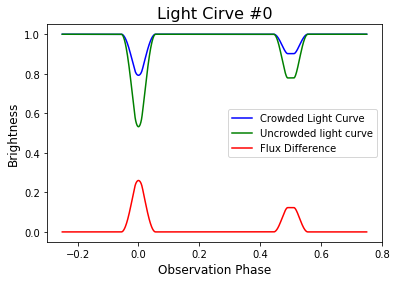

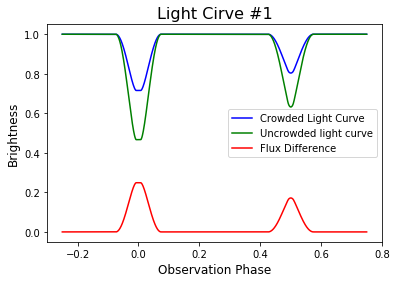

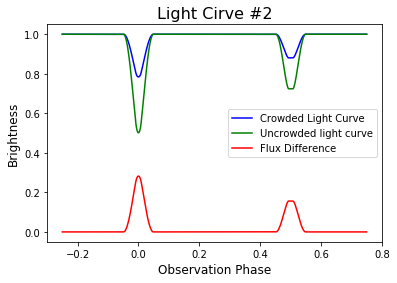

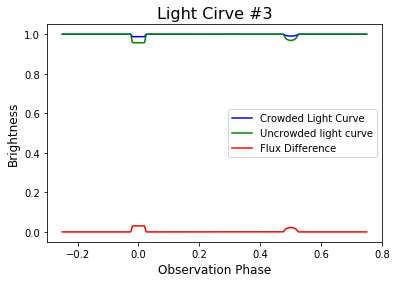

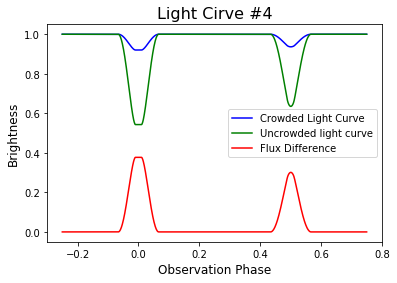

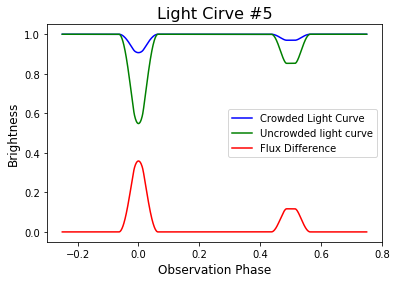

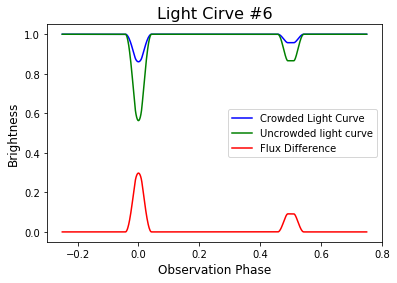

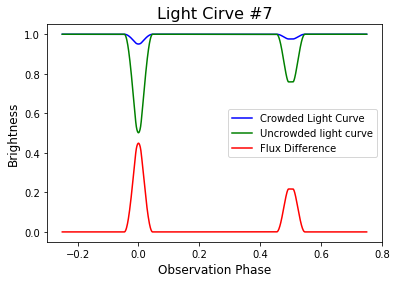

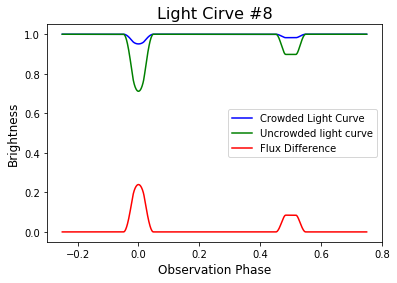

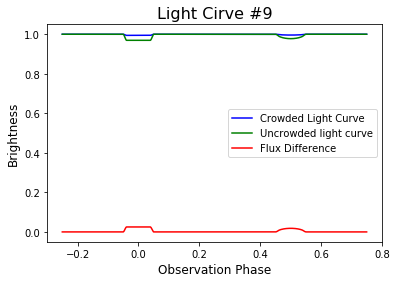

In [9]:
# Plotting light curves, varying binary params for each binary first (with a control binary with same values but no light3)
from ellc import lc
t = np.arange(-0.25,0.75, 0.001)#times of observations (phase), same for every binary

# Loop to plot light curves for 5 binaries with differing light_3 values, will compare to a control binary

for x in range(0,10):
    
    light3 = np.random.uniform(0,10)

    i  = np.random.normal(90,0.1)
    r1 = np.random.uniform(0,0.3)
    r2 = np.random.uniform(0,0.3)
    SB = np.random.uniform(0.4,0.7)
    massRatio = np.random.normal(0.5,0.1)    
    
#     Flux values with differing light_3
    flux = ellc.lc(t,radius_1=r1,radius_2=r2,sbratio=SB,\
        incl=i, light_3 = light3, q=massRatio, ld_1 = 'claret', ldc_1 = [.6496, -1.0768, 1.8769, -0.4829], 
               ld_2 = 'claret', ldc_2 = [.6496, -1.0768, 1.8769, -0.4829],
               shape_1 = 'sphere', shape_2 = 'sphere')
#     borrowed limb-darkening stuff from ugrizzly code, same as control so we're good to use it in both

    
#     Test flux (no 3rd-party light) to compare to generated flux
    control_flux = ellc.lc(t,radius_1=r1,radius_2=r2,sbratio=SB,\
        incl=i, light_3 = 0.,q=massRatio, ld_1 = 'claret', ldc_1 = [.6496, -1.0768, 1.8769, -0.4829], 
               ld_2 = 'claret', ldc_2 = [.6496, -1.0768, 1.8769, -0.4829],
               shape_1 = 'sphere', shape_2 = 'sphere')
    
    fluxdiff = (flux - control_flux)
    print(f'light_3: {light3}, additional 3rd light: {np.max(fluxdiff) * 100}%')


    f,ax = plt.subplots(figsize = (6,4))
    ax.plot(t,flux, color = 'blue', label = 'Crowded Light Curve')
    ax.plot(t,control_flux, color = 'green', label = 'Uncrowded light curve')
    ax.plot(t,fluxdiff, color = 'red', label = 'Flux Difference')
    ax.set_xlabel('Observation Phase', fontsize = 12)
    ax.set_ylabel('Brightness', fontsize = 12)
    ax.set_title(f'Light Cirve #{x}', fontsize = 16)
    ax.legend()
    f.savefig(f'/Users/andrewbowen/ceb_project/plots/lightCurves/lightcurve{x}.pdf')
    

Input Params:

Inclination: 90.12034073994553
Radius 1:0.13007038854939484
Radius 2:0.2497697882891781
Surface Brightness ratio:0.6880531042512772
q:0.5207270275528892
 
light_3: 26.864721926295264, additional 3rd light: 27.256811762325807%
light_3: 15.02532964421115, additional 3rd light: 26.50723667493794%
light_3: 59.54119037663769, additional 3rd light: 27.804428688121163%
light_3: 47.12308288942918, additional 3rd light: 27.683925528084806%
light_3: 88.36908988656987, additional 3rd light: 27.95506238234453%
light_3: 88.07259365134313, additional 3rd light: 27.954009365863918%
light_3: 88.55136051833294, additional 3rd light: 27.955706261838543%
light_3: 23.776354892013252, additional 3rd light: 27.130342728641065%
light_3: 37.74008532240186, additional 3rd light: 27.541635322137036%
light_3: 19.64273719141545, additional 3rd light: 26.901849659949338%


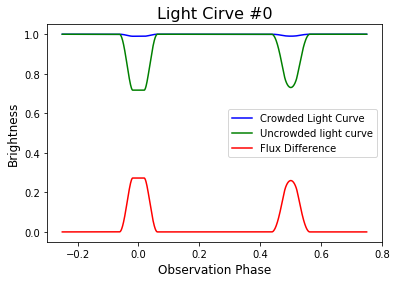

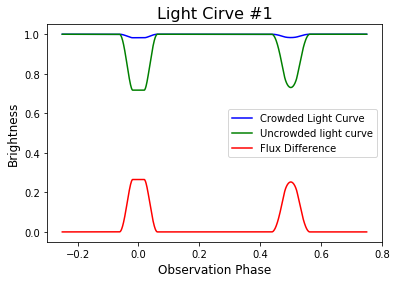

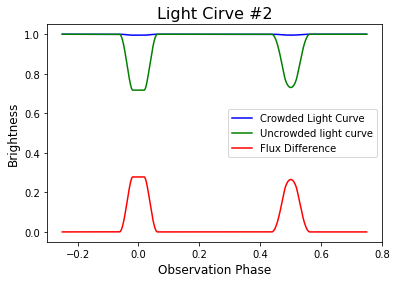

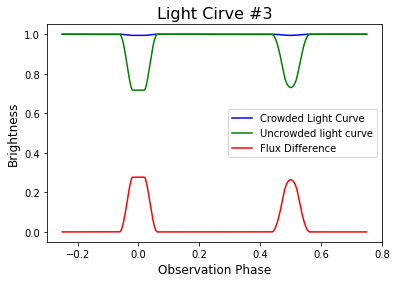

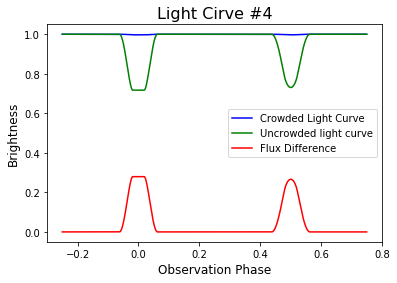

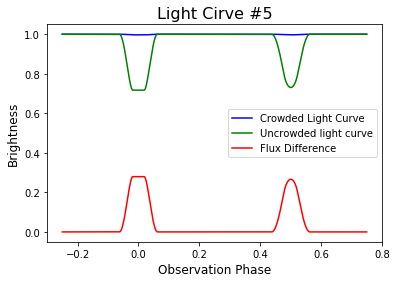

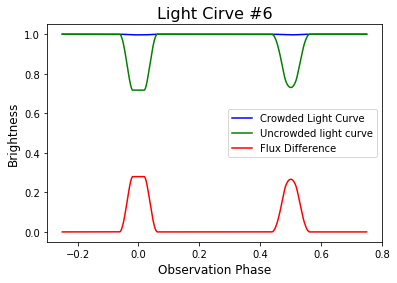

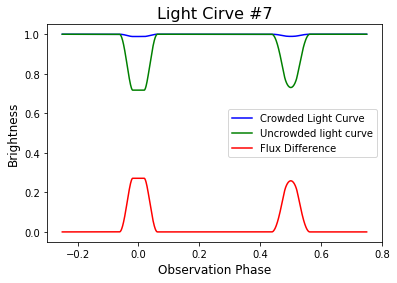

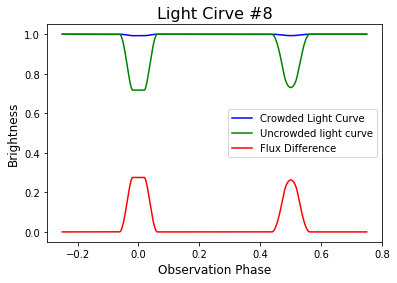

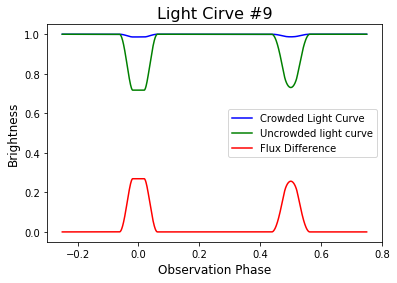

In [10]:
# All the same binaries, only varying the light_3 values (bigger spread)

t = np.arange(-0.25,0.75, 0.001)#times of observations (phase), same for every binary
i  = np.random.normal(90,0.1)
r1 = np.random.uniform(0,0.3)
r2 = np.random.uniform(0,0.3)
SB = np.random.uniform(0.4,0.7)
massRatio = np.random.normal(0.5,0.1)  

print('Input Params:\n')
print(f'Inclination: {i}')
print(f'Radius 1:{r1}')
print(f'Radius 2:{r2}')
print(f'Surface Brightness ratio:{SB}')
print(f'q:{massRatio}')
print(' ')

for x in range(0,10):
    
#     Changin only the additional light, other binary characteristics are the same
    light3 = np.random.uniform(0,100)
  
    
#     Flux values with differing light_3
    flux = ellc.lc(t,radius_1=r1,radius_2=r2,sbratio=SB,\
        incl=i, light_3 = light3, q=massRatio, ld_1 = 'claret', ldc_1 = [.6496, -1.0768, 1.8769, -0.4829], 
               ld_2 = 'claret', ldc_2 = [.6496, -1.0768, 1.8769, -0.4829],
               shape_1 = 'sphere', shape_2 = 'sphere')
#     borrowed limb-darkening stuff from ugrizzly code, same as control so we're good to use it in both

    
#     Test flux (no 3rd-party light) to compare to generated flux
    control_flux = ellc.lc(t,radius_1=r1,radius_2=r2,sbratio=SB,\
        incl=i, light_3 = 0.,q=massRatio, ld_1 = 'claret', ldc_1 = [.6496, -1.0768, 1.8769, -0.4829], 
               ld_2 = 'claret', ldc_2 = [.6496, -1.0768, 1.8769, -0.4829],
               shape_1 = 'sphere', shape_2 = 'sphere')
    
    fluxdiff = (flux - control_flux)
    print(f'light_3: {light3}, additional 3rd light: {np.max(fluxdiff) * 100}%')


    f,ax = plt.subplots(figsize = (6,4))
    ax.plot(t,flux, color = 'blue', label = 'Crowded Light Curve')
    ax.plot(t,control_flux, color = 'green', label = 'Uncrowded light curve')
    ax.plot(t,fluxdiff, color = 'red', label = 'Flux Difference')
    ax.set_xlabel('Observation Phase', fontsize = 12)
    ax.set_ylabel('Brightness', fontsize = 12)
    ax.set_title(f'Light Cirve #{x}', fontsize = 16)
    ax.legend()
    f.savefig(f'/Users/andrewbowen/ceb_project/plots/lightCurves/sameLightCurve{x}.pdf')
    

In [11]:
# Looping through every binary in our Binary dataframe
Msun = (2 * 10**30)#Solar mass in kg
Rsun = (7 * 10**5)#Solar radius in km
obsDates = []
fluxes = []
n = 0
for index, binary in BinDF.iterrows():
#     Checking for binaries that actually eclipse, we don't need ones with inc = 150deg
    if binary['LSM_PERIOD'] != -999.0:
        t = np.arange(-0.25,0.75, 0.001)#Observation time array
        obsDates.append(t)#Appending to a list for plotting

    #     Calculating the semimajor axis (for radii inputs to lc)
        p = binary['p']
        m1 = binary['m1'] * Msun#Component mass converted to kg
        m2 = binary['m2'] * Msun
        q = m1 / m2
        G = 6.67408e-20 / (24 *3600) # units of km, kg,days
        a = np.cbrt((G * (m1 + m1) * (p**2))/(4 * np.pi**2))
        r1 = binary['r1'] * a / Rsun#binary radii, in units of semimajor axis
        r2 = binary['r2'] * a / Rsun
        if r1 > 1:
            r1 = 0.015
    #     print(f'a, r1, r2: {a, r1, r2}')

    #     Other lc inputs
        SBratio = np.random.uniform(0,0.5)#Surface brightness ratio, drawn from Gaussian
        inc = binary['i']#inclination
        light3 = np.random.uniform(0,10)#3rd party light from other sources using random values for now

    #     Generate a light curve 
        flux = ellc.lc(t, radius_1 = r1, radius_2=r2,sbratio = SBratio, \
                      incl =  inc, light_3 = light3, period = p, q = q)
    #     Appending light curve to a list of other light curves, can plot later
        fluxes.append(flux)

        n+= 1
        print(f'Binary # {n}, flux value: {flux[0]}')

Binary # 1, flux value: 1.0
Binary # 2, flux value: 1.0
Binary # 3, flux value: 1.0
Binary # 4, flux value: 1.0
Binary # 5, flux value: 1.0
Binary # 6, flux value: 1.0
Binary # 7, flux value: 1.0
Binary # 8, flux value: 1.0
Binary # 9, flux value: 1.0
Binary # 10, flux value: 1.0
Binary # 11, flux value: 1.0
Binary # 12, flux value: 1.0
Binary # 13, flux value: 0.9879749239955902
Binary # 14, flux value: 1.0
Binary # 15, flux value: 1.0
Binary # 16, flux value: 1.0
Binary # 17, flux value: 1.0
Binary # 18, flux value: 1.0
Binary # 19, flux value: 1.0
Binary # 20, flux value: 1.0
Binary # 21, flux value: 1.0
Binary # 22, flux value: 1.0
Binary # 23, flux value: 1.0
Binary # 24, flux value: 1.0
Binary # 25, flux value: 1.0
Binary # 26, flux value: 1.0
Binary # 27, flux value: 1.0
Binary # 28, flux value: 1.0
Binary # 29, flux value: 1.0
Binary # 30, flux value: 1.0
Binary # 31, flux value: 1.0
Binary # 32, flux value: 1.0
Binary # 33, flux value: 1.0
Binary # 34, flux value: 1.0
Binary #

Binary # 277, flux value: 1.0
Binary # 278, flux value: 1.0
Binary # 279, flux value: 1.0
Binary # 280, flux value: 1.0
Binary # 281, flux value: 1.0
Binary # 282, flux value: 1.0
Binary # 283, flux value: 1.0
Binary # 284, flux value: 1.0
Binary # 285, flux value: 1.0
Binary # 286, flux value: 1.0
Binary # 287, flux value: 1.0
Binary # 288, flux value: 1.0
Binary # 289, flux value: 1.0
Binary # 290, flux value: 1.0
Binary # 291, flux value: 1.0
Binary # 292, flux value: 1.0
Binary # 293, flux value: 1.0
Binary # 294, flux value: 1.0
Binary # 295, flux value: 1.0
Binary # 296, flux value: 1.0
Binary # 297, flux value: 1.0
Binary # 298, flux value: 1.0
Binary # 299, flux value: 1.0
Binary # 300, flux value: 1.0
Binary # 301, flux value: 1.0
Binary # 302, flux value: 1.0
Binary # 303, flux value: 1.0
Binary # 304, flux value: 1.0
Binary # 305, flux value: 1.0
Binary # 306, flux value: 1.0
Binary # 307, flux value: 1.0
Binary # 308, flux value: 1.0
Binary # 309, flux value: 1.0
Binary # 3

Binary # 550, flux value: 1.0
Binary # 551, flux value: 1.0
Binary # 552, flux value: 1.0
Binary # 553, flux value: 1.0
Binary # 554, flux value: 1.0
Binary # 555, flux value: 1.0
Binary # 556, flux value: 1.0
Binary # 557, flux value: 1.0
Binary # 558, flux value: 1.0
Binary # 559, flux value: 1.0
Binary # 560, flux value: 1.0
Binary # 561, flux value: 1.0
Binary # 562, flux value: 1.0
Binary # 563, flux value: 1.0
Binary # 564, flux value: 1.0
Binary # 565, flux value: 1.0
Binary # 566, flux value: 1.0
Binary # 567, flux value: 1.0
Binary # 568, flux value: 1.0
Binary # 569, flux value: 1.0
Binary # 570, flux value: 1.0
Binary # 571, flux value: 1.0
Binary # 572, flux value: 1.0
Binary # 573, flux value: 1.0
Binary # 574, flux value: 1.0
Binary # 575, flux value: 1.0
Binary # 576, flux value: 1.0
Binary # 577, flux value: 1.0
Binary # 578, flux value: 1.0
Binary # 579, flux value: 1.0
Binary # 580, flux value: 1.0
Binary # 581, flux value: 1.0
Binary # 582, flux value: 1.0
Binary # 5

In [12]:
# Reading in Cluster files - cleaned files from Aaron

OCnames = ['ID','RA[hr]','Dec[deg]','dist[pc]','rhm[pc]','mass[Msun]','age[Myr]',\
           '[Fe/H]','sigma_v0_z[km/s]','OpSimID','OpSimRA[deg]','OpSimDec[deg]']

GCnames = ['ID','RA[hr]','Dec[deg]','dist[pc]','rhm[pc]','mass[Msun]','age[Myr]','[Fe/H]',\
           'sigma_v0_z[km/s]','OpSimID','OpSimRA[deg]','OpSimDec[deg]']

# Reading in GC/OC files for 
path = '/Users/andrewbowen/ceb_project/data/'
OCs = pd.read_csv(path + 'OC_data/OCdataForEBLSST.csv', sep = ',', header = 0, names = OCnames)
GCs = pd.read_csv(path + 'GC_data/GCdataForEBLSST.csv', sep = ',', header = 0, names = GCnames)




In [13]:
OCs

ID        RA[hr]       Dec[deg]     dist[pc]   rhm[pc]  \
0     [KPS2012]_MWSC_4688  23 51 54.000  -86 43 12.000  1336.000000  3.207156   
1     [KPS2012]_MWSC_5684  12 53 43.000  -86 38 54.000  1432.000000  3.207156   
2     [KPS2012]_MWSC_5692  17 47 20.000  -86 36 36.000  1555.000000  3.207156   
3     [KPS2012]_MWSC_4005  00 11 28.000  -85 28 48.000  1159.000000  3.207156   
4     [KPS2012]_MWSC_4176  14 27 18.000  -85 25 12.000  1093.000000  3.207156   
...                   ...           ...            ...          ...       ...   
3348           C_0845-527  08 46 27.706  -52 54 03.240  2866.792019  3.207156   
3349          Av-hunter_1  23 37 13.898   48 24 36.756  2866.792019  3.207156   
3350            Latysev_1  02 52 27.202   27 28 16.068  2866.792019  3.207156   
3351          Cl_Basel_11  07 17 06.074  -13 57 26.100  2866.792019  3.207156   
3352         Cl_Loden_336  11 19 50.021  -58 51 26.028  2866.792019  3.207156   

      mass[Msun]     age[Myr]    [Fe/H]  sigma_v0_z[km/s]  OpSimID  \
0      28.500000  2454.708916 -0.497417          0.085695      9.0   
1      26.000000  1513.561248 -0.497417          0.081850      2.0   
2      14.000000   851.138038 -0.497417          0.060062      5.0   
3      21.000000  2371.373706 -0.497417          0.073560      9.0   
4      77.500000  2065.380156 -0.497417          0.141313      7.0   
...          ...          ...       ...               ...      ...   
3348  527.610711  1215.635057 -0.497417          0.368714    533.0   
3349    5.000000  1215.635057 -0.497417          0.035894   4671.0   
3350  527.610711  1215.635057 -0.497417          0.368714   3921.0   
3351   15.000000   316.227766 -0.497417          0.062170   1982.0   
3352  527.610711  1215.635057 -0.497417          0.368714    376.0   

      OpSimRA[deg]  OpSimDec[deg]  
0         0.000000     -85.272892  
1       180.000000     -87.568555  
2       252.001105     -87.568547  
3         0.000000     -85.272892  
4       215.999822     -85.272913  
...            ...            ...  
3348    131.349823     -52.971762  
3349    355.667007      49.754549  
3350     42.426985      28.759876  
3351    109.665827     -14.733594  
3352    169.065921     -59.242205  

[3353 rows x 12 columns]

In [14]:
oc_mean_mass = np.mean(OCs['mass[Msun]'].loc[np.isfinite(OCs['mass[Msun]'])].values)
gc_mean_mass = np.mean(GCs['mass[Msun]'].values)
print(f'Open cluster mean mass: {oc_mean_mass}')
print(f'Globular cluster mean mass: {gc_mean_mass}')

print(np.nanmin(OCs['mass[Msun]']))

Open cluster mean mass: 527.6107114884343
Globular cluster mean mass: 236853.03103705615
3.0


In [15]:
# Estimating # of stars per LSST resolution element (1 pixel)
# https://www.lsst.org/scientists/keynumbers
# pixel pitch - 10 micron (0.2 arcsec) - each pixel contains 0.2 arcsec

In [16]:
pixelCount = 3.2e9 # Total # of pixels in LSST (3.2 Gpixel)

# plotting colors
carolinaBlue = '#99badd'
bearsBlue = '#0a162b'

In [17]:
# Using Plummer model to draw a random 2D 'projected distance'
# Will use this distance to find the cluster location for binaries
#     Can estimate cluster densities at each of these pointsd

def getPosition(rhm):
    """Function to get x and y coordinates on 2-D projection of cluster (circular shape)
    From Kroupa paper
    """
    X1 = np.random.random()
    X2 = np.random.random()
    X3 = np.random.random()
    zeta = 1/np.sqrt(X1**(-2/3) - 1)
    a = rhm / 1.305
    r = a * zeta
    z = (2 * X2 * r) - r
    
    theta = 2 * np.pi * X3
    
#     Need the radicand to be positive - using abs()
    x = np.sqrt(r**2 - z**2) * np.cos(theta)
    y = np.sqrt(r**2 - z**2) * np.sin(theta)
    d = np.sqrt(x**2 + y**2)
    
    return x,y,d


(-10, 10)

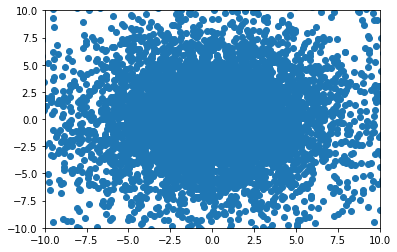

In [18]:
# Getting 1000 different random positions 
dGC = []
dOC = []
xGC = []
yGC = []

for i in range(0,10000):

    testGC = getPosition(np.mean(GCs['rhm[pc]']))
    xGC.append(testGC[0])
    yGC.append(testGC[1])

    
    testOC = getPosition(np.mean(OCs['rhm[pc]']))
    xOC = testOC[0]
    yOC = testOC[1]
    dGC.append(testGC[2])
    dOC.append(testOC[2])

f,ax = plt.subplots()
ax.scatter(xGC,yGC)
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)



In [19]:
def projMassDensity(Mass, d, a):
    """Function to get the projected mass density from Plummer model"""
    Sigma = (Mass/(np.pi*a**2)) / ((1 + (d/a)**2)**2)
    return Sigma

x = np.linspace(0,100,10000)

# Mean values of GC/OC distributions
ocMass = np.mean(OCs['mass[Msun]'])
gcMass = np.mean(GCs['mass[Msun]'])
aOC = np.median(OCs['rhm[pc]']) / 1.305#Plummer scale length
aGC = np.median(GCs['rhm[pc]']) / 1.305

# Projected density arrays (to plot)
sigmaGC = projMassDensity(1, x, aGC)
sigmaOC = projMassDensity(1, x, aOC)

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.0160345 , 0.06137344, 0.09897158, 0.1437576 , 0.16255667,
        0.18301449, 0.19296694, 0.19849607, 0.21453058, 0.20900144,
        0.21121309, 0.2073427 , 0.19573151, 0.19462568, 0.19849607,
        0.17748535, 0.16200376, 0.15094548, 0.15315714, 0.14320469,
        0.1277231 , 0.11279443, 0.11777065, 0.09

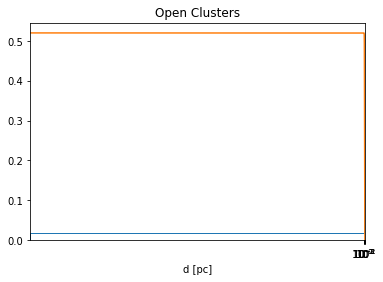

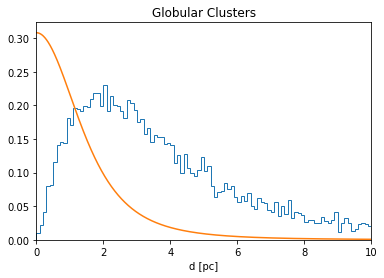

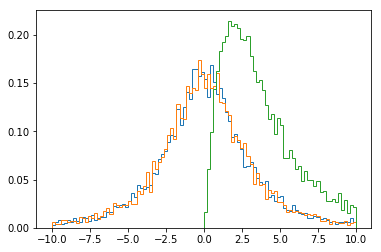

In [20]:
# Histogram of random d's with sigma function line plotted above: OCs
f,ax = plt.subplots()
ax.hist(np.array(dOC) , bins = 100,range = (0,10), histtype = 'step',density = True)
ax.plot(x, sigmaOC*5)
ax.set_xlim(0.0,10)
ax.set_xscale('log')
ax.set_xlabel('d [pc]')
ax.set_title('Open Clusters')

# Histogram of random d's with sigma function line plotted above: OCs
f,ax = plt.subplots()
ax.hist(dGC, bins = 100,range = (0,10), histtype = 'step', \
         density = True)
ax.plot(x, sigmaGC*5)
ax.set_xlim(0.0,10)

ax.set_xlabel('d [pc]')
ax.set_title('Globular Clusters')


f,ax = plt.subplots()
ax.hist(xGC, bins = 100,range = (-10,10), histtype = 'step', \
         density = True)
ax.hist(yGC, bins = 100,range = (-10,10), histtype = 'step', \
         density = True)
ax.hist(dGC, bins = 100,range = (-10,10), \
        histtype = 'step', density = True)

Text(0.5,1,'OCs')

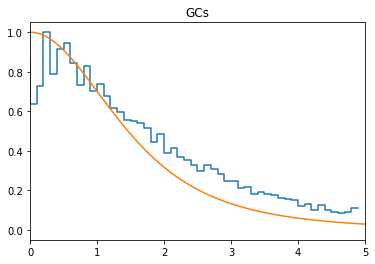

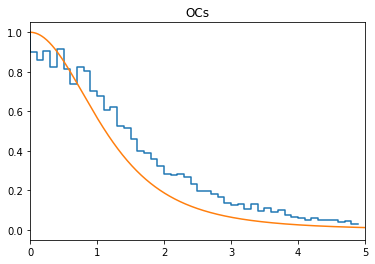

In [21]:
N, binEdge = np.histogram(dGC, bins = 50, range = (0,5), density = True)
area = []
for i in range(0,len(binEdge)-1):
    area.append(np.pi*(binEdge[i+1]**2. - binEdge[i]**2.))

f,ax = plt.subplots()
st = N/np.array(area)
ax.step(binEdge[:-1], st/max(st))
ax.plot(x, sigmaGC/max(sigmaGC))
ax.set_xlim(0,5)
ax.set_title('GCs')

N, binEdge = np.histogram(dOC, bins = 50, range = (0,5), density = True)
area = []
for i in range(0,len(binEdge)-1):
    area.append(np.pi*(binEdge[i+1]**2. - binEdge[i]**2.))

f,ax = plt.subplots()
st = N/np.array(area)
ax.step(binEdge[:-1], st/max(st))
ax.plot(x, sigmaOC/max(sigmaOC))
ax.set_xlim(0,5)
ax.set_title('OCs')

In [22]:
# New db file
# http://astro-lsst-01.astro.washington.edu:8080

In [23]:
def projMassDensity(Mass, d, a):
    """Function to get the projected mass density from Plummer model"""
    Sigma = (Mass/np.pi*a) / ((1 + (d/a)**2)**2)
    return Sigma

In [24]:
# Plots from Aaron's email: single rhm value (one for OCs and one for GCs), draw random 2D positions (d) w Plummer model
# Plot true Plummer line

gc2Ddist = []
oc2Ddist = []
ocRhm = np.mean(OCs['rhm[pc]'])
gcRhm = np.mean(GCs['rhm[pc]'])
for i in range(0,int(1e5)):
#   Using getPosition function with GC mean mass
    r = getPosition(gcRhm)
    
#     Turning distance vector into single radial distance
    dGlobular = np.sqrt(r[0] ** 2 + r[1] ** 2)
    gc2Ddist.append(dGlobular)
    
#     Using getPosition function with OC mean mass
    r = getPosition(ocRhm)
    
#     Turning distance vector into single radial distance
    dOpen = np.sqrt(r[0] ** 2 + r[1] ** 2)
    oc2Ddist.append(dOpen)
    
# Rewrite getPosition function

In [25]:
# Projected mass density lines
def projMassDensity(Mass, d, a):
    """Function to get the projected mass density from Plummer model"""
    Sigma = (Mass/np.pi*(a**2)) / ((1 + (d/a)**2)**2)
    return Sigma

x = np.linspace(0,1000,10000)
# y = projMassDensity()

# Mean values of GC/OC distributions
ocMass = np.mean(OCs['mass[Msun]'])
gcMass = np.mean(GCs['mass[Msun]'])
aOC = ocRhm / 1.305#Plummer scale length
aGC = gcRhm / 1.305

# Projected density arrays (to plot)
sigmaGC = projMassDensity(1, x, aGC)
sigmaOC = projMassDensity(1, x, aOC)

print(ocMass, gcMass, aOC, aGC)
print(sigmaGC)

527.6107114884343 236853.03103705606 2.457591038486264 3.301655442984109
[3.46987336e+00 3.46351464e+00 3.44454301e+00 ... 4.12646963e-10
 4.12481898e-10 4.12316915e-10]


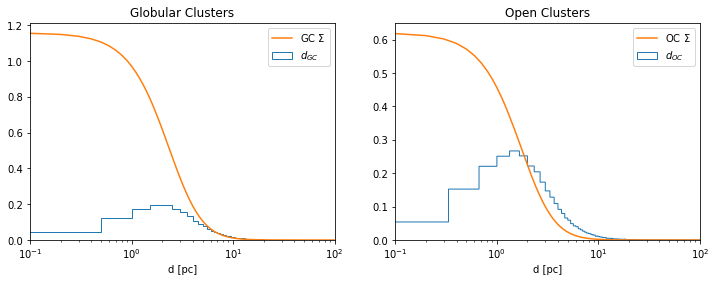

In [26]:
# Side-by-side panel plot
f,axarr = plt.subplots(1,2, figsize = (12,4))# Histogram of random d's with sigma function line plotted above: GCs
# f,axarr = plt.subplots()
axarr[0].hist(gc2Ddist, bins = 200, range = (0,100), histtype = 'step', \
     density = True, label = '$d_{GC}$')
axarr[0].plot(x, sigmaGC/3., label = 'GC $\Sigma$')
axarr[0].set_xlim(0.1,100)
axarr[0].set_xscale('log')
axarr[0].set_xlabel('d [pc]')
axarr[0].set_title('Globular Clusters')
axarr[0].legend()

# Histogram of random d's with sigma function line plotted above: OCs
axarr[1].hist(oc2Ddist, bins = 3000, range = (0,1000), histtype = 'step', \
         density = True, label = '$d_{OC}$')
axarr[1].plot(x, sigmaOC/3.1, label = 'OC $\Sigma$')
axarr[1].set_xlim(0.1,100)
axarr[1].set_xscale('log')
axarr[1].set_xlabel('d [pc]')
axarr[1].set_title('Open Clusters')

axarr[1].legend()

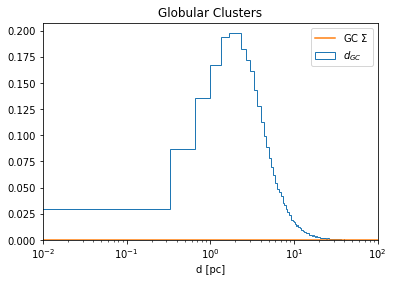

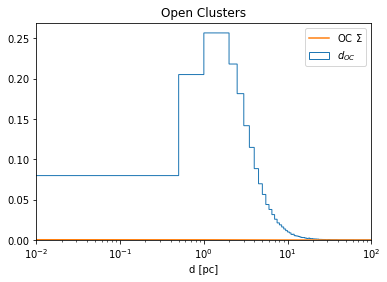

In [27]:
# Histogram of random d's with sigma function line plotted above: GCs
f,ax = plt.subplots()
ax.hist(gc2Ddist, bins = 300, range = (0,100), histtype = 'step', \
     density = True, label = '$d_{GC}$')
ax.plot(x, sigmaGC/1e7, label = 'GC $\Sigma$')
ax.set_xlim(0.01,100)
ax.set_xscale('log')
ax.set_xlabel('d [pc]')
ax.set_title('Globular Clusters')
ax.legend()

# Histogram of random d's with sigma function line plotted above: OCs
f,ax = plt.subplots()
ax.hist(oc2Ddist, bins = 2000,range = (0,1000), histtype = 'step', \
         density = True, label = '$d_{OC}$')
ax.plot(x, sigmaOC/5550, label = 'OC $\Sigma$')
ax.set_xlim(0.01,100)
ax.set_xscale('log')
ax.set_xlabel('d [pc]')
ax.set_title('Open Clusters')

ax.legend()

In [28]:
# For every binary. draw one random distance
# Get the surface dnesity at that distance
# Figure out how many sources are in a pixel at that distance
# Depends on cluster mass, distance, half-mass radius
# Then utilize the light_3  - added up from # of stars present


In [29]:
# Try 3-d mass density (rho formula in Heggie & Hut) 
# to see if there is a difference between that and projected mass density

(array([  5.,   5.,   6.,   6.,  10.,   5.,  21.,  18.,  23.,  31.,  41.,
         56.,  70.,  87., 107., 119., 132., 148., 170., 143., 174., 148.,
        198., 165., 141., 153., 114., 121.,  94.,  78.,  65.,  59.,  46.,
         39.,  41.,  33.,  47.,  33.,  25.,  24.,  24.,  31.,  35.,  21.,
         21.,  34.,  14.,  16.,  12.,  16.,  12.,  11.,  11.,   6.,  13.,
          7.,   7.,   8.,   6.,   8.,   4.,   5.,   1.,   1.,   3.,   1.,
          2.,   1.,   4.,   4.,   1.,   0.,   0.,   0.,   2.,   1.,   2.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   1.,
          2.]),
 array([0.47712125, 0.52657957, 0.57603788, 0.6254962 , 0.67495451,
        0.72441283, 0.77387114, 0.82332946, 0.87278777, 0.92224609,
        0.9717044 , 1.02116272, 1.07062103, 1.12007935, 1.16953766,
        1.21899598, 1.26845429, 1.31791261, 1.36737092, 1.41682924,
        1.46628755, 1.51574587, 1.56520418, 1.

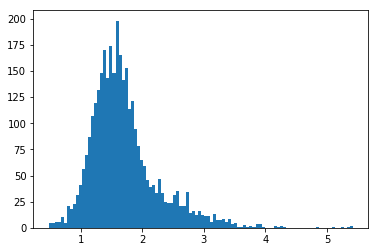

In [30]:
ocMass = OCs['mass[Msun]']
plt.hist(np.log10(ocMass), bins = 100)

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        1., 0., 0., 2., 3., 0., 1., 2., 0., 0., 3., 3., 0., 2., 2., 1., 0.,
        0., 2., 3., 3., 2., 1., 1., 4., 1., 4., 5., 1., 6., 4., 1., 8., 2.,
        5., 4., 6., 6., 4., 4., 5., 8., 4., 2., 2., 3., 5., 2., 5., 0., 3.,
        2., 1., 1., 2., 2., 0., 4., 0., 1., 0., 0., 0., 1., 0., 1.]),
 array([2.39703, 2.43667, 2.47631, 2.51595, 2.55559, 2.59523, 2.63487,
        2.67451, 2.71415, 2.75379, 2.79343, 2.83307, 2.87271, 2.91235,
        2.95199, 2.99163, 3.03127, 3.07091, 3.11055, 3.15019, 3.18983,
        3.22947, 3.26911, 3.30875, 3.34839, 3.38803, 3.42767, 3.46731,
        3.50695, 3.54659, 3.58623, 3.62587, 3.66551, 3.70515, 3.74479,
        3.78443, 3.82407, 3.86371, 3.90335, 3.94299, 3.98263, 4.02227,
        4.06191, 4.10155, 4.14119, 4.18083, 4.22047, 4.26011, 4.29975,
        4.33939, 4.37903, 4.41867, 4.45831, 4.49795, 

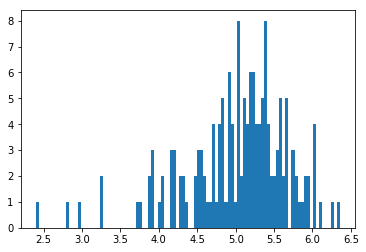

In [31]:
gcMass = GCs['mass[Msun]']
plt.hist(np.log10(gcMass), bins = 100)

In [32]:
M67 = OCs.loc[np.where(OCs['ID'] == 'NGC_2682')]
M10 = GCs.loc[np.where(GCs['ID'] == 'NGC 6254')]
def StarsAroundMe(rhm, Mcl, distance):
    """Function to estimate # of stars within one pixel of a randomly selected star (random d)"""
    
#     Random 2-D drawn position of binary on cluster projection
    x = getPosition(rhm)[0]
    y = getPosition(rhm)[1]
    d = getPosition(rhm)[2]

    a = rhm /1.305 #Plummer length scale
    Sigma = projMassDensity(Mcl,d,a)#Projected mass density from our function above
    
#     Number density of stars around that random distance - assumed average mass of 0.5Msun
    nDensity = Sigma / 0.5
    
#     Need to convert between pc and arcseconds - can use cluster distance (or assume a distance of 1)
    delta = np.tan(d/distance)#Angular size of cluster (radians)
    
    delta_rad = delta * u.radian
#     print(r_rad)
    delta_arcsec = delta_rad.to(u.arcsec)#converting to arcseconds
    
    nDensityArcsec = (nDensity * a**2) / (delta_arcsec.value**2)#Numerical density converted to # per square arcsec, value to remove quantity
    
    nDensityPx = nDensityArcsec * (0.7**2)#converting to pixels from arcsec (0.7 arcsec ~ 1 px)
    
    return nDensityPx

# Can use light_3 with ellc and multiply it by the stellar density per pixel to see how much flux is added to a pixel

def fluxAdded(nDensity, light3):
    
#    Light curve with random light_3 added
    flux = ellc.lc(t,radius_1=r1,radius_2=r2,sbratio=SB,\
    incl=i, light_3 = light3 * nDensity, q=massRatio, ld_1 = 'claret', ldc_1 = [.6496, -1.0768, 1.8769, -0.4829], 
           ld_2 = 'claret', ldc_2 = [.6496, -1.0768, 1.8769, -0.4829],
           shape_1 = 'sphere', shape_2 = 'sphere')
    
    return flux

print(StarsAroundMe(2.511255, 786.539046, 4400))
# for i in range(0,10):
#     print(M67['rhm[pc]'], M67['mass[Msun]'], M67['dist[pc]'])
#     xx = StarsAroundMe(M67['rhm[pc]'], M67['mass[Msun]'], M67['dist[pc]'])[0].values
# #     print(xx)

1.046980555419743


In [33]:
# Using cosmic todraw single (wide) binary as our random star
from cosmic.sample.initialbinarytable import InitialBinaryTable
from cosmic.evolve import Evolve

In [34]:
# Draw random luminosities from COSMIC, initialize very vide binaries  -- no mass transfer, take pimary star

BSEDict = {'xi': 0.5, 'bhflag': 1, 'neta': 0.5, 'windflag': 3, 'wdflag': 0, 'alpha1': 1.0, 'pts1': 0.001, 'pts3': 0.02, 'pts2': 0.01, 'epsnov': 0.001, 'hewind': 1.0, 'ck': -1000, 'bwind': 0.0, 'lambdaf': 1.0, 'mxns': 3.0, 'beta': -1.0, 'tflag': 1, 'acc2': 1.5, 'nsflag': 4, 'ceflag': 0, 'eddfac': 1.0, 'ifflag': 0, 'bconst': -3000, 'sigma': 265.0, 'gamma': -2.0, 'pisn': 45.0, 'natal_kick_array' : [-100.0,-100.0,-100.0,-100.0,-100.0,-100.0], 'bhsigmafrac' : 1.0, 'polar_kick_angle' : 90, 'qcrit_array' : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0], 'cekickflag' : 2, 'cehestarflag' : 0, 'cemergeflag' : 0, 'ecsn' : 2.5, 'ecsn_mlow' : 1.4, 'aic' : 1, 'ussn' : 0, 'sigmadiv' :-20.0, 'qcflag' : 2, 'eddlimflag' : 0, 'fprimc_array' : [2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0], 'bhspinflag' : 0, 'bhspinmag' : 0.0, 'rejuv_fac' : 1.0}

# Generating single binary
single_binary = InitialBinaryTable.InitialBinaries(m1=np.random.random(), m2=np.random.random(),\
            porb=np.random.random(), ecc=np.random.random(), tphysf=13700.0, \
                    kstar1=1, kstar2=1, metallicity=0.002)
# print(single_binary)

# Taking single random luminosity
luminosty1 = single_binary['lumin1']
luminosty2 = single_binary['lumin2']

print(luminosty1, luminosty2)



0    0.0
Name: lumin1, dtype: float64 0    0.0
Name: lumin2, dtype: float64


In [35]:
# Drawing 100 random binaries to see if we get different luminosities
for i in range(0,1):
    single_binary = InitialBinaryTable.InitialBinaries(m1=np.random.uniform(10,50), m2=np.random.uniform(10,50),\
            porb=np.random.uniform(5,1000), ecc=np.random.random(), tphysf=13700.0, \
                    kstar1=np.random.randint(0,1), kstar2=np.random.randint(0,1), metallicity=0.002)
    
#     Evolving binaries
    bpp, bcm, initC = Evolve.evolve(initialbinarytable=single_binary, BSEDict=BSEDict)
    print(bcm)
#     Taking single random luminosity - should be in solar units
    luminosity1 = bcm['lumin_1']#.values # primary luminosity
    luminosity2 = bcm['lumin_2'].values

#     print(luminosity1)


     tphys  kstar_1    mass0_1     mass_1       lumin_1     rad_1  \
0      1.0      1.0  47.056769  47.056769  3.370276e+05  8.381644   
0  13700.0     14.0  27.246362  24.521726  1.000000e-10  0.000104   

         teff_1    massc_1    radc_1        menv_1  ...  B_0_2  SNkick_1  \
0  48252.673596   0.000000  0.000000  1.000000e-10  ...    0.0       0.0   
0   1798.088931  24.521726  0.000104  1.000000e-10  ...    0.0       0.0   

   SNkick_2  Vsys_final  SNtheta_final  SN_1  SN_2  bin_state  merger_type  \
0       0.0         0.0            0.0   0.0   0.0          0         -001   
0       0.0         0.0            0.0   1.0   0.0          1         0201   

   bin_num  
0        0  
0        0  

[2 rows x 43 columns]


In [36]:
BSEDict = {'xi': 1.0, 'bhflag': 1, 'neta': 0.5, 'windflag': 3, 'wdflag': 1, 'alpha1': 1.0, 'pts1': 0.001, 'pts3': 0.02, 'pts2': 0.01, 'epsnov': 0.001, 'hewind': 0.5, 'ck': -1000, 'bwind': 0.0, 'lambdaf': 0.5, 'mxns': 2.5, 'beta': 0.125, 'tflag': 1, 'acc2': 1.5, 'nsflag': 3, 'ceflag': 0, 'eddfac': 1.0, 'ifflag': 0, 'bconst': -3000, 'sigma': 265.0, 'gamma': -1.0, 'pisn': 45.0, 'natal_kick_array' : [-100.0,-100.0,-100.0,-100.0,-100.0,-100.0], 'bhsigmafrac' : 1.0, 'polar_kick_angle' : 90, 'qcrit_array' : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0], 'cekickflag' : 2, 'cehestarflag' : 0, 'cemergeflag' : 0, 'ecsn' : 2.5, 'ecsn_mlow' : 1.4, 'aic' : 1, 'ussn' : 0, 'sigmadiv' :-20.0, 'qcflag' : 2, 'eddlimflag' : 0, 'fprimc_array' : [2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0], 'bhspinflag' : 0, 'bhspinmag' : 0.0, 'rejuv_fac' : 1.0, 'rejuvflag' : 0, 'htpmb' : 1, 'ST_cr' : 1, 'ST_tide' : 0, 'bdecayfac' : 1}

In [37]:
# Going to write this up as a class
class Crowding():
    """Class to run all of our crowding-related functions together,
        can create several of these objects to generate different random distances/luminosities at different points"""
    
    def __init__(self, rhm, Mcl, dist_cl, number):
        
        self.rhm = rhm
        self.Mcl = Mcl
        self.dist_cl = dist_cl
        self.number = 0
    
    def getPosition(self): # this may need arguments
        """Function to get x and y coordinates on 2-D projection of cluster (circular shape)
        From Kroupa paper
        """
#         Random generating functions (between 0 and 1)
        X1 = np.random.random()
        X2 = np.random.random()
        X3 = np.random.random()
        
#         Kroupa params
        self.zeta = 1/np.sqrt(X1**(-2/3) - 1) # Zeta parameter for 
        self.a = float(self.rhm) / 1.305 # Plummer length scale
        self.r = self.a * self.zeta
        self.z = (2 * X2 * self.r) - self.r
        self.theta = 2 * np.pi * X3

#         2D position variables
        x = np.sqrt(self.r**2 - self.z**2) * np.cos(self.theta)
        y = np.sqrt(self.r**2 - self.z**2) * np.sin(self.theta)
        d = np.sqrt(x**2 + y**2)
        
        return x, y, d

    def projMassDensity(self, Mcl, d, Rhm):
        """Function to get the projected mass density from Plummer model"""
        self.rhm = Rhm
        self.Mcl = Mcl
        
        a = float(Rhm) / 1.305 # Plummer length scale
        Sigma = (self.Mcl/(np.pi*(a**2))) / ((1 + (d**2)/(a**2))**2)
        return Sigma
    
    def StarsAroundMe(self):
        """Function to estimate # of stars within one pixel of a randomly selected star (random d)"""
    
        
#         Random 2-D drawn position of binary on cluster projection
        self.x = self.getPosition()[0]
        self.y = self.getPosition()[1]
        self.d = self.getPosition()[2]
        
        a = float(self.rhm) / 1.305 # Plummer length scale
        Sigma = self.projMassDensity(self.Mcl, self.d, self.rhm) # Projected mass density from our function above
        
#         Number density of stars around that random distance (#/pc^2) - assumed average mass of 0.5Msun in cluster
        self.nDensity = Sigma / 0.5

#         Converting between parsecs and arcsecs - half-mass radii of clusters are given in pc
        delta = np.tan( self.d / self.dist_cl )#Angular size of cluster (radians / pc)
        delta_arcsec = (delta * 180 * 3600) / (np.pi) # from [radians / pc] to [arcsec / pc]       
        self.nDensityArcsec = (self.nDensity * (self.d ** 2)) / (delta_arcsec **2) # Number density converted to # per square arcsec, value to remove quantity - may need to add a dimensional factor here
        self.nPx = self.nDensityArcsec * (0.7**2) # converting to pixels from arcsec (0.7 arcsec ~ 1 px)

        return self.nPx
    
    def fluxAdded(self, nPixel, number):
        '''Function to take luminosity from binary drawn above with pixel number density 
            and determine the luminosity added by background stars'''

        if nPixel > 1: # Disregard if number density is not significant

    #         Random position for background objects
            print('Number density per pixel Npx: ', nPixel)
        
        
    #         WIDE Binary (background/crowding stars)
            crowdingPos = []
            crowdingLum = 0.
            
            final_kstar1 = [0,14]
            final_kstar2 = [0,14]
            InitialBinaries, mass_singles, mass_binaries, n_singles, n_binaries = InitialBinaryTable.sampler('independent', final_kstar1, final_kstar2, binfrac_model=0.5, 
                                            primary_model='kroupa93', ecc_model='thermal', SFH_model='delta_burst', component_age=13700.0, met=0.02, size=int(nPixel))
            
            InitialBinaries['porb'] = 10e10
#             print(InitialBinaries)
            bpp, bcm, initC  = Evolve.evolve(initialbinarytable=InitialBinaries, BSEDict=BSEDict)
            crowdingLum = bcm['lumin_1'].sum()
            
#             Binary at random 2D pos d - 'Target binary'
            single_binary = InitialBinaryTable.InitialBinaries(m1=np.random.uniform(1,10), m2=np.random.uniform(1,10),\
                porb=np.random.uniform(0.,100), ecc=0., tphysf=13700.0, \
                    kstar1=0, kstar2=0, metallicity=0.002)

#             Evolving binary drawn above
            bpp, bcm, initC = Evolve.evolve(initialbinarytable=single_binary, BSEDict=BSEDict)
            massRatio = max(bcm['mass_1'].values[1] , bcm['mass_2'].values[1]) / min(bcm['mass_1'].values[1] , bcm['mass_2'].values[1]) # Mass ratio for ellc
        
#             Summing binary compenent luminosities - Target binary
            BinaryLum = bcm['lumin_1'].values[1] + bcm['lumin_2'].values[1]
            frac = crowdingLum / BinaryLum
        
#             Other parameters needed for ellc - want to make these more physical
            t = np.arange(-0.2,0.8, 0.001) # Time/phase array
#             SB = np.random.uniform(0.4,1.0) # Random surface brightness values, may want to make this more physical

#             Surface brightness ratio from cosmic
            SB = bcm['lumin_2'].values[0] / bcm['lumin_1'].values[0]
            print('foo foo ', SB)
#             Radii values - needs to be in units of semi-major axis for ellc
            semimajor = bcm['sep'].values[0] # semimajor axis of binary given by COSMIC
            r1 = bcm['rad_1'].values[1] / semimajor 
            r2 = bcm['rad_2'].values[1] / semimajor
            print('a,r1,r2: ', semimajor, r1, r2)
#             print(bcm.columns)
#             Fixing radii values - need to be between 0 and 1 for ellc
#             if r1 >= 1:
#                 r1 = 0.9
#             if r2 >= 1:
#                 r2 = 0.6
                
#             Radii from cosmic (in units of a) are being odd
            y = np.random.random()
            x = np.random.random()

            print('Crowding Lum, BinaryLum, LIGHT 3:', crowdingLum, BinaryLum, crowdingLum / BinaryLum)
            
#             Light curve of target binary with light3
            self.flux = ellc.lc(t, period = 1, radius_1=x, radius_2=y, sbratio = SB,
                incl=90., light_3 = frac,ld_1 = 'claret', ldc_1 = [.6496, -1.0768, 1.8769, -0.4829], 
                ld_2 = 'claret', ldc_2 = [.6496, -1.0768, 1.8769, -0.4829])
            
#             Light curve of same binary with no light3 value 
            binFlux = ellc.lc(t, period = 1, radius_1=x, radius_2=y, sbratio = SB,
                incl=90., light_3 = 0., ld_1 = 'claret', ldc_1 = [.6496, -1.0768, 1.8769, -0.4829], 
                ld_2 = 'claret', ldc_2 = [.6496, -1.0768, 1.8769, -0.4829])
    
#             Difference curve between crowded and uncrowded light curves
            self.diff = self.flux - binFlux
#             print('LC difference: ',self.diff)
            
#             Need to assign background star distance from target binary 
            Rb = self.getPosition()[2]
            print('Secondary 2D distance: ', Rb)
        
        
#             Only plot if binary and crowding flux are within normal range
            if self.flux[0] > 0:
        
#                 Plotting light curve of binary with crowding (if the target binary flux is normal)
                f,ax = plt.subplots()
                ax.plot(t,self.flux, linestyle = '-', label = 'with light3', c = '#5687A6')
                ax.plot(t, binFlux, linestyle = '--',label = 'without light3', c = '#5687A6') # can plot no light3 light curve if needed
                ax.plot(t,self.diff, linestyle = ':',label = 'difference', c = '#5687A6')
                ax.set_ylim(0,1.1)
                ax.set_xlabel('Binary Phase')
                ax.set_ylabel('Flux')
                ax.legend()
                
                self.plot = f.savefig(f'/Users/andrewbowen/ceb_project/plots/AAS_plots/lightCurves/light-curve-sample{number}.pdf', bbox_inches = 'tight')
                plt.show()
                
            print()    
            print("#######################################################")
            print()
            
#             Trying to find % difference at max diff between crowded and non-crowded light curves

            return binFlux
        
        else: # if the number density per pixel is under 1 (no need to add in light 3)
            return -9.99
            
            
    def RunAll(self):
        self.getPosition()
        npixel = self.StarsAroundMe()
        extraFlux = self.fluxAdded(npixel, 0)
#         self.plotLC(extraFlux, self.crowdingLC)
        
# Test instance
crwd = Crowding(2.511255, 786.539046, 4400, 1)
drawnBinaries = crwd.RunAll()

Number density per pixel Npx:  3.5155222145922234
foo foo  0.03410647430574501
a,r1,r2:  164.61166430370136 8.50486510735388e-08 5.2243039201515814e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.643223862798884 1.3499166710972027e-06 476491.5320855147
Secondary 2D distance:  0.5874777759535439

#######################################################

Number density per pixel Npx:  3.5155222145922234


/Users/andrewbowen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:99: RuntimeWarning: divide by zero encountered in double_scalars


foo foo  3427.1400015160907
a,r1,r2:  107.66889179541363 0.008611407649997316 1.300282724800587e-07
Crowding Lum, BinaryLum, LIGHT 3: 74.63101364793877 1.3247438612931828 56.3361837926056
Secondary 2D distance:  9.074847369918308


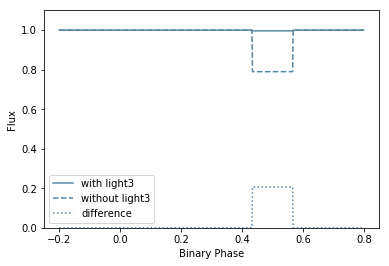


#######################################################

Number density per pixel Npx:  3.2159265131768655
foo foo  0.07935099663622804
a,r1,r2:  146.6058240563054 7.185285055159159e-05 0.006475917749723997
Crowding Lum, BinaryLum, LIGHT 3: 835.740825631809 0.8800810247640116 949.6180489244247
Secondary 2D distance:  1.065386290235685

#######################################################

Number density per pixel Npx:  3.2159265131768655
foo foo  3.5777309232339447
a,r1,r2:  68.27847273374721 2.0504266483219655e-07 5.20337614976387e-05
Crowding Lum, BinaryLum, LIGHT 3: 1.2928504964708107 0.08448271384420587 15.30313643634779
Secondary 2D distance:  1.8613062203773196

#######################################################

Number density per pixel Npx:  3.1633802116643093
foo foo  3.8885773682783062
a,r1,r2:  82.2018851499512 1.7031239581016242e-07 1.7031239581016242e-07
Crowding Lum, BinaryLum, LIGHT 3: 7.062410413610743 0.0001659502811143172 42557.387466826294
Secondary 2D dista

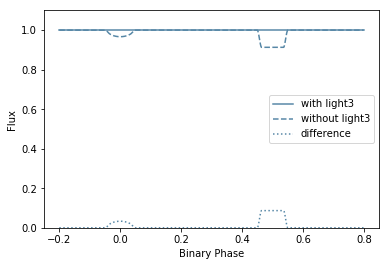


#######################################################

Number density per pixel Npx:  3.1633802116643093
foo foo  0.004968499509870568
a,r1,r2:  88.58831069788478 0.00012284731031456494 0.00017202034507886609
Crowding Lum, BinaryLum, LIGHT 3: 1.0170684083259307 8.214538285116058e-06 123813.2166440516
Secondary 2D distance:  2.851701460583359

#######################################################

Number density per pixel Npx:  1.593556633586826
foo foo  0.0563032427467515
a,r1,r2:  114.25848707616892 4.8198880325873235e-05 8.133693539656599e-05
Crowding Lum, BinaryLum, LIGHT 3: 1.089193067550837 2.972397715690587e-06 366435.84463857027
Secondary 2D distance:  4.383455423264609


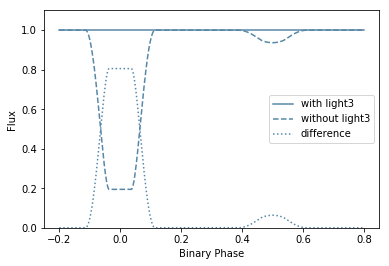


#######################################################

Number density per pixel Npx:  1.593556633586826
foo foo  1.4842881856025232
a,r1,r2:  193.75651108613928 7.225563632169218e-08 7.225563632169218e-08
Crowding Lum, BinaryLum, LIGHT 3: 0.038889839565173556 2.637545245774452e-10 147447099.2582138
Secondary 2D distance:  1.3588118319364366

#######################################################

Number density per pixel Npx:  1.3028087773867123
foo foo  0.09267913559824445
a,r1,r2:  125.82064190998156 2.689906074532611e-05 6.927507424163582e-05
Crowding Lum, BinaryLum, LIGHT 3: 3.022174305258063 0.009616715922494263 314.2626162210903
Secondary 2D distance:  4.654709504245113

#######################################################

Number density per pixel Npx:  1.3028087773867123
foo foo  4.581867306147984
a,r1,r2:  159.9818898426448 0.015912869977444632 6.9858689201303e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.9572712631769064 100.69909479587767 0.009506254898490848
Secondary 2D d

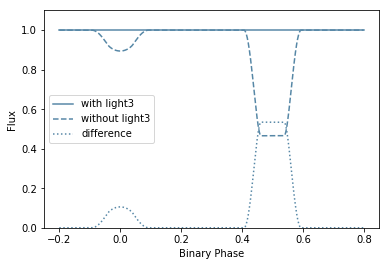


#######################################################

Number density per pixel Npx:  6.588868984887889
foo foo  3.782027511375739
a,r1,r2:  102.81327003543589 7.582936361170658e-05 5.433391321082491e-05
Crowding Lum, BinaryLum, LIGHT 3: 5.197115380148687 3.1048937000670843e-06 1673846.4766237885
Secondary 2D distance:  0.7516961004325494

#######################################################

Number density per pixel Npx:  6.588868984887889
foo foo  0.633539675147805
a,r1,r2:  49.13296184785637 2.8494109602738734e-07 2.8494109602738734e-07
Crowding Lum, BinaryLum, LIGHT 3: 0.524423303191438 0.0015164940490368778 345.812964795014
Secondary 2D distance:  2.0647895928183013

#######################################################

Number density per pixel Npx:  5.079986925855112
foo foo  0.2788843795607848
a,r1,r2:  138.51475817397557 1.01072262512388e-07 1.01072262512388e-07
Crowding Lum, BinaryLum, LIGHT 3: 8.219430309457737 2.3936741346381614e-10 34338133961.16353
Secondary 2D di

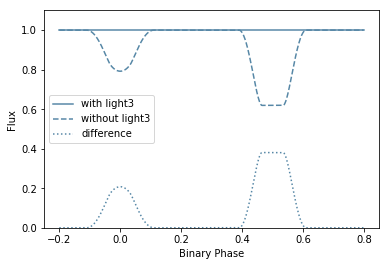


#######################################################

Number density per pixel Npx:  2.062306838995929
foo foo  340.8385189138761
a,r1,r2:  72.5637964965749 0.014881899074951823 1.9293367596416785e-07
Crowding Lum, BinaryLum, LIGHT 3: 1.363895440833628 3.2860911812718623 0.41505100302960557
Secondary 2D distance:  0.469018788574058


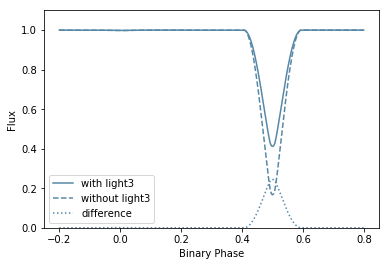


#######################################################

Number density per pixel Npx:  2.6314384451783486
foo foo  6.692440380315499
a,r1,r2:  79.92036237202865 0.00012358887708759718 0.000123435014565849
Crowding Lum, BinaryLum, LIGHT 3: 0.39409595073020437 2.5137096849868986e-06 156778.62606168794
Secondary 2D distance:  11.02805021644663

#######################################################

Number density per pixel Npx:  2.6314384451783486
foo foo  0.002374323006059714
a,r1,r2:  46.066647755508534 3.039075053670671e-07 0.024179420913652782
Crowding Lum, BinaryLum, LIGHT 3: 0.36380435676565737 9.606038050923926 0.03787246675862022
Secondary 2D distance:  0.36163783989341103

#######################################################

Number density per pixel Npx:  4.096165186295684
foo foo  186.73868129151373
a,r1,r2:  82.41932044329388 0.014443390646763012 1.6986308458624427e-07
Crowding Lum, BinaryLum, LIGHT 3: 2.2629763837617842 20.625011462951292 0.10972000611135507
Secondary 

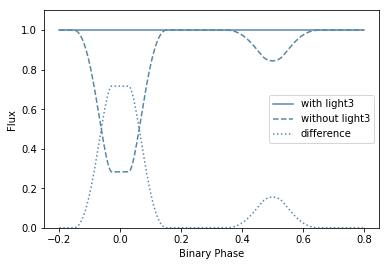


#######################################################

Number density per pixel Npx:  3.697782747926817
foo foo  3.3925820009758367
a,r1,r2:  7.322905763868163 0.0007347690759267185 0.0025556105485008297
Crowding Lum, BinaryLum, LIGHT 3: 1.2860573618987545 0.0021541408728429725 597.016368851241
Secondary 2D distance:  4.2979207246007745

#######################################################

Number density per pixel Npx:  4.474755604979566
foo foo  0.1419390033204219
a,r1,r2:  215.75831094473676 6.488741934759532e-08 6.488741934759532e-08
Crowding Lum, BinaryLum, LIGHT 3: 0.4622808687476454 2.5085754309846426e-10 1842802345.2585409
Secondary 2D distance:  2.1258452471926432


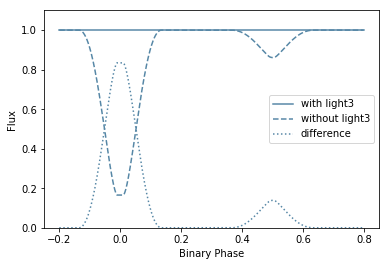


#######################################################

Number density per pixel Npx:  4.474755604979566
foo foo  6.733443042281139
a,r1,r2:  155.43843008007428 5.6635339834947776e-05 5.4997477129940716e-05
Crowding Lum, BinaryLum, LIGHT 3: 12.819334660254935 2.724359959294963e-06 4705448.197664911
Secondary 2D distance:  2.1799965918746396

#######################################################

Number density per pixel Npx:  6.495233651106859
foo foo  0.5709618466062054
a,r1,r2:  47.332161550336174 5.0799914843951434e-05 2.95781970259513e-07
Crowding Lum, BinaryLum, LIGHT 3: 0.283559803085661 0.200455699692899 1.4145759063976662
Secondary 2D distance:  1.27832952976193


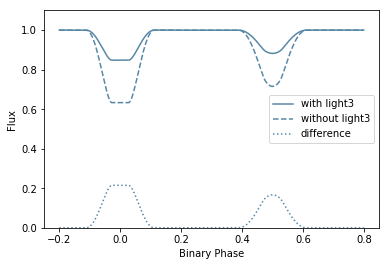


#######################################################

Number density per pixel Npx:  6.495233651106859
foo foo  61.31151308157494
a,r1,r2:  52.48037972262531 0.00019417334238097344 0.00012924810281058572
Crowding Lum, BinaryLum, LIGHT 3: 56.52482460666891 0.0016872282693934926 33501.586970794335
Secondary 2D distance:  4.6658430009681515

#######################################################

Number density per pixel Npx:  1.7773845610476426
foo foo  48.09911522349492
a,r1,r2:  116.68951014746327 8.57788757200445e-05 1.1997650844799907e-07
Crowding Lum, BinaryLum, LIGHT 3: 0.10976551305582789 1.2407135575057435e-06 88469.66521144005
Secondary 2D distance:  10.250050960409514

#######################################################

Number density per pixel Npx:  1.7773845610476426
foo foo  0.01007468940658249
a,r1,r2:  179.0558218168615 7.818790731261011e-08 5.539812512360962e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.12297635040051999 1.3539338022267821e-06 90828.92398303651
Second

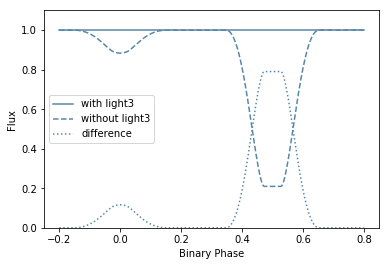


#######################################################

Number density per pixel Npx:  1.3992724519052397
foo foo  1.7318942999271325
a,r1,r2:  36.85269690163212 3.7989078621217465e-07 0.00016873777828473174
Crowding Lum, BinaryLum, LIGHT 3: 0.058959121456207506 0.21543521076710043 0.2736744900996995
Secondary 2D distance:  0.542129043423095

#######################################################

Number density per pixel Npx:  2.7093924545513213
foo foo  0.016244107333374693
a,r1,r2:  170.44318976303353 3.686694302999128e-05 6.095965566980724e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.07942432611074421 2.918949064271116e-06 27209.904784884307
Secondary 2D distance:  3.7854019696119887


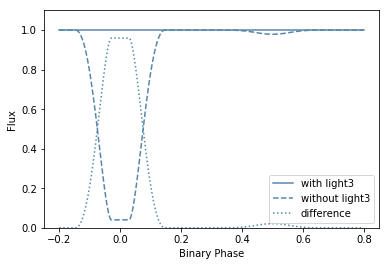


#######################################################

Number density per pixel Npx:  2.7093924545513213
foo foo  5.803751353490095
a,r1,r2:  25.9442121733783 0.0006014110170419158 0.0006359745476498874
Crowding Lum, BinaryLum, LIGHT 3: 6.422390533429931 0.0001794079524875881 35797.691486804346
Secondary 2D distance:  0.9743791335240878

#######################################################

Number density per pixel Npx:  1.64275327724573
foo foo  2.966504785835165
a,r1,r2:  80.18457502148682 0.00011435891550377279 0.00010072802627630248
Crowding Lum, BinaryLum, LIGHT 3: 8.047512859121191 2.6842638126021594e-06 2998033.509724154
Secondary 2D distance:  1.813431165501161

#######################################################

Number density per pixel Npx:  1.64275327724573
foo foo  0.5818025645477919
a,r1,r2:  77.30829721586892 0.00011876173477378435 0.0001279127340237383
Crowding Lum, BinaryLum, LIGHT 3: 0.174590402039721 0.24866915259637817 0.7020991555116752
Secondary 2D dista

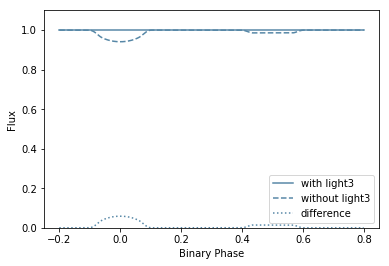


#######################################################

Number density per pixel Npx:  1.434675340033513
foo foo  0.5371981602979304
a,r1,r2:  206.5799597096218 6.777036852790095e-08 0.0003560792456465071
Crowding Lum, BinaryLum, LIGHT 3: 0.3942216594378656 3.045212460571602e-08 12945620.85707045
Secondary 2D distance:  1.2959360254354833

#######################################################

Number density per pixel Npx:  1.12472485458887
foo foo  0.5029979006217662
a,r1,r2:  208.57267783733715 6.71228856299117e-08 6.71228856299117e-08
Crowding Lum, BinaryLum, LIGHT 3: 1.1079648968549871 0.0008516782644692994 1300.919540955276
Secondary 2D distance:  1.7642269360187994

#######################################################

Number density per pixel Npx:  1.12472485458887
foo foo  0.19513891602995573
a,r1,r2:  196.6335653539252 7.119842421003293e-08 7.119842421003293e-08
Crowding Lum, BinaryLum, LIGHT 3: 0.0238298195248762 2.514271915598435e-10 94778211.44577491
Secondary 2D dis

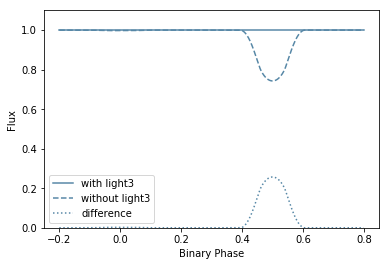


#######################################################

Number density per pixel Npx:  5.391790102956447
foo foo  0.6440984302194505
a,r1,r2:  47.814184225586196 0.00025421444837975173 0.033751672510704704
Crowding Lum, BinaryLum, LIGHT 3: 0.24468395340763974 18.9254684903263 0.012928818831233122
Secondary 2D distance:  1.3502781650384348

#######################################################

Number density per pixel Npx:  5.391790102956447
foo foo  0.23305025002419022
a,r1,r2:  142.09064050945057 5.097135583923515e-05 6.247512885866342e-05
Crowding Lum, BinaryLum, LIGHT 3: 724.9508566623841 0.010901190905497942 66501.98707159233
Secondary 2D distance:  4.641040040981276

#######################################################

Number density per pixel Npx:  6.3691133311639385
foo foo  6.375949423870574
a,r1,r2:  190.03485503761792 4.075307749992044e-05 7.367069581645252e-08
Crowding Lum, BinaryLum, LIGHT 3: 6.175699718285259 1.42860251136659e-06 4322895.74542161
Secondary 2D dist

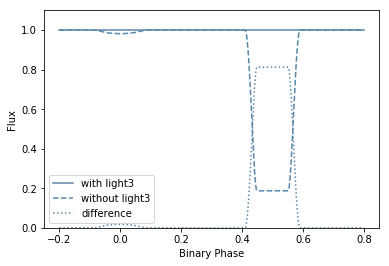


#######################################################

Number density per pixel Npx:  5.116493027758613
foo foo  0.8974133011080565
a,r1,r2:  37.20171055564071 0.21770629354124568 3.763267815080952e-07
Crowding Lum, BinaryLum, LIGHT 3: 159.15946144197787 10002.502008893376 0.015911964956414584
Secondary 2D distance:  1.619913360387362


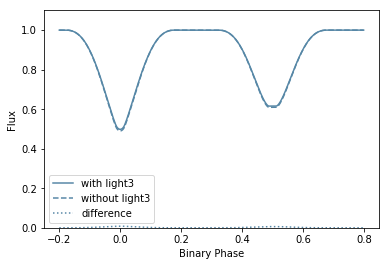


#######################################################

Number density per pixel Npx:  2.7683513853601425
foo foo  0.28673765092164377
a,r1,r2:  173.77911032647518 1.714079147467774e-05 2.8691153158350362e-05
Crowding Lum, BinaryLum, LIGHT 3: 1.406010245352427 3.558490274192422e-06 395114.25829919195
Secondary 2D distance:  3.255944549182122


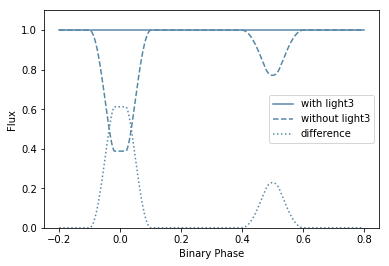


#######################################################

Number density per pixel Npx:  2.7683513853601425
foo foo  0.5108200143376266
a,r1,r2:  56.72419537686788 2.4680826068992063e-07 2.4680826068992063e-07
Crowding Lum, BinaryLum, LIGHT 3: 1.4606913274306437 0.0008042246963058086 1816.2726587983466
Secondary 2D distance:  2.008032174650448


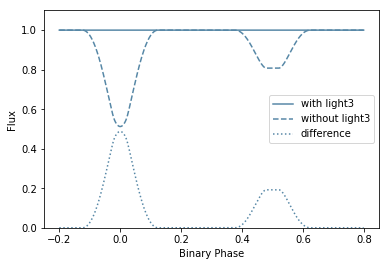


#######################################################

Number density per pixel Npx:  3.4123772077673755
foo foo  0.013664010249244941
a,r1,r2:  140.19936419498148 9.985779950135564e-08 6.434596059836459e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.04219290452932494 1.3821840083418973e-06 30526.25719490172
Secondary 2D distance:  0.1998587346400273

#######################################################

Number density per pixel Npx:  3.4123772077673755
foo foo  0.24037986050947296
a,r1,r2:  41.58607680021228 0.00012640603691473195 3.3665113608236626e-07
Crowding Lum, BinaryLum, LIGHT 3: 2.4886441895115192 0.06529856367588854 38.11177535028155
Secondary 2D distance:  1.8995272590341743

#######################################################

Number density per pixel Npx:  5.477809245973098
foo foo  0.2537220807659641
a,r1,r2:  190.6583836910719 7.342976337554879e-08 7.4047869841271295e-06
Crowding Lum, BinaryLum, LIGHT 3: 30.693307150062495 1.8879216195365875e-06 16257723.21924918
Seco

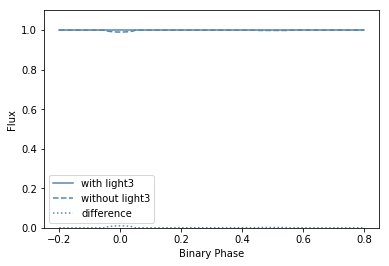


#######################################################

Number density per pixel Npx:  5.477809245973098
foo foo  2.773210356160097
a,r1,r2:  145.34953543787344 2.7483128426604533e-05 3.0909336975163924e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.39551726629793554 3.534699346739926e-06 111895.58927061886
Secondary 2D distance:  4.630893855498671

#######################################################

Number density per pixel Npx:  5.534944937155997
foo foo  0.03083794370515357
a,r1,r2:  45.64508790366151 0.00022809467689100508 0.0003092600897270027
Crowding Lum, BinaryLum, LIGHT 3: 500.3637567570286 3.791564095629605e-05 13196763.766535802
Secondary 2D distance:  0.9115295658251742

#######################################################

Number density per pixel Npx:  5.534944937155997
foo foo  0.0020374658156855343
a,r1,r2:  131.8100896305239 1.0621341688821638e-07 0.008289520942967261
Crowding Lum, BinaryLum, LIGHT 3: 0.11030773554276603 3.959700488633194 0.027857595759936366
Second

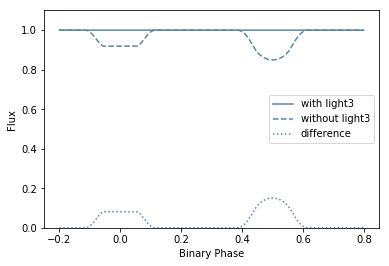


#######################################################

Number density per pixel Npx:  6.683647808593724
foo foo  99.2350892486692
a,r1,r2:  182.68763997237625 5.4819526881825466e-05 7.663353690549019e-08
Crowding Lum, BinaryLum, LIGHT 3: 8539.216384138195 1.2831772447919255e-06 6654744244.255109
Secondary 2D distance:  1.8450730974069096

#######################################################

Number density per pixel Npx:  6.683647808593724
foo foo  0.04841811519060427
a,r1,r2:  167.01690051052066 8.38238523000139e-08 2.1556386034791927e-05
Crowding Lum, BinaryLum, LIGHT 3: 1.020144775976633 1.8026669093285307e-06 565908.6383055776
Secondary 2D distance:  1.6601593302385202

#######################################################

Number density per pixel Npx:  1.5787722740746288
foo foo  0.06218136614261051
a,r1,r2:  141.047433541536 4.001662982706362e-05 6.730156302161042e-05
Crowding Lum, BinaryLum, LIGHT 3: 36.9899023166117 0.004875902301269962 7586.268147123749
Secondary 2D d

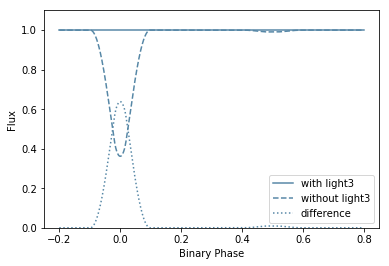


#######################################################

Number density per pixel Npx:  2.6634514129688767
foo foo  1.0575476428604533
a,r1,r2:  130.75189731360766 1.0707301605284612e-07 1.0707301605284612e-07
Crowding Lum, BinaryLum, LIGHT 3: 18.65999101000905 0.016400078241633358 1137.798901631985
Secondary 2D distance:  3.5223428742404486

#######################################################

Number density per pixel Npx:  2.6634514129688767
foo foo  42.287418772849605
a,r1,r2:  168.8689101509739 5.6533239112241904e-05 8.2904544048301e-08
Crowding Lum, BinaryLum, LIGHT 3: 989.7610533846877 1.2655627278392782e-06 782071904.9418653
Secondary 2D distance:  4.0214510795201885

#######################################################

Number density per pixel Npx:  1.8866517214644305
foo foo  7.942499603214825
a,r1,r2:  21.88850780883286 0.00016060142866200313 0.0004562268839800193
Crowding Lum, BinaryLum, LIGHT 3: 0.050295983583477 0.013089744208072808 3.842396213705847
Secondary 2D 

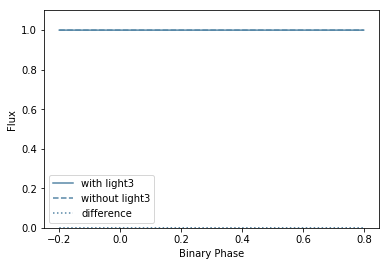


#######################################################

Number density per pixel Npx:  1.8866517214644305
foo foo  0.3589396641597928
a,r1,r2:  80.06974721882955 0.00010664824747407671 0.00011676782373929695
Crowding Lum, BinaryLum, LIGHT 3: 0.08126301076103642 2.6147613462264883e-06 31078.55746694119
Secondary 2D distance:  0.9698780671949644


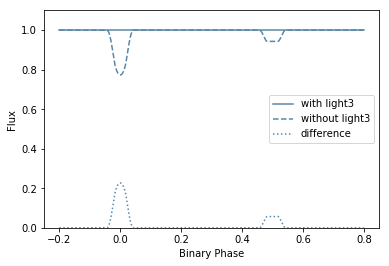


#######################################################

Number density per pixel Npx:  2.7603530943499135
foo foo  8.767364506952692
a,r1,r2:  84.62423818407483 1.6543723524632706e-07 1.6543723524632706e-07
Crowding Lum, BinaryLum, LIGHT 3: 0.02331491408282259 2.390957855792296e-10 97512860.90777493
Secondary 2D distance:  1.7786595248167647

#######################################################

Number density per pixel Npx:  2.7603530943499135
foo foo  0.874764934196545
a,r1,r2:  63.06984564101101 2.219761259554524e-07 2.219761259554524e-07
Crowding Lum, BinaryLum, LIGHT 3: 0.1577879613595761 0.005068687668587988 31.12994362178405
Secondary 2D distance:  1.0710015401191326

#######################################################

Number density per pixel Npx:  5.020297888733763
foo foo  46.48473950710421
a,r1,r2:  10.656029489004581 1.3138101780260548e-06 0.47676193591359545
Crowding Lum, BinaryLum, LIGHT 3: 1.1696842543631185 1582.5662122849371 0.0007391060451583303
Secondary 2D

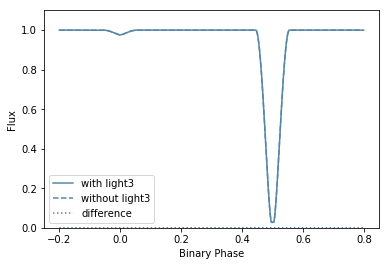


#######################################################

Number density per pixel Npx:  5.020297888733763
foo foo  1.0003338923282017
a,r1,r2:  199.36545229107446 0.3807491504127594 7.022279857976565e-08
Crowding Lum, BinaryLum, LIGHT 3: 0.18219546550007232 6392.7005522972195 2.850054746183916e-05
Secondary 2D distance:  0.7628346443142447

#######################################################

Number density per pixel Npx:  2.1761038920699884
foo foo  1.8764503345846304
a,r1,r2:  161.0094220821697 0.0073606702114952915 8.69514331456654e-08
Crowding Lum, BinaryLum, LIGHT 3: 0.047176782407009704 1.616642526531253 0.029181950637061683
Secondary 2D distance:  1.7995302746271749

#######################################################

Number density per pixel Npx:  2.1761038920699884
foo foo  3.446674343464858
a,r1,r2:  145.14623308852015 9.645444943419122e-08 9.645444943419122e-08
Crowding Lum, BinaryLum, LIGHT 3: 7.079502104175159 2.5798846645637073e-10 27441157356.43708
Secondary 2D

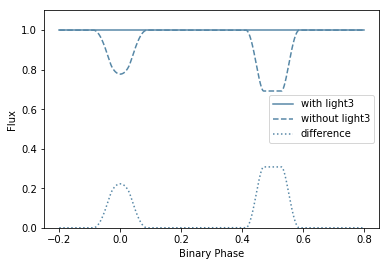


#######################################################

Number density per pixel Npx:  4.063646497382698
foo foo  5.804629096116227
a,r1,r2:  44.34480270635207 0.00025501460116411433 0.00025318244542478757
Crowding Lum, BinaryLum, LIGHT 3: 0.5142627578529853 0.00018160999322726031 2831.687555923506
Secondary 2D distance:  0.1231018079794705

#######################################################

Number density per pixel Npx:  2.767060966279607
foo foo  6.91813360264587
a,r1,r2:  196.17583240003606 3.11149099703258e-05 7.13645499994699e-08
Crowding Lum, BinaryLum, LIGHT 3: 0.6541075556608548 1.5441625985445753e-06 423600.18062694493
Secondary 2D distance:  6.640309661745382

#######################################################

Number density per pixel Npx:  2.767060966279607
foo foo  1470.7518716467898
a,r1,r2:  47.00866746751652 0.021104745491381312 2.9781741866378463e-07
Crowding Lum, BinaryLum, LIGHT 3: 31.681811103793112 1.8445580262785108 17.175827841920903
Secondary 2D dis

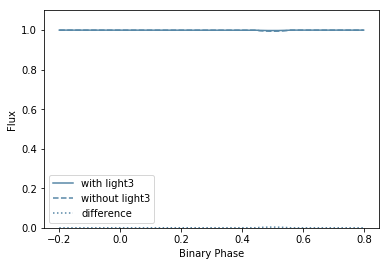


#######################################################

Number density per pixel Npx:  3.30571423609393
foo foo  0.6956299808315793
a,r1,r2:  167.7875813391685 8.343883312615477e-08 0.00044839137265468063
Crowding Lum, BinaryLum, LIGHT 3: 6.611071375315146 3.092473861304116 2.1377937767038118
Secondary 2D distance:  1.7990591247451087

#######################################################

Number density per pixel Npx:  1.4284665570631867
foo foo  1.0351169271481848
a,r1,r2:  51.345498804893744 2.726626544850249e-07 2.726626544850249e-07
Crowding Lum, BinaryLum, LIGHT 3: 1541.133009961375 0.00941787376540126 163639.16615904155
Secondary 2D distance:  2.049052328204949

#######################################################

Number density per pixel Npx:  1.4284665570631867
foo foo  105.76686434716906
a,r1,r2:  93.35193714111088 0.00011333684887520811 6.855818368034111e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.061973952426695754 2.8900535758620486e-06 21443.87666177091
Secondary 2D d

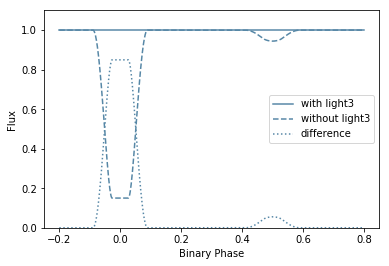


#######################################################

Number density per pixel Npx:  1.2672048582232014
foo foo  21.787488972557288
a,r1,r2:  179.38129233117735 4.8484359194639254e-05 7.804604269520435e-08
Crowding Lum, BinaryLum, LIGHT 3: 0.023080926616227983 1.3491900337181278e-06 17107.246599369737
Secondary 2D distance:  13.078690656603731

#######################################################

Number density per pixel Npx:  2.8629220325067277
foo foo  0.07104480520447964
a,r1,r2:  87.2443432828111 1.6046885646921113e-07 0.0001077881422202607
Crowding Lum, BinaryLum, LIGHT 3: 0.10858049217746829 1.2286161281209995e-06 88376.25495241326
Secondary 2D distance:  3.271481381844974


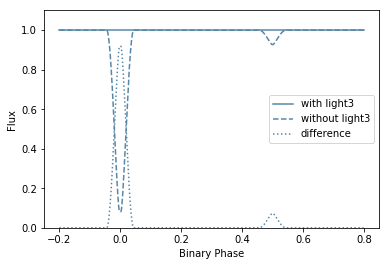


#######################################################

Number density per pixel Npx:  2.8629220325067277
foo foo  0.1677318362765362
a,r1,r2:  166.17344301808234 4.4261331202581e-05 3.7385590012380026e-05
Crowding Lum, BinaryLum, LIGHT 3: 2.1769243353711776 3.080592467468363e-06 706657.6830138711
Secondary 2D distance:  14.562051168063444


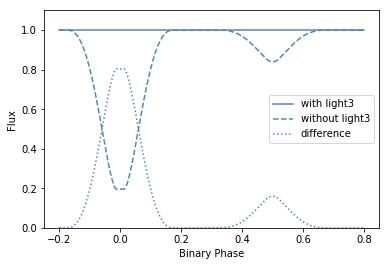


#######################################################

Number density per pixel Npx:  3.3067839977303923
foo foo  0.7868827272548989
a,r1,r2:  224.1619117937536 5.226941464658409e-08 6.245485634901744e-08
Crowding Lum, BinaryLum, LIGHT 3: 2.327118847874613 9.8041287580075e-07 2373611.0625576437
Secondary 2D distance:  6.661421588669915


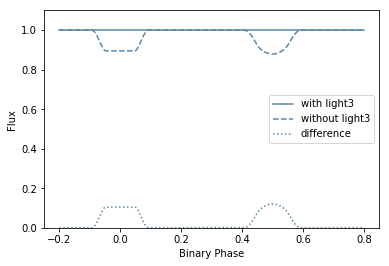


#######################################################

Number density per pixel Npx:  3.3067839977303923
foo foo  1.6964832744660736
a,r1,r2:  182.8371113509209 7.657088813402698e-08 7.657088813402698e-08
Crowding Lum, BinaryLum, LIGHT 3: 0.6256892483429074 2.728709426059238e-10 2292985989.5214953
Secondary 2D distance:  3.537485920197666

#######################################################

Number density per pixel Npx:  1.8781115134226625
foo foo  0.03243868033979325
a,r1,r2:  129.5202584811395 5.48241157639553e-05 7.981651558788823e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.09772104185731907 0.0017364640787680306 56.275878696350134
Secondary 2D distance:  1.1765215534506146

#######################################################

Number density per pixel Npx:  1.8781115134226625
foo foo  0.18198494943830673
a,r1,r2:  156.1606011880909 5.52233060108383e-05 5.5774768985106445e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.14498921636440912 2.7402697624817297e-06 52910.56316772966
Second

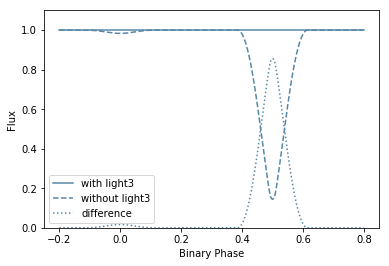


#######################################################

Number density per pixel Npx:  2.271921069560944
foo foo  0.43150302191805257
a,r1,r2:  144.68499662004018 5.4114044099711103e-05 6.258681916331938e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.05695667802172463 2.7436388536629563e-06 20759.53908645205
Secondary 2D distance:  1.003425529341358

#######################################################

Number density per pixel Npx:  2.206862416246398
foo foo  0.27223889788985345
a,r1,r2:  113.78943301196094 5.790363573462764e-05 7.713638235087226e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.19654916574952885 2.8906327800680555e-06 67995.20406217127
Secondary 2D distance:  0.915627770330478

#######################################################

Number density per pixel Npx:  2.206862416246398
foo foo  7.3286876919862936
a,r1,r2:  190.53269284721213 3.326253905902577e-05 7.347820361320656e-08
Crowding Lum, BinaryLum, LIGHT 3: 0.058028309629455876 0.0006307807367313237 91.99442254713716
Seco

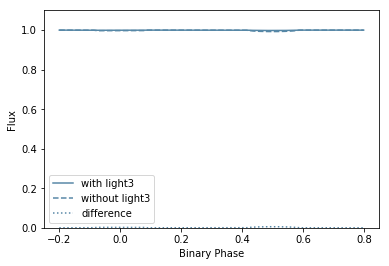


#######################################################

Number density per pixel Npx:  2.2991941569548318
foo foo  0.03030877604445189
a,r1,r2:  171.98672537168184 8.14016312581363e-08 6.255333476313758e-05
Crowding Lum, BinaryLum, LIGHT 3: 2.383855299290045 1.1126809762618242e-06 2142442.757760515
Secondary 2D distance:  0.678918746199198

#######################################################

Number density per pixel Npx:  3.2856754164933593
foo foo  0.6946621197869837
a,r1,r2:  158.91302104295042 8.80985076497673e-08 0.00663225440792594
Crowding Lum, BinaryLum, LIGHT 3: 6542.6475114741315 1.1673333615935046 5604.780713662537
Secondary 2D distance:  1.28904070738154

#######################################################

Number density per pixel Npx:  3.2856754164933593
foo foo  0.29639152688746867
a,r1,r2:  132.0721091818639 0.23565810378200597 5.899688995918785e-05
Crowding Lum, BinaryLum, LIGHT 3: 1.497966388789838 10306.33387652898 0.0001453442520624347
Secondary 2D distanc

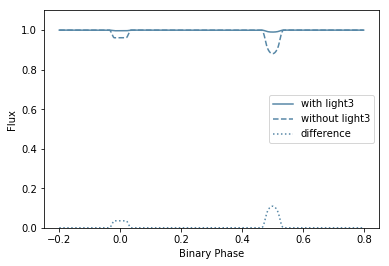


#######################################################

Number density per pixel Npx:  2.554609335918331
foo foo  0.364299434964872
a,r1,r2:  30.257832887332302 0.00048509847214445726 0.0003989970568020017
Crowding Lum, BinaryLum, LIGHT 3: 0.09139406372286696 0.0027722653117172253 32.967286116729824
Secondary 2D distance:  4.623354085691699

#######################################################

Number density per pixel Npx:  2.554609335918331
foo foo  0.3141791028058185
a,r1,r2:  69.02460082862179 5.947830118518799e-05 2.0282623632637874e-07
Crowding Lum, BinaryLum, LIGHT 3: 1.540401266542658 0.09805001917773548 15.71036170579803
Secondary 2D distance:  5.893479868123287

#######################################################

Number density per pixel Npx:  5.177128485652465
foo foo  1.0789896009648277
a,r1,r2:  82.56707124785399 1.6955912070532447e-07 1.3377160990933719
Crowding Lum, BinaryLum, LIGHT 3: 757.207390809144 15373.560533298274 0.04925387252803767
Secondary 2D distanc

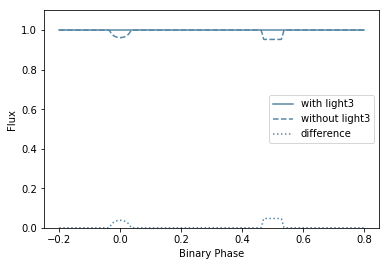


#######################################################

Number density per pixel Npx:  3.324848611061393
foo foo  14.020764908418602
a,r1,r2:  152.4502542334457 9.183323485024778e-08 9.183323485024778e-08
Crowding Lum, BinaryLum, LIGHT 3: 5.355123354485501 2.615528554395073e-10 20474344833.61643
Secondary 2D distance:  4.119054502974729

#######################################################

Number density per pixel Npx:  3.10423162826098
foo foo  34.14257074756978
a,r1,r2:  202.3708533206438 3.111191828905512e-05 6.917992275210644e-08
Crowding Lum, BinaryLum, LIGHT 3: 0.04763325658215597 1.5778682847855412e-06 30188.360487028945
Secondary 2D distance:  0.544568132238113

#######################################################

Number density per pixel Npx:  3.10423162826098
foo foo  0.203427071336627
a,r1,r2:  216.3293146308597 6.471614826631027e-08 1.153840807955924e-05
Crowding Lum, BinaryLum, LIGHT 3: 2.3864618604739483 1.836981764603147e-06 1299121.1488642667
Secondary 2D dist

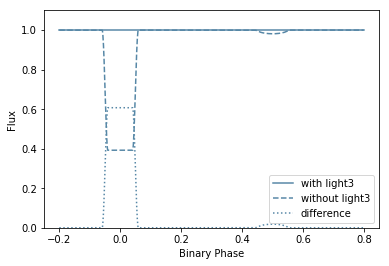


#######################################################

Number density per pixel Npx:  3.90004055167258
foo foo  0.026488679100401268
a,r1,r2:  182.3672141768412 7.676818480335079e-08 5.147246441411283e-05
Crowding Lum, BinaryLum, LIGHT 3: 73.79660012731202 1.2721346995410843e-06 58010052.04396495
Secondary 2D distance:  20.24678760655805

#######################################################

Number density per pixel Npx:  3.90004055167258
foo foo  0.15282895290039653
a,r1,r2:  122.4820701654619 1.1430244427684231e-07 5.320796023439885e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.07327995241914986 0.0012546027740104012 58.40888760743513
Secondary 2D distance:  1.2217006085549214

#######################################################

Number density per pixel Npx:  1.8382680019225073
foo foo  18.558743133569106
a,r1,r2:  113.80624953329624 7.96940600940857e-05 4.58998730471866e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.24357077760140725 3.0170754303293187e-06 80730.75507257739
Secondary 

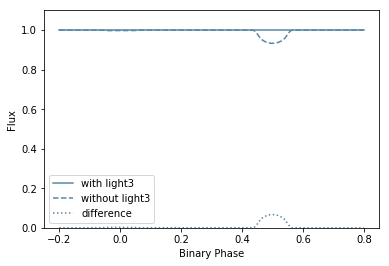


#######################################################

Number density per pixel Npx:  1.8382680019225073
foo foo  0.04961888754001268
a,r1,r2:  60.154001116755985 7.077079000682359e-05 0.00016622441039615036
Crowding Lum, BinaryLum, LIGHT 3: 1.212726181772884 6.065445093388269e-05 19994.017967367883
Secondary 2D distance:  3.438423363253627

#######################################################

Number density per pixel Npx:  3.8150933618783305
foo foo  812.5843296443411
a,r1,r2:  54.47148931553289 0.020179688212591664 2.570151867686829e-07
Crowding Lum, BinaryLum, LIGHT 3: 28.696889806028476 5.042131635245941 5.691420193282742
Secondary 2D distance:  1.4805931083352755

#######################################################

Number density per pixel Npx:  3.8150933618783305
foo foo  2.4255936751375295
a,r1,r2:  42.713545738835286 0.0002141054035715232 0.00021933869115466366
Crowding Lum, BinaryLum, LIGHT 3: 0.0835864682725708 0.27035768138522326 0.3091699405184325
Secondary 2D d

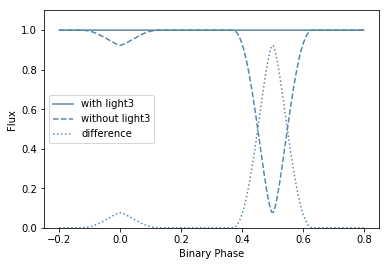


#######################################################

Number density per pixel Npx:  1.8514331233434855
foo foo  2.1502928264229966
a,r1,r2:  211.74024553809252 6.611874830135385e-08 6.611874830135385e-08
Crowding Lum, BinaryLum, LIGHT 3: 0.7555186003191339 0.000694518524647036 1087.830739580487
Secondary 2D distance:  1.4608448393437645


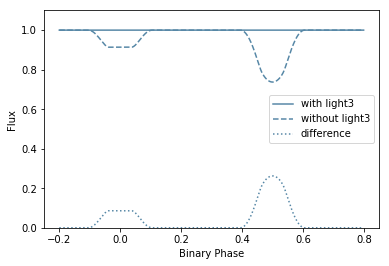


#######################################################

Number density per pixel Npx:  6.159984445607339
foo foo  2.6485493594725877
a,r1,r2:  84.32705883222005 1.6602025724453252e-07 1.6602025724453252e-07
Crowding Lum, BinaryLum, LIGHT 3: 30.47477946376935 0.00045154687970095405 67489.73547099225
Secondary 2D distance:  0.8713437450621343

#######################################################

Number density per pixel Npx:  6.159984445607339
foo foo  0.47222180557740107
a,r1,r2:  142.2166320414216 9.84413693324027e-08 9.84413693324027e-08
Crowding Lum, BinaryLum, LIGHT 3: 3.309021392109115 2.4366105969151605e-10 13580427649.36859
Secondary 2D distance:  1.744277370079208

#######################################################

Number density per pixel Npx:  2.863766655311938
foo foo  0.0601114452488053
a,r1,r2:  148.09140035816793 3.426290161628115e-05 6.402206632709902e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.02489857851425707 3.0140492671301288e-06 8260.839922488929
Secondary 2

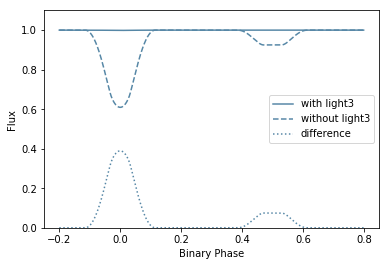


#######################################################

Number density per pixel Npx:  5.910085949215846
foo foo  5.828691926142533
a,r1,r2:  105.3691238003691 9.192350595098955e-05 8.97143876531619e-05
Crowding Lum, BinaryLum, LIGHT 3: 2.0160383155996815 2.5750913536689167e-06 782899.7261504092
Secondary 2D distance:  1.1707889488834173

#######################################################

Number density per pixel Npx:  5.910085949215846
foo foo  0.24667468331919223
a,r1,r2:  34.25535763289983 4.08695193027382e-07 4.08695193027382e-07
Crowding Lum, BinaryLum, LIGHT 3: 0.9388080616175287 0.00022583459174120807 4157.060503349914
Secondary 2D distance:  1.0972014788652331

#######################################################

Number density per pixel Npx:  1.2411237254576295
foo foo  0.6810982304774705
a,r1,r2:  134.2077178679813 0.0019443269031925075 1.0431590837250993e-07
Crowding Lum, BinaryLum, LIGHT 3: 71.57530155271877 1288.456360868127 0.05555120353823491
Secondary 2D dis

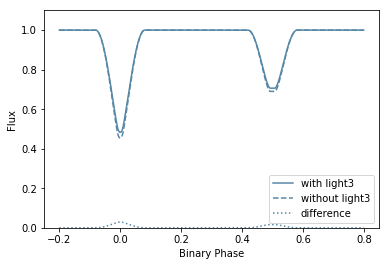


#######################################################

Number density per pixel Npx:  1.2411237254576295
foo foo  14.352123900065129
a,r1,r2:  138.5415579442235 5.95510067368871e-05 0.02936823074067242
Crowding Lum, BinaryLum, LIGHT 3: 0.05604257709360625 9744.068944924125 5.751455311982364e-06
Secondary 2D distance:  2.0041082159230394

#######################################################

Number density per pixel Npx:  2.4656814535950144
foo foo  66.29986380101931
a,r1,r2:  58.82108367658806 0.0001828264080113696 0.00015516192390090474
Crowding Lum, BinaryLum, LIGHT 3: 0.013292834867096929 2.5750313380486687e-06 5162.2031431936275
Secondary 2D distance:  1.6769467656279533

#######################################################

Number density per pixel Npx:  2.4656814535950144
foo foo  0.13813099626307682
a,r1,r2:  114.1732582569334 4.018332648725662e-05 7.531172516370312e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.052216440120383505 0.013390546002195816 3.8995004469437555
Second

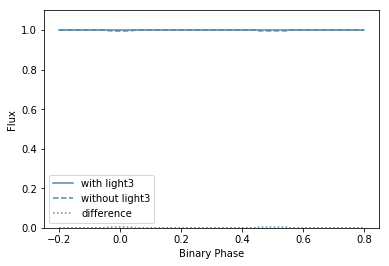


#######################################################

Number density per pixel Npx:  5.513919816257599
foo foo  0.4073992456217944
a,r1,r2:  59.32118266238456 0.00012382913740259256 2.360033865082965e-07
Crowding Lum, BinaryLum, LIGHT 3: 35.58653200369583 0.23940763835606363 148.6440961034379
Secondary 2D distance:  3.34779579084903


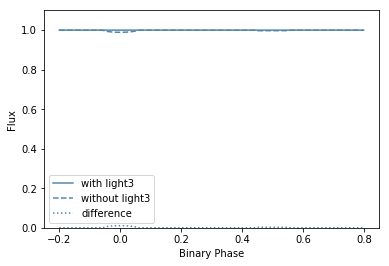


#######################################################

Number density per pixel Npx:  5.513919816257599
foo foo  22.11236541701302
a,r1,r2:  153.87091655688556 0.009155359450849703 7.655380616693748e-05
Crowding Lum, BinaryLum, LIGHT 3: 12.621348722721118 18.000159423401744 0.7011798299026334
Secondary 2D distance:  1.7080775310228087


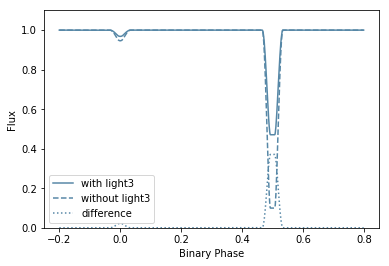


#######################################################

Number density per pixel Npx:  1.3434353849648943
foo foo  0.44957414337009116
a,r1,r2:  134.76521404786644 0.3647498774688074 5.9365683332233115e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.19698788234081355 8754.015536795636 2.2502573991651836e-05
Secondary 2D distance:  3.349174689687669

#######################################################

Number density per pixel Npx:  1.3434353849648943
foo foo  0.8718601194396349
a,r1,r2:  150.28606703415505 1.9255550083112163e-05 3.8340321479755e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.028100312290119018 0.03639845308132268 0.7720194104770423
Secondary 2D distance:  0.34421225334310335

#######################################################

Number density per pixel Npx:  1.3328218584997233
foo foo  2.5752750925839627
a,r1,r2:  114.46548251480141 1.2230761354795036e-07 1.0094009952436306e-07
Crowding Lum, BinaryLum, LIGHT 3: 0.06213261395906787 0.0002626663608418409 236.54576002779334
Sec

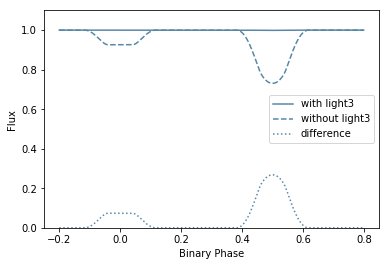


#######################################################

Number density per pixel Npx:  1.3328218584997233
foo foo  0.08151484011586155
a,r1,r2:  52.90601408214874 0.00014928894986039555 0.00021015179772120805
Crowding Lum, BinaryLum, LIGHT 3: 0.09604820962074599 0.000105635775920841 909.2394009840045
Secondary 2D distance:  1.8696689086111147

#######################################################

Number density per pixel Npx:  5.629302061630223
foo foo  3.4954687827974635
a,r1,r2:  172.52346903878384 4.4286979476807986e-05 2.9761649366447582e-05
Crowding Lum, BinaryLum, LIGHT 3: 3.302918636387712 3.175067178239216e-06 1040267.3237986094
Secondary 2D distance:  2.3298743080209166

#######################################################

Number density per pixel Npx:  5.629302061630223
foo foo  20.55848519211138
a,r1,r2:  112.57380970983772 8.917426858389557e-05 1.2436285168002582e-07
Crowding Lum, BinaryLum, LIGHT 3: 1.1083479948644743 1.159602153703839e-06 955800.221070946
Seconda

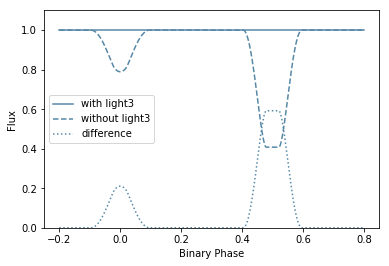


#######################################################

Number density per pixel Npx:  4.783746449905627
foo foo  11.174254686886014
a,r1,r2:  78.13800439461265 0.00013981033207917574 0.00010852945753804789
Crowding Lum, BinaryLum, LIGHT 3: 24.765483472893983 2.4820853397177484e-06 9977692.1754472
Secondary 2D distance:  4.077598728925916


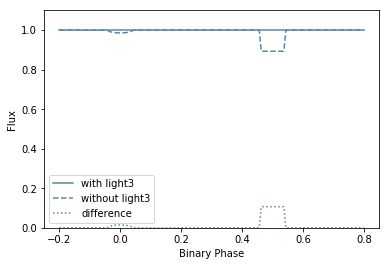


#######################################################

Number density per pixel Npx:  4.783746449905627
foo foo  49.564179510633
a,r1,r2:  54.53902637130185 0.0012682491102912919 2.5669691836242105e-07
Crowding Lum, BinaryLum, LIGHT 3: 0.1816616770326956 1.0057058627400996e-08 18063102.121901587
Secondary 2D distance:  2.4506463190648855

#######################################################

Number density per pixel Npx:  4.041676295671808
foo foo  0.1147789203908754
a,r1,r2:  35.89297705617721 0.00023651008738594838 0.0003099035984127237
Crowding Lum, BinaryLum, LIGHT 3: 3.255767390338714 0.005913366034334643 550.5776864538446
Secondary 2D distance:  2.6470210097637232

#######################################################

Number density per pixel Npx:  4.041676295671808
foo foo  6.536829863071644
a,r1,r2:  157.21381438276094 8.905069859773818e-08 8.905069859773818e-08
Crowding Lum, BinaryLum, LIGHT 3: 1.1503398719090037 2.3946180084361987e-10 4803855428.533385
Secondary 2D d

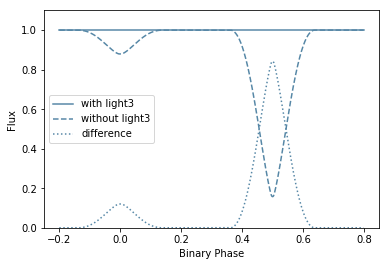


#######################################################

Number density per pixel Npx:  2.4599207482630097
foo foo  315.58787577041676
a,r1,r2:  179.0496202042248 0.006425347581371839 7.819061545079816e-08
Crowding Lum, BinaryLum, LIGHT 3: 0.06216771816105905 15.232778137762455 0.004081180569875409
Secondary 2D distance:  1.6136273229969451


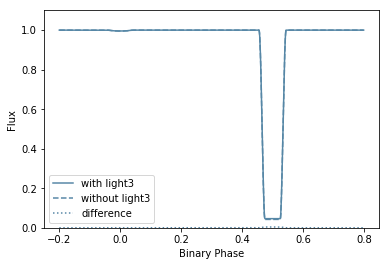


#######################################################

Number density per pixel Npx:  2.4599207482630097
foo foo  0.29807790156798264
a,r1,r2:  0.0 inf inf
Crowding Lum, BinaryLum, LIGHT 3: 0.03018598434138437 3793.456257945087 7.957383000835259e-06
Secondary 2D distance:  1.4923340719285576

#######################################################

Number density per pixel Npx:  3.282545129516259


/Users/andrewbowen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:114: RuntimeWarning: divide by zero encountered in double_scalars
/Users/andrewbowen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:115: RuntimeWarning: divide by zero encountered in double_scalars


foo foo  7.816053315421108
a,r1,r2:  108.26679231703538 8.533344932347885e-05 1.1520879450087307e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.08343840787928794 3.1328882434732885e-06 26633.062335726227
Secondary 2D distance:  0.5329841109672756


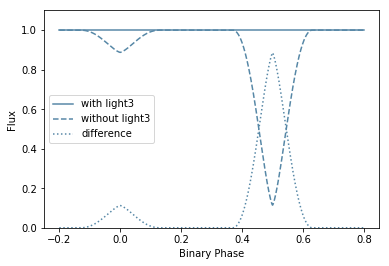


#######################################################

Number density per pixel Npx:  3.282545129516259
foo foo  18.373487874173154
a,r1,r2:  171.55157927204905 5.482613789576236e-05 2.269606590888099e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.4996199253422221 3.1190225494628426e-06 160184.77501173134
Secondary 2D distance:  1.3040218547671536

#######################################################

Number density per pixel Npx:  5.8734934232404985
foo foo  0.2323876541785704
a,r1,r2:  77.57011072565466 1.389265478462049e-07 1.8048188753416074e-07
Crowding Lum, BinaryLum, LIGHT 3: 0.18129856857741988 1.403504163855841e-05 12917.56542277289
Secondary 2D distance:  3.7831499762186005


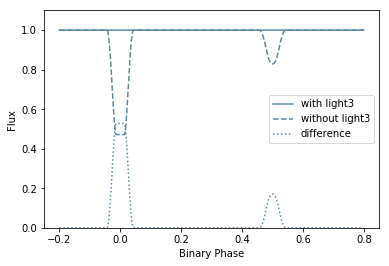


#######################################################

Number density per pixel Npx:  5.8734934232404985
foo foo  133.33077984532116
a,r1,r2:  131.565863755411 0.009503995626396056 1.0641058098494955e-07
Crowding Lum, BinaryLum, LIGHT 3: 0.13850789002294808 29.74444728398502 0.004656596530456405
Secondary 2D distance:  0.8576989134204396

#######################################################

Number density per pixel Npx:  2.260611344035996
foo foo  0.0009292155536329399
a,r1,r2:  106.1937668507355 1.3183447969858916e-07 0.010238846528341812
Crowding Lum, BinaryLum, LIGHT 3: 155.6710195234018 3.661255204164067 42.5184836463604
Secondary 2D distance:  10.754286345042006

#######################################################

Number density per pixel Npx:  2.260611344035996
foo foo  0.06642824071718614
a,r1,r2:  102.17280976564061 3.991200156075241e-05 9.895167271596027e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.00455950251872482 0.006677023768300265 0.6828645032494034
Secondary 2D d

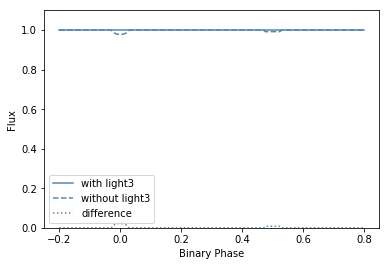


#######################################################

Number density per pixel Npx:  4.196816139317073
foo foo  0.12307817383896327
a,r1,r2:  192.69026965597558 7.265545906908145e-08 4.792772739783631e-05
Crowding Lum, BinaryLum, LIGHT 3: 5.668909487306103 1.2500709212975785e-06 4534870.29473636
Secondary 2D distance:  3.12705005492897


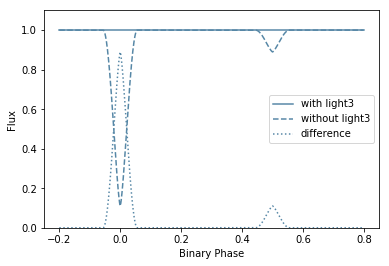


#######################################################

Number density per pixel Npx:  4.196816139317073
foo foo  30.631016545716847
a,r1,r2:  150.4341107810169 5.974968278986655e-05 3.2277667403386736e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.6735556931253681 0.0027153338471158014 248.05630948135965
Secondary 2D distance:  1.430340551065835

#######################################################

Number density per pixel Npx:  4.000657860710496
foo foo  10.938936775774728
a,r1,r2:  209.343762802819 4.5015255157238425e-05 6.687564899264092e-08
Crowding Lum, BinaryLum, LIGHT 3: 0.2142300362296446 1.2290982107432169e-06 174298.55023554462
Secondary 2D distance:  6.404105602468113

#######################################################

Number density per pixel Npx:  4.000657860710496
foo foo  0.5224723570263548
a,r1,r2:  161.49273740833195 8.669120497103973e-08 8.669120497103973e-08
Crowding Lum, BinaryLum, LIGHT 3: 1.9571165613454278 0.0008714443530426196 2245.8307917335387
Secondary 

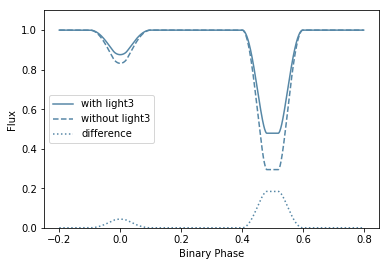


#######################################################

Number density per pixel Npx:  2.053030664872183
foo foo  0.13173977677392346
a,r1,r2:  98.0454751456709 4.029835580404699e-05 9.285811022472174e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.030218703290192328 0.015583387765831246 1.939161352093866
Secondary 2D distance:  6.856485785812106

#######################################################

Number density per pixel Npx:  2.824691362282242
foo foo  0.2636594570128632
a,r1,r2:  203.362597061883 6.884255119804462e-08 2.4843596180946566e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.572164344095782 3.775696450454901e-05 15153.875625431881
Secondary 2D distance:  1.8022935439390881

#######################################################

Number density per pixel Npx:  2.824691362282242
foo foo  0.13678490377552832
a,r1,r2:  61.65465405885516 2.2707126029181325e-07 2.2707126029181325e-07
Crowding Lum, BinaryLum, LIGHT 3: 1.1211826841298713 9.827751680871362e-05 11408.333467685496
Secondary 

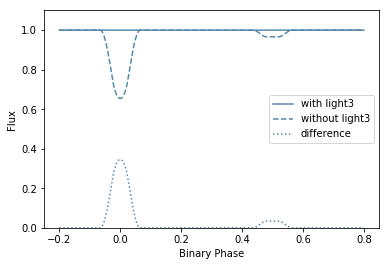


#######################################################

Number density per pixel Npx:  1.5570696578706993
foo foo  0.032583974340572856
a,r1,r2:  113.36130317578017 4.183944862170837e-05 7.626165176235091e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.07432138581267408 0.0032717900001308737 22.715817888587342
Secondary 2D distance:  1.6014533529033017

#######################################################

Number density per pixel Npx:  1.5570696578706993
foo foo  16.155837150529347
a,r1,r2:  25.5226122618492 5.485331930903867e-07 4.8470085315907817e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.08886281586611477 0.02394535646216693 3.7110667367393684
Secondary 2D distance:  2.021902775588913

#######################################################

Number density per pixel Npx:  6.2859254077520115
foo foo  0.0058702214698223626
a,r1,r2:  104.98360518704632 0.00011120550262359408 0.020568292039282288
Crowding Lum, BinaryLum, LIGHT 3: 1.085411668490983 6.172469287260895 0.17584723681511374
Second

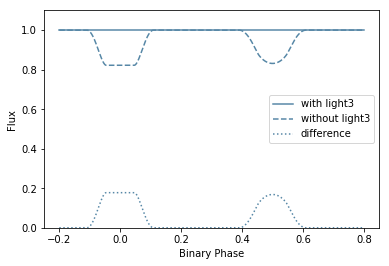


#######################################################

Number density per pixel Npx:  2.6604398552795336
foo foo  241.65354593612471
a,r1,r2:  131.26090709700188 0.008142134625472343 2.9650218405143172e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.016700168913650684 2.949671010321297 0.005661705612325761
Secondary 2D distance:  9.525615674975198

#######################################################

Number density per pixel Npx:  2.6604398552795336
foo foo  44.68383394010001
a,r1,r2:  21.575545226798273 4.252627727491073e-05 0.00029063168953110134
Crowding Lum, BinaryLum, LIGHT 3: 1.832321252041822 16.54654744782771 0.11073737635112367
Secondary 2D distance:  1.2160735632318418

#######################################################

Number density per pixel Npx:  2.1597898788755234
foo foo  2.1249282814671027
a,r1,r2:  232.57714097875123 6.019508168809707e-08 6.019508168809707e-08
Crowding Lum, BinaryLum, LIGHT 3: 19.800527346773855 2.7180827302740754e-10 72847404997.04102
Secondary 

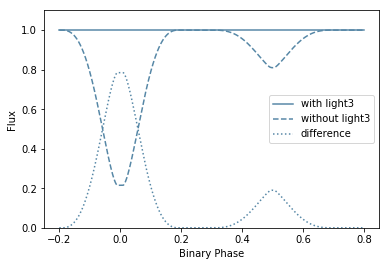


#######################################################

Number density per pixel Npx:  6.711408560020673
foo foo  0.3827277510872718
a,r1,r2:  188.56652921651533 7.424435321670984e-08 7.424435321670984e-08
Crowding Lum, BinaryLum, LIGHT 3: 2.0554652010745604 0.0006663937205151093 3084.460639103451
Secondary 2D distance:  3.173601864600074


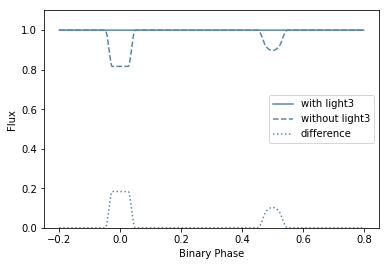


#######################################################

Number density per pixel Npx:  6.711408560020673
foo foo  11.110786280803056
a,r1,r2:  55.99897849143587 0.00014644898155461244 0.0001075060551903957
Crowding Lum, BinaryLum, LIGHT 3: 12.914484267574466 0.0092789144797649 1391.8098173808883
Secondary 2D distance:  1.582121595915451

#######################################################

Number density per pixel Npx:  5.9104050690364955
foo foo  0.7699903842341722
a,r1,r2:  60.938061284888384 0.00017803302044710762 0.0001313353388618617
Crowding Lum, BinaryLum, LIGHT 3: 1.9069072076291889 2.542757802472273e-06 749936.6261997665
Secondary 2D distance:  2.2343990637925755

#######################################################

Number density per pixel Npx:  5.9104050690364955
foo foo  2.4634658114787764
a,r1,r2:  132.23086671978407 1.2287910198659654e-05 3.321015077311553e-05
Crowding Lum, BinaryLum, LIGHT 3: 8.701131815856945 3.676969901344745e-06 2366386.467475504
Secondary 2

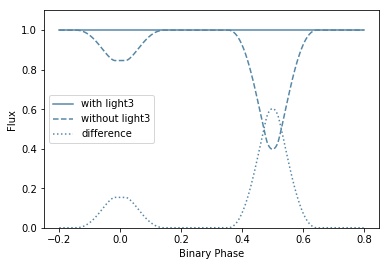


#######################################################

Number density per pixel Npx:  5.09397085485144
foo foo  0.06651807392396616
a,r1,r2:  163.35000991327487 8.570553504975496e-08 8.570553504975496e-08
Crowding Lum, BinaryLum, LIGHT 3: 51.824028740042294 8.846128224585795e-06 5858385.434207163
Secondary 2D distance:  2.514073136046544

#######################################################

Number density per pixel Npx:  1.2444974350265896
foo foo  1.0837559013033795
a,r1,r2:  99.95110631416578 0.03744496252648618 8.973323195968833e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.006577961846086073 356.24412633148796 1.846475874233847e-05
Secondary 2D distance:  1.3974257799866157

#######################################################

Number density per pixel Npx:  1.2444974350265896
foo foo  0.8343719246994104
a,r1,r2:  168.15796990009113 0.0007420647565292658 5.9877540765694345e-05
Crowding Lum, BinaryLum, LIGHT 3: 1.4130800549092455 22.574291070236345 0.06259687405078058
Secondary 

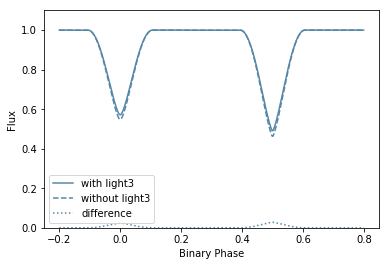


#######################################################

Number density per pixel Npx:  5.322912470233081
foo foo  1.501754623072
a,r1,r2:  177.70893542838132 7.878050682286685e-08 7.878050682286685e-08
Crowding Lum, BinaryLum, LIGHT 3: 0.23059546785897767 2.7490716460756036e-10 838812142.9580084
Secondary 2D distance:  11.085227907252397

#######################################################

Number density per pixel Npx:  5.322912470233081
foo foo  0.008887768254259708
a,r1,r2:  13.856811043896137 1.01033347107428e-06 0.09647180017689516
Crowding Lum, BinaryLum, LIGHT 3: 33.02009661555986 46.80824212470072 0.7054333834539611
Secondary 2D distance:  1.1036819655753942

#######################################################

Number density per pixel Npx:  1.1733676421687893
foo foo  0.14219299035186878
a,r1,r2:  125.16730704488758 1.118502932637139e-07 1.118502932637139e-07
Crowding Lum, BinaryLum, LIGHT 3: 0.14417096539262939 2.51123821243472e-10 574103104.5113453
Secondary 2D dis

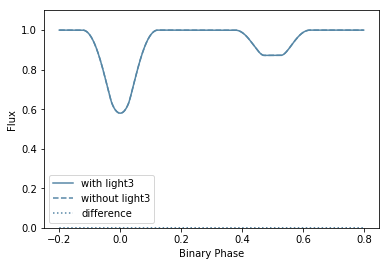


#######################################################

Number density per pixel Npx:  1.848601343127814
foo foo  37.55975727748413
a,r1,r2:  107.19192316379147 9.870712782996229e-05 1.3060685531882575e-07
Crowding Lum, BinaryLum, LIGHT 3: 0.7956449467056794 1.1180148023792525e-06 711658.6873558952
Secondary 2D distance:  3.2286753425001615

#######################################################

Number density per pixel Npx:  1.4540322291054975
foo foo  15.504748182675822
a,r1,r2:  75.08604831032726 0.00012910017489006315 6.569488727597548e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.03520447962197318 0.006899716578321597 5.102308076332159
Secondary 2D distance:  2.685845568821043

#######################################################

Number density per pixel Npx:  1.4540322291054975
foo foo  0.23482903942777666
a,r1,r2:  114.26435246655495 1.2252290148056266e-07 1.2252290148056266e-07
Crowding Lum, BinaryLum, LIGHT 3: 0.08001813501649577 2.392894560618277e-10 334398917.2503307
Secon

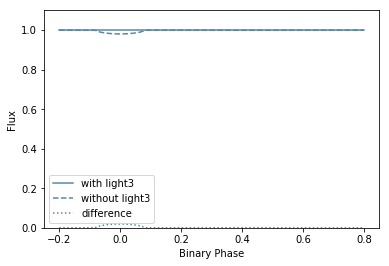


#######################################################

Number density per pixel Npx:  3.023758390956632
foo foo  0.8663222465042755
a,r1,r2:  204.40886987286513 6.849017857545756e-08 6.849017857545756e-08
Crowding Lum, BinaryLum, LIGHT 3: 0.12817488323345747 2.5969310173408946e-10 493562910.9035828
Secondary 2D distance:  8.264214830877785


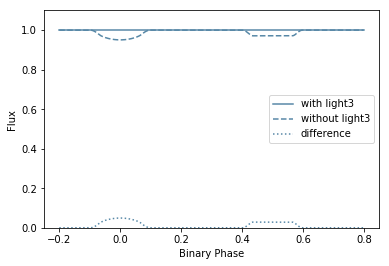


#######################################################

Number density per pixel Npx:  3.023758390956632
foo foo  3.0138676136214064
a,r1,r2:  148.23217945703192 9.444642891497242e-08 7.753945971315288e-08
Crowding Lum, BinaryLum, LIGHT 3: 1.6664929297727364 2.139083994632333e-08 77906848.63027896
Secondary 2D distance:  2.574986296410308

#######################################################

Number density per pixel Npx:  2.3446045804250386
foo foo  1.772260260041074
a,r1,r2:  63.90534644435346 0.0011454448589477246 2.1907400208198088e-07
Crowding Lum, BinaryLum, LIGHT 3: 0.394875663578536 2.9262223734169945e-08 13494383.310227843
Secondary 2D distance:  2.295587939168476

#######################################################

Number density per pixel Npx:  2.3446045804250386
foo foo  0.48422168032666946
a,r1,r2:  67.59869586307327 2.0710458717070746e-07 2.0710458717070746e-07
Crowding Lum, BinaryLum, LIGHT 3: 0.06211509016504381 0.0008039863772171127 77.25888388811583
Secondar

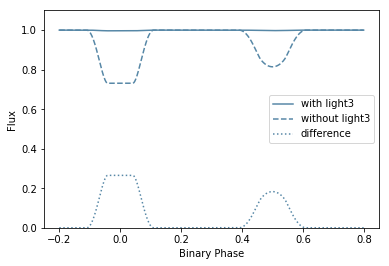


#######################################################

Number density per pixel Npx:  4.38962235353651
foo foo  0.15167478009581917
a,r1,r2:  126.55725463411116 0.18887260407141238 7.006777242608818e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.03871049795883112 7826.156743375442 4.946297298683438e-06
Secondary 2D distance:  3.257964973112795


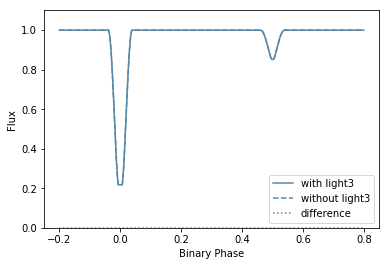


#######################################################

Number density per pixel Npx:  4.38962235353651
foo foo  1.3234060328336354
a,r1,r2:  184.84495053267906 7.573915305587379e-08 2.3615411354566953e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.31874672624578254 1.7946092163896584e-06 177613.44549819472
Secondary 2D distance:  3.4557208485402424


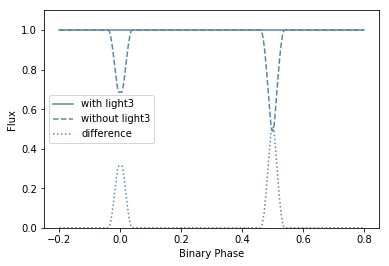


#######################################################

Number density per pixel Npx:  1.2282796194335612
foo foo  0.3909180563666116
a,r1,r2:  98.44195077251145 1.1563295631018622e-07 1.4221579204939229e-07
Crowding Lum, BinaryLum, LIGHT 3: 0.014878567858566248 0.00029489840254773205 50.45319923751711
Secondary 2D distance:  2.978542813442972

#######################################################

Number density per pixel Npx:  1.2282796194335612
foo foo  0.09013914289339989
a,r1,r2:  50.6077443864062 2.766375022191377e-07 0.0014506560965624673
Crowding Lum, BinaryLum, LIGHT 3: 4.705035761910322 3.181528392007835e-08 147886021.50242057
Secondary 2D distance:  0.8573099882004885


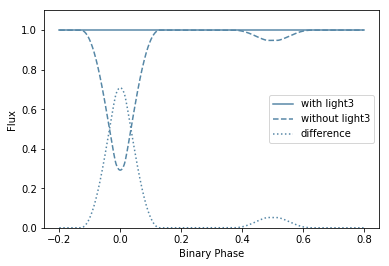


#######################################################

Number density per pixel Npx:  1.7501312937242242
foo foo  397.28836042808416
a,r1,r2:  97.34864361628203 0.01083229468305232 1.4381299502418986e-07
Crowding Lum, BinaryLum, LIGHT 3: 0.3427209978110811 2.65257967752419 0.12920290414460348
Secondary 2D distance:  1.5442392082427494

#######################################################

Number density per pixel Npx:  1.7501312937242242
foo foo  0.8226121104243402
a,r1,r2:  153.38133385330798 9.127577423071198e-08 9.127577423071198e-08
Crowding Lum, BinaryLum, LIGHT 3: 8.983777820672252 2.6657122196127175e-10 33701229092.078968
Secondary 2D distance:  1.1812523604256784

#######################################################

Number density per pixel Npx:  5.6971618906282115
foo foo  0.0020083665127919644
a,r1,r2:  99.42030023556997 2.6592344888680466e-05 0.009934493986887154
Crowding Lum, BinaryLum, LIGHT 3: 5.876456519454655 1.7993974031760513 3.2657913749804988
Secondary 2D 

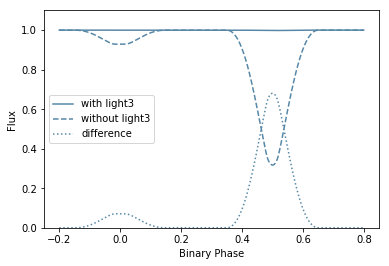


#######################################################

Number density per pixel Npx:  1.0527282212545042
foo foo  92.8587642612771
a,r1,r2:  170.07056704558642 0.0004202517022815015 8.231877063270673e-08
Crowding Lum, BinaryLum, LIGHT 3: 0.43791756325763886 9.894468067175436e-09 44258828.29521838
Secondary 2D distance:  1.6700558486312604

#######################################################

Number density per pixel Npx:  1.0527282212545042
foo foo  0.8263197409394486
a,r1,r2:  181.21245815903544 2.3308792936289286e-05 3.394953638306028e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.29434879668952907 0.02726610394795925 10.795410934078824
Secondary 2D distance:  1.3462863692841278

#######################################################

Number density per pixel Npx:  4.126918132014347
foo foo  0.2507568226773625
a,r1,r2:  17.38583145586504 0.015707931163569038 8.052534062313802e-07
Crowding Lum, BinaryLum, LIGHT 3: 12088.609246117276 628.220926187214 19.24260835990489
Secondary 2D dis

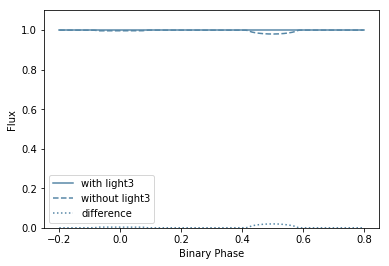


#######################################################

Number density per pixel Npx:  1.095093558611012
foo foo  0.4222049552586946
a,r1,r2:  142.94574920706262 8.477213382730276e-08 9.793925372149711e-08
Crowding Lum, BinaryLum, LIGHT 3: 6.238328762425955 3.0411019721442243e-05 205133.82384305337
Secondary 2D distance:  5.52746899853529

#######################################################

Number density per pixel Npx:  1.095093558611012
foo foo  0.061932124724788463
a,r1,r2:  14.68688476364349 0.0006872254292059058 0.00036590859738818316
Crowding Lum, BinaryLum, LIGHT 3: 21.15818356839717 0.005333724036986795 3966.868818423189
Secondary 2D distance:  5.200348167356127

#######################################################

Number density per pixel Npx:  6.015778528559357
foo foo  0.35551878136600384
a,r1,r2:  75.22691722051344 0.00010599244048531874 0.00012823209517057147
Crowding Lum, BinaryLum, LIGHT 3: 177.79656816567805 0.0010847313925481125 163908.38265316637
Secondary 

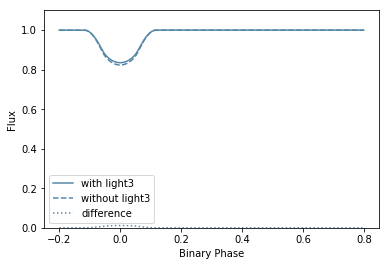


#######################################################

Number density per pixel Npx:  1.5391922153230644
foo foo  1.1191709577388904
a,r1,r2:  65.75913512824843 2.128981771535794e-07 0.003948527839529218
Crowding Lum, BinaryLum, LIGHT 3: 0.0781609922376039 1123.80620100861 6.95502411069229e-05
Secondary 2D distance:  3.6990127903768424


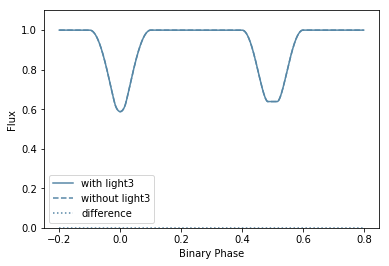


#######################################################

Number density per pixel Npx:  1.5391922153230644
foo foo  27.98082588264811
a,r1,r2:  28.246740216643634 0.0004229350679769146 0.0002668874129195266
Crowding Lum, BinaryLum, LIGHT 3: 0.049397095948631516 0.00481156225912729 10.266332074354379
Secondary 2D distance:  1.4946580582023834

#######################################################

Number density per pixel Npx:  3.3882683522072754
foo foo  1.2600520344059207
a,r1,r2:  195.69753738569383 7.153896869130172e-08 7.153896869130172e-08
Crowding Lum, BinaryLum, LIGHT 3: 2.1473692330274172 2.804528640730678e-10 7656791953.702253
Secondary 2D distance:  0.7280874323071155

#######################################################

Number density per pixel Npx:  3.3882683522072754
foo foo  0.5483467903497273
a,r1,r2:  34.78374801237309 0.00021901782697133617 4.0248681640115363e-07
Crowding Lum, BinaryLum, LIGHT 3: 2.6250167500869024 0.5402883984994911 4.858547319130294
Secondary 

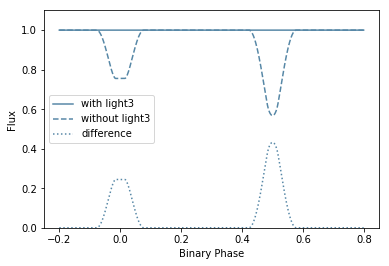


#######################################################

Number density per pixel Npx:  2.2880211697270094
foo foo  0.001592840873057323
a,r1,r2:  101.10086404761176 1.3847557221080655e-07 0.010989748093409576
Crowding Lum, BinaryLum, LIGHT 3: 2.4291969357752055 9.225677353983963 0.26330824746718406
Secondary 2D distance:  2.0445146893126873

#######################################################

Number density per pixel Npx:  4.45855894982188
foo foo  366.8559364384329
a,r1,r2:  200.50685273262928 0.005709770664182932 6.982304998158162e-08
Crowding Lum, BinaryLum, LIGHT 3: 2.4632124818150487 14.502969701797582 0.16984193806250206
Secondary 2D distance:  3.0398742922510382

#######################################################

Number density per pixel Npx:  4.45855894982188
foo foo  1.2230698977356076
a,r1,r2:  185.6635831128059 7.540520206105172e-08 7.540520206105172e-08
Crowding Lum, BinaryLum, LIGHT 3: 143.89179663541174 0.00959107237051867 15002.680730228949
Secondary 2D dist

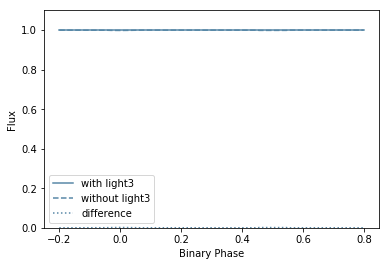


#######################################################

Number density per pixel Npx:  6.614702274899551
foo foo  1.1227864585653007
a,r1,r2:  144.9721890369066 9.657024628658894e-08 6.742362677098838e-05
Crowding Lum, BinaryLum, LIGHT 3: 26.4213255204083 1.182593677242975e-06 22341845.74874891
Secondary 2D distance:  3.7337471878370505

#######################################################

Number density per pixel Npx:  6.614702274899551
foo foo  2.043386154644029
a,r1,r2:  189.64095056034185 7.382371770777082e-08 7.382371770777082e-08
Crowding Lum, BinaryLum, LIGHT 3: 4.829817877486593 0.0001344426975872692 35924.73197996842
Secondary 2D distance:  2.454894591207045

#######################################################

Number density per pixel Npx:  1.552226515619417
foo foo  0.027179157229751102
a,r1,r2:  168.03135471036686 8.331778330378631e-08 5.564327500682405e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.003400368116594088 1.2815250289337216e-06 2653.3762820249603
Secondary 2

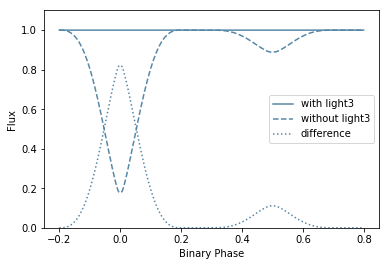


#######################################################

Number density per pixel Npx:  2.9033477906079184
foo foo  285.257676418433
a,r1,r2:  115.19277991669705 0.01025821203997904 1.215353949277399e-07
Crowding Lum, BinaryLum, LIGHT 3: 0.09445901962273946 19.677159239382984 0.0048004398639862516
Secondary 2D distance:  1.6902845919644627

#######################################################

Number density per pixel Npx:  6.775296226881038
foo foo  0.01004282777668463
a,r1,r2:  98.52375387393496 1.4209771196815695e-07 0.0007175213817307318
Crowding Lum, BinaryLum, LIGHT 3: 17599.47553766069 9.985010339102584e-09 1762589615830.3296
Secondary 2D distance:  1.0511329226440038

#######################################################

Number density per pixel Npx:  6.775296226881038
foo foo  5.831399556044606
a,r1,r2:  17.86002577222848 7.838734489268968e-07 0.0005220482688413953
Crowding Lum, BinaryLum, LIGHT 3: 0.9199114769324809 0.027160077711988532 33.869986922991366
Secondary 2D 

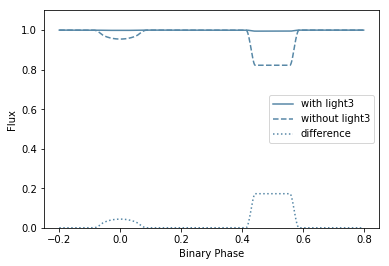


#######################################################

Number density per pixel Npx:  4.116795565644365
foo foo  1.3367819944382842
a,r1,r2:  123.22974000356943 7.821855573818511e-05 5.394673313403431e-05
Crowding Lum, BinaryLum, LIGHT 3: 1.7936671976781584 2.857041936659163e-06 627805.6946463848
Secondary 2D distance:  0.7101444630144466

#######################################################

Number density per pixel Npx:  4.116795565644365
foo foo  0.1328968566192645
a,r1,r2:  196.0725644283633 7.140213645298148e-08 2.6611287738384182e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.9355585699546382 1.631775134747557e-06 573337.925080819
Secondary 2D distance:  2.594649358018346

#######################################################

Number density per pixel Npx:  1.6367257663641868
foo foo  0.06837171041408176
a,r1,r2:  97.28418349160088 1.4390828495989486e-07 0.00010557967187703129
Crowding Lum, BinaryLum, LIGHT 3: 0.8662087822052015 1.1417727093342144e-06 758652.5541587882
Secondary

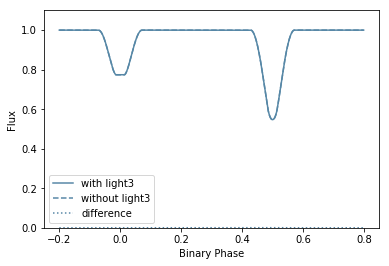


#######################################################

Number density per pixel Npx:  1.017604587133428
foo foo  1.2278252105277294
a,r1,r2:  60.91107444665453 2.2984326129825695e-07 2.2984326129825695e-07
Crowding Lum, BinaryLum, LIGHT 3: 0.17526093057968356 0.003515645066277418 49.85171349087883
Secondary 2D distance:  4.174114371349026

#######################################################

Number density per pixel Npx:  1.017604587133428
foo foo  3.46167625540739
a,r1,r2:  65.80804699044548 2.1273994048224268e-07 9.05317379097673e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.08615998648642623 0.07747581980691665 1.1120887355713311
Secondary 2D distance:  1.6402627512701382


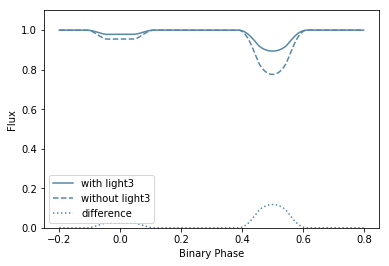


#######################################################

Number density per pixel Npx:  2.5816398920008843
foo foo  0.8907958325529871
a,r1,r2:  67.33150405264821 0.005002535740707941 2.0792644092805418e-07
Crowding Lum, BinaryLum, LIGHT 3: 0.7152922965374189 2580.364598827636 0.00027720590216685076
Secondary 2D distance:  3.019877527140207


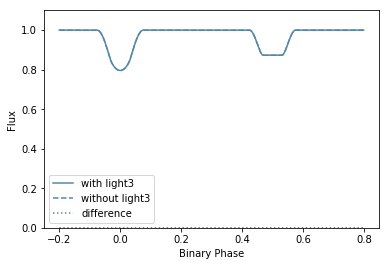


#######################################################

Number density per pixel Npx:  2.5816398920008843
foo foo  0.1940688525993714
a,r1,r2:  196.3186916616131 7.131261868906124e-08 3.187282939867271e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.2805148899902468 1.536983195890309e-06 182510.05654473437
Secondary 2D distance:  0.8739006994746453


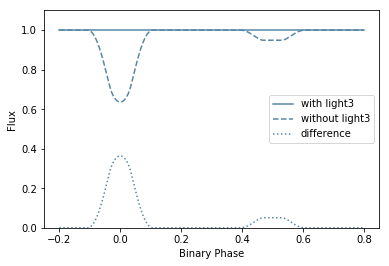


#######################################################

Number density per pixel Npx:  4.6385114293325795
foo foo  35.40636040635561
a,r1,r2:  124.66207562355486 7.588051678865481e-05 1.1230360099470945e-07
Crowding Lum, BinaryLum, LIGHT 3: 1.244796403809886 1.270199281301618e-06 980000.8724097995
Secondary 2D distance:  2.3379592961966065

#######################################################

Number density per pixel Npx:  4.6385114293325795


/Users/andrewbowen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:99: RuntimeWarning: invalid value encountered in double_scalars


foo foo  0.57083313040093
a,r1,r2:  26.360311256401786 0.007439377133885618 18.345062881976403
Crowding Lum, BinaryLum, LIGHT 3: 4.6882372749033845 122523.78898087791 3.826389400702479e-05
Secondary 2D distance:  4.472923120555339


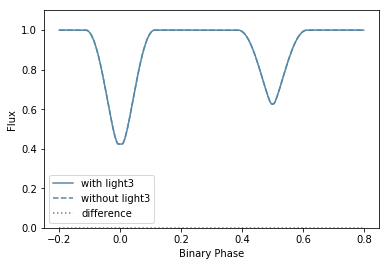


#######################################################

Number density per pixel Npx:  2.8475862008088284
foo foo  0.37108067886689516
a,r1,r2:  229.54062571700743 6.099138205391192e-08 6.099138205391192e-08
Crowding Lum, BinaryLum, LIGHT 3: 8.90079668645423 2.6951112976597934e-10 33025711013.058826
Secondary 2D distance:  0.7665963639067316


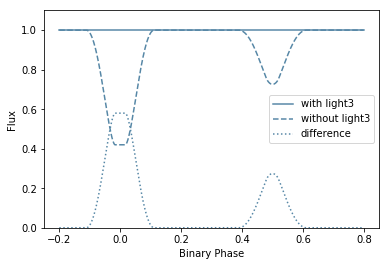


#######################################################

Number density per pixel Npx:  2.8475862008088284
foo foo  1.8630623277743212
a,r1,r2:  85.27924285349577 1.6416656071924906e-07 1.3178701481795554e-07
Crowding Lum, BinaryLum, LIGHT 3: 14.830969435656302 0.00020993632143513538 70645.08577777795
Secondary 2D distance:  2.806902042182341

#######################################################

Number density per pixel Npx:  3.423725647074766
foo foo  197.23783923614923
a,r1,r2:  127.01863016847875 0.008874734777949967 1.102200518257067e-07
Crowding Lum, BinaryLum, LIGHT 3: 0.699313776607625 11.478534908490474 0.06092360934411191
Secondary 2D distance:  1.038754670967115

#######################################################

Number density per pixel Npx:  3.423725647074766
foo foo  22.899346439929918
a,r1,r2:  66.91696452849659 0.00015690736116009862 0.0001454517641132997
Crowding Lum, BinaryLum, LIGHT 3: 9.763978863059942 0.0015480286714715005 6307.363063100539
Secondary 2D d

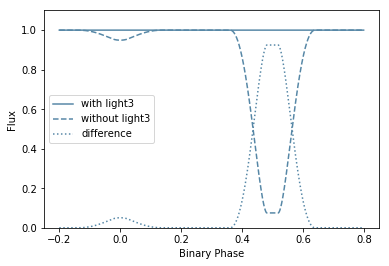


#######################################################

Number density per pixel Npx:  3.2473779428871357
foo foo  2.160987784871403
a,r1,r2:  94.34183898440831 1.4839651368587115e-07 1.4839651368587115e-07
Crowding Lum, BinaryLum, LIGHT 3: 64.5328095579125 0.0006901927001911279 93499.69876534784
Secondary 2D distance:  8.16316704776848

#######################################################

Number density per pixel Npx:  3.2473779428871357
foo foo  32.2714045279405
a,r1,r2:  103.42903274173375 0.010595270754408585 9.502048914215977e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.04192710078207401 3.5928552670008744 0.011669576886984523
Secondary 2D distance:  2.5924274806347314

#######################################################

Number density per pixel Npx:  4.299725598386017
foo foo  126.6904876357066
a,r1,r2:  190.54543721617267 0.00662830125070193 7.347328912482477e-08
Crowding Lum, BinaryLum, LIGHT 3: 1.0935300614083077 31.86788149066346 0.0343144887660225
Secondary 2D distance

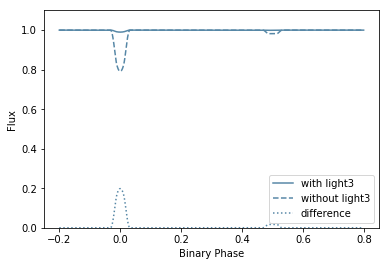


#######################################################

Number density per pixel Npx:  3.3194784166997624
foo foo  0.5339513283652978
a,r1,r2:  106.80829871404096 6.328967828962295e-05 4.337519433039788e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.3874034545414667 3.266871788854226e-06 118585.44796988767
Secondary 2D distance:  4.01260363791439

#######################################################

Number density per pixel Npx:  3.3194784166997624
foo foo  4.25772481756772
a,r1,r2:  93.49705499025431 9.67071978618927e-05 6.81218384562397e-05
Crowding Lum, BinaryLum, LIGHT 3: 8.244638920720691 2.8760849458014272e-06 2866618.711229791
Secondary 2D distance:  0.4129156563482376


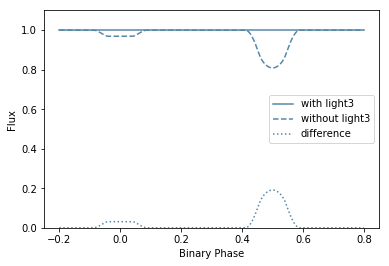


#######################################################

Number density per pixel Npx:  2.5796741821255087
foo foo  0.6958462234589406
a,r1,r2:  155.488510371052 9.003880715424515e-08 9.003880715424515e-08
Crowding Lum, BinaryLum, LIGHT 3: 0.2394494724008321 2.464153808766464e-10 971731032.1659614
Secondary 2D distance:  3.110505086499983


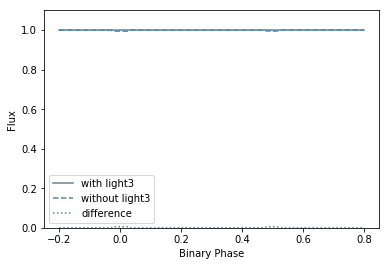


#######################################################

Number density per pixel Npx:  2.5796741821255087
foo foo  9.123100281767814
a,r1,r2:  198.34408985031007 7.058440718130686e-08 7.058440718130686e-08
Crowding Lum, BinaryLum, LIGHT 3: 0.09725098953225507 2.6198711244022395e-10 371205242.22138697
Secondary 2D distance:  7.361932171729693

#######################################################

Number density per pixel Npx:  3.2379602591601215
foo foo  1.4479200280692084
a,r1,r2:  59.62879388324322 0.0001734369869569036 0.000153689887991116
Crowding Lum, BinaryLum, LIGHT 3: 89.22455759604358 0.017648138152063862 5055.749044304099
Secondary 2D distance:  2.194053095154624

#######################################################

Number density per pixel Npx:  3.2379602591601215
foo foo  0.007687129867292197
a,r1,r2:  35.281719740883325 0.0003194876977972687 0.00035659481002580366
Crowding Lum, BinaryLum, LIGHT 3: 0.14476907986513649 2.4715168366571295e-06 58574.99237631943
Seconda

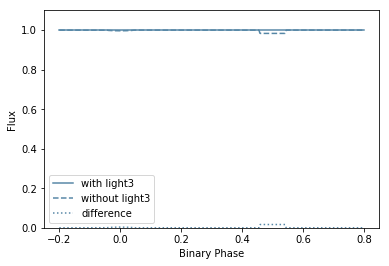


#######################################################

Number density per pixel Npx:  2.4014239097569523
foo foo  0.38847864681607575
a,r1,r2:  111.27339319689295 1.2581624050259408e-07 1.2581624050259408e-07
Crowding Lum, BinaryLum, LIGHT 3: 1.9928008491921017 0.0004875445167427964 4087.4233649589
Secondary 2D distance:  3.6329528240275923


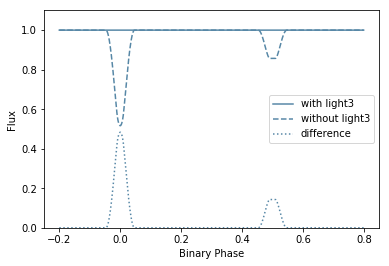


#######################################################

Number density per pixel Npx:  4.849682062850319
foo foo  0.19776424714368585
a,r1,r2:  172.21707509842793 6.573086177769825e-08 8.129275213853518e-08
Crowding Lum, BinaryLum, LIGHT 3: 0.09113098412640094 2.5479958016567247e-10 357657512.88580203
Secondary 2D distance:  1.8981514438340532

#######################################################

Number density per pixel Npx:  4.849682062850319
foo foo  206.3444114892679
a,r1,r2:  150.22585959629194 0.007369368323126001 9.319300976291811e-08
Crowding Lum, BinaryLum, LIGHT 3: 0.46962839517992844 7.232307224573867 0.06493479613037309
Secondary 2D distance:  3.9573784249756043

#######################################################

Number density per pixel Npx:  2.5828209599407295
foo foo  0.013183463449978845
a,r1,r2:  141.15642534620824 9.299384104640554e-05 0.006875265941427899
Crowding Lum, BinaryLum, LIGHT 3: 1.6853503168580715 1.610027066299736 1.046783841175694
Secondary 2D

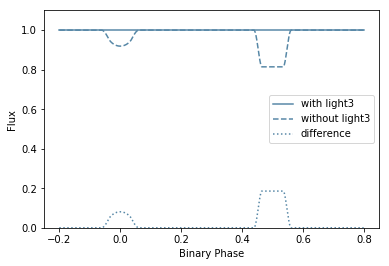


#######################################################

Number density per pixel Npx:  5.087518030425261
foo foo  958.0428224482537
a,r1,r2:  150.71331813387562 0.0072927742543959055 9.289159162141252e-08
Crowding Lum, BinaryLum, LIGHT 3: 0.30444352079470494 5.080603002765329 0.05992271402213456
Secondary 2D distance:  0.9876061528942556

#######################################################

Number density per pixel Npx:  6.43707769793859
foo foo  10.4386279016806
a,r1,r2:  170.69430968268708 4.494137875045143e-05 5.980542038598218e-05
Crowding Lum, BinaryLum, LIGHT 3: 3.602440809050584 12.6731127879613 0.28425856135934396
Secondary 2D distance:  0.5471301928374627

#######################################################

Number density per pixel Npx:  6.43707769793859
foo foo  2.8757748079761707
a,r1,r2:  153.3857818744522 2.8926436925921056e-05 2.880067140593784e-05
Crowding Lum, BinaryLum, LIGHT 3: 66.02088283885537 3.505484437203104e-06 18833597.473201446
Secondary 2D distance

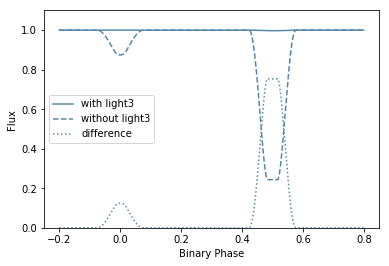


#######################################################

Number density per pixel Npx:  4.36029560194373
foo foo  0.06266501361726173
a,r1,r2:  101.53556679232742 7.691779265083768e-05 8.56103495624254e-05
Crowding Lum, BinaryLum, LIGHT 3: 2.259771763214207 0.0034178316210874476 661.1711791978852
Secondary 2D distance:  3.8863416676638836

#######################################################

Number density per pixel Npx:  4.36029560194373
foo foo  5.654830978507526
a,r1,r2:  52.50062572816414 2.6666348840276113e-07 0.00013737072273443184
Crowding Lum, BinaryLum, LIGHT 3: 1.9746696472145548 0.03189180140991742 61.917783251983074
Secondary 2D distance:  2.148120926721695

#######################################################

Number density per pixel Npx:  5.574806795668418
foo foo  0.04337855781964683
a,r1,r2:  183.00814506173325 7.649932736751935e-08 4.0390789022322194e-05
Crowding Lum, BinaryLum, LIGHT 3: 10.39637015480728 1.490526914871362e-06 6974963.049026542
Secondary 2D di

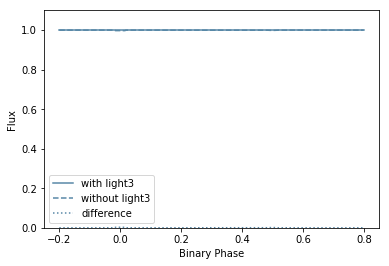


#######################################################

Number density per pixel Npx:  6.6314541733447365
foo foo  211.63803536607264
a,r1,r2:  98.32986805624611 0.011260951632530446 1.4237789876817284e-07
Crowding Lum, BinaryLum, LIGHT 3: 0.2784530288692335 7.351818503111183 0.037875394876981286
Secondary 2D distance:  0.8229004198000348

#######################################################

Number density per pixel Npx:  6.6314541733447365
foo foo  0.02870941444302711
a,r1,r2:  147.08845222681865 8.655513374164473e-05 0.00905348534288302
Crowding Lum, BinaryLum, LIGHT 3: 1799.7559453926722 7.959458988713129 226.1153613511681
Secondary 2D distance:  0.8866649795251298

#######################################################

Number density per pixel Npx:  3.403109618782049
foo foo  2.013325661900463
a,r1,r2:  161.7961043767746 8.652865935139081e-08 8.652865935139081e-08
Crowding Lum, BinaryLum, LIGHT 3: 0.15401845862019975 2.441561546670671e-10 630819480.3863139
Secondary 2D dist

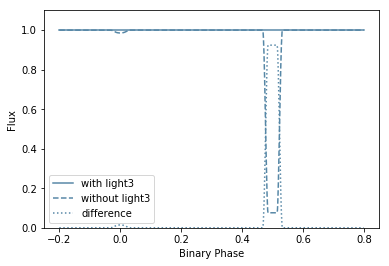


#######################################################

Number density per pixel Npx:  4.222914688961959
foo foo  31.512572487252125
a,r1,r2:  123.56278020550135 8.492125743156143e-05 7.413361437335775e-05
Crowding Lum, BinaryLum, LIGHT 3: 2.897660195895523 2.5881208622598527e-06 1119600.0303345153
Secondary 2D distance:  4.1289364111770706


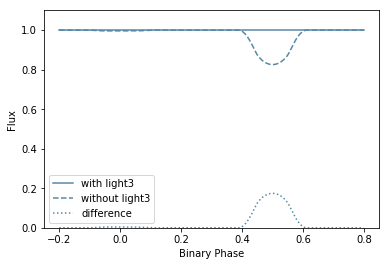


#######################################################

Number density per pixel Npx:  2.0143225738432133
foo foo  43.93185124147552
a,r1,r2:  12.696451557621772 1.1026702962211278e-06 0.47793945025247636
Crowding Lum, BinaryLum, LIGHT 3: 0.23071917580274903 5093.43483898365 4.529736476392953e-05
Secondary 2D distance:  1.7808773925802417

#######################################################

Number density per pixel Npx:  2.0143225738432133
foo foo  0.7334533366478555
a,r1,r2:  201.48979591743196 6.948242682094446e-08 6.948242682094446e-08
Crowding Lum, BinaryLum, LIGHT 3: 2.9566274885424457 2.658305082921953e-10 11122227871.951338
Secondary 2D distance:  1.952789184042475

#######################################################

Number density per pixel Npx:  3.5254668989445266
foo foo  0.9533111639644873
a,r1,r2:  166.55238629290088 8.405763682892807e-08 8.405763682892807e-08
Crowding Lum, BinaryLum, LIGHT 3: 158.0836609436725 2.747762540941108e-10 575317767049.5824
Secondary 2

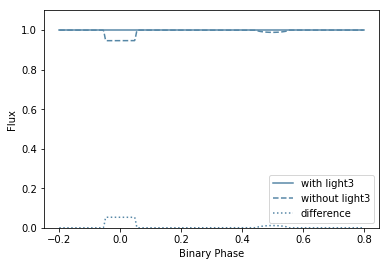


#######################################################

Number density per pixel Npx:  6.453058991671792
foo foo  0.22523898276288004
a,r1,r2:  209.0296995310991 6.697612842292346e-08 6.697612842292346e-08
Crowding Lum, BinaryLum, LIGHT 3: 1.5347069844054422 0.00016698143750933198 9190.883773052157
Secondary 2D distance:  1.5004489226038116

#######################################################

Number density per pixel Npx:  3.355896740282239
foo foo  28.021904465597164
a,r1,r2:  86.95871809295166 0.00031387083575869733 0.00012778980450109184
Crowding Lum, BinaryLum, LIGHT 3: 25.284494462573925 0.18752426385978246 134.83318874127085
Secondary 2D distance:  2.7102058093929626

#######################################################

Number density per pixel Npx:  3.355896740282239
foo foo  0.2264358423811436
a,r1,r2:  118.67827556005221 3.844090377598241e-05 6.53795869728678e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.09443055189616079 3.201849576090964e-06 29492.501022314744
Secondary

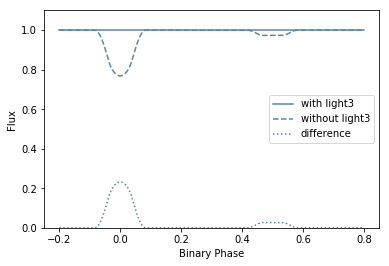


#######################################################

Number density per pixel Npx:  3.6664866218522314
foo foo  78.74497573214018
a,r1,r2:  61.58124038204435 0.00017782788984200935 0.00015163953880785336
Crowding Lum, BinaryLum, LIGHT 3: 2.694405089409086 2.5626774946333824e-06 1051402.3302001755
Secondary 2D distance:  2.0213317217450606


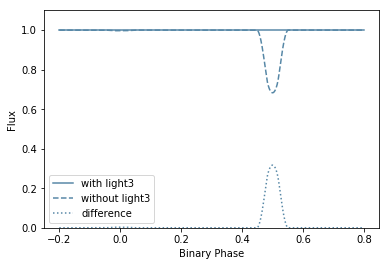


#######################################################

Number density per pixel Npx:  2.447316989357572
foo foo  0.4816055107183222
a,r1,r2:  119.66175446035606 0.0563849128382352 7.423978128803499e-05
Crowding Lum, BinaryLum, LIGHT 3: 2.277523624698941 7364.978856246869 0.00030923695358163564
Secondary 2D distance:  0.47717253124368414

#######################################################

Number density per pixel Npx:  2.447316989357572
foo foo  0.12972411064830883
a,r1,r2:  68.9143389571719 0.0001453512510996927 0.0001395993987752118
Crowding Lum, BinaryLum, LIGHT 3: 104.66084746598932 0.0059764284948517045 17512.27301659305
Secondary 2D distance:  0.8784154112835916


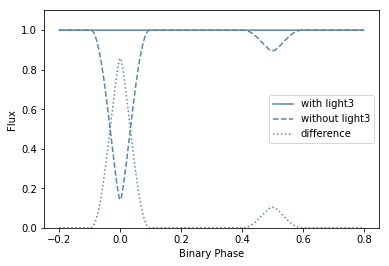


#######################################################

Number density per pixel Npx:  4.948282066246302
foo foo  0.09175781270481659
a,r1,r2:  144.69419774015992 8.287620398213817e-05 0.01242936403677787
Crowding Lum, BinaryLum, LIGHT 3: 13.234329219705497 29.113062819871853 0.45458388564572716
Secondary 2D distance:  2.4943200488321873

#######################################################

Number density per pixel Npx:  4.948282066246302
foo foo  0.5675814286566876
a,r1,r2:  198.72530230357475 5.575705153069279e-08 7.044900592785845e-08
Crowding Lum, BinaryLum, LIGHT 3: 0.7483488280442642 4.462322059453675e-08 16770390.34999381
Secondary 2D distance:  1.7755362830808574

#######################################################

Number density per pixel Npx:  1.2546553530396722
foo foo  0.15724033540954852
a,r1,r2:  206.68548116912038 6.773576896068719e-08 6.773576896068719e-08
Crowding Lum, BinaryLum, LIGHT 3: 0.0315219901668084 2.514453538044328e-10 125363184.04723966
Secondary 

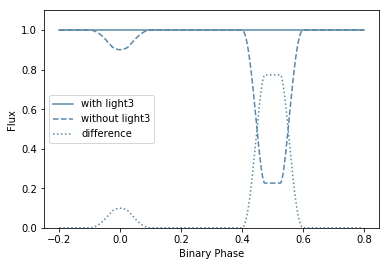


#######################################################

Number density per pixel Npx:  1.8549326090617502
foo foo  0.5457496227832264
a,r1,r2:  139.10920834899375 1.006403541947931e-07 1.006403541947931e-07
Crowding Lum, BinaryLum, LIGHT 3: 0.009618455786913241 0.0009932674653771968 9.68365130459659
Secondary 2D distance:  0.48038753840633225


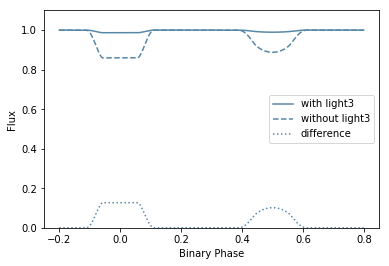


#######################################################

Number density per pixel Npx:  1.8549326090617502
foo foo  0.8769098297769713
a,r1,r2:  44.11630904852726 7.53344463856924e-05 3.1734295778461915e-07
Crowding Lum, BinaryLum, LIGHT 3: 1.8368117057522382 0.6986386460260694 2.6291298315663147
Secondary 2D distance:  3.301985394311188

#######################################################

Number density per pixel Npx:  1.5227469539708323
foo foo  0.20899373721411157
a,r1,r2:  196.40507389403268 7.128125420809385e-08 7.128125420809385e-08
Crowding Lum, BinaryLum, LIGHT 3: 0.4474083060193011 2.5139257350332e-10 1779719662.2969947
Secondary 2D distance:  0.9634438779589091

#######################################################

Number density per pixel Npx:  1.5227469539708323
foo foo  0.01197971921370827
a,r1,r2:  136.52669658604083 1.0254404706245144e-07 7.354192296450587e-05
Crowding Lum, BinaryLum, LIGHT 3: 4.4569908238050004 1.268782976802894e-06 3512807.868084595
Secondary 

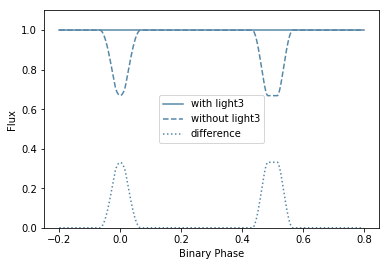


#######################################################

Number density per pixel Npx:  3.6164187456576062
foo foo  11.965327202512036
a,r1,r2:  23.486346076664695 0.00020606746264065738 0.0004258257237197377
Crowding Lum, BinaryLum, LIGHT 3: 0.3503637360473344 0.007149281949970426 49.006842714992345
Secondary 2D distance:  1.5361014161844786


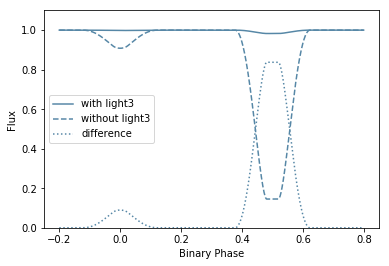


#######################################################

Number density per pixel Npx:  3.6164187456576062
foo foo  1.3584991912707753
a,r1,r2:  70.12198224398135 0.00015936951718419133 0.00011456108677444732
Crowding Lum, BinaryLum, LIGHT 3: 0.06080732742215476 0.013536214127010695 4.492196034400595
Secondary 2D distance:  0.37168836402576244


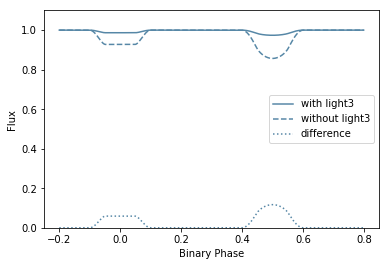


#######################################################

Number density per pixel Npx:  3.0804140034386833
foo foo  1.1952085970544206
a,r1,r2:  32.1841675302076 4.3499649282088154e-07 0.006332158663385176
Crowding Lum, BinaryLum, LIGHT 3: 91.94174754773874 149.2701233831067 0.6159420617062613
Secondary 2D distance:  4.181938894405602


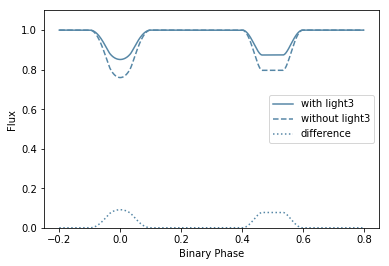


#######################################################

Number density per pixel Npx:  3.0804140034386833
foo foo  1.3408018607945351
a,r1,r2:  131.58548020659416 1.0639471754801117e-07 7.574707834431266e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.1802662456352716 1.1631047785053817e-06 154987.10775388454
Secondary 2D distance:  1.9246344749532147

#######################################################

Number density per pixel Npx:  1.9390041878474022
foo foo  0.2035586309447616
a,r1,r2:  189.34082918172808 7.39407346027987e-08 7.39407346027987e-08
Crowding Lum, BinaryLum, LIGHT 3: 11.02311111611495 0.00014338828786499198 76875.95186640223
Secondary 2D distance:  1.3084473079498216

#######################################################

Number density per pixel Npx:  1.9390041878474022
foo foo  0.1011954852683026
a,r1,r2:  156.12799545272466 8.967001695886873e-08 8.967001695886873e-08
Crowding Lum, BinaryLum, LIGHT 3: 115.5368751387699 2.512618623720689e-10 459826549274.24976
Seconda

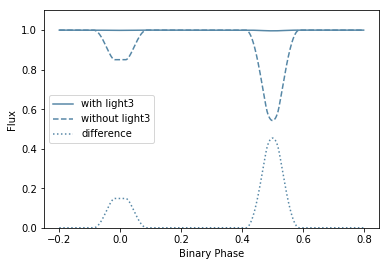


#######################################################

Number density per pixel Npx:  5.415159248810139
foo foo  2.7711450713973327
a,r1,r2:  60.925648459858856 2.297882805338373e-07 2.297882805338373e-07
Crowding Lum, BinaryLum, LIGHT 3: 2.838309969012896 0.00047398765063749835 5988.151727572352
Secondary 2D distance:  1.467864594910837


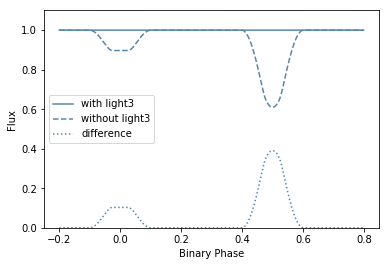


#######################################################

Number density per pixel Npx:  5.415159248810139
foo foo  3.3181266171134256
a,r1,r2:  86.51414726104227 0.025615027054934247 0.00013054753351196741
Crowding Lum, BinaryLum, LIGHT 3: 17.136022164684015 8.26533476766306 2.073239940834127
Secondary 2D distance:  3.7856737213505456


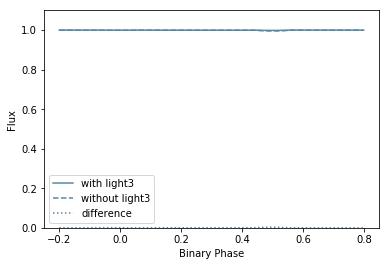


#######################################################

Number density per pixel Npx:  1.6124202661907732
foo foo  2.077544793203722
a,r1,r2:  116.5023732048917 1.2016922586957368e-07 3.7330956578132084e-05
Crowding Lum, BinaryLum, LIGHT 3: 1.3704725318871402 0.00020807585831318596 6586.408163816725
Secondary 2D distance:  1.637395760348518

#######################################################

Number density per pixel Npx:  1.6124202661907732
foo foo  1.617922918231897
a,r1,r2:  74.22596819967711 0.02533295405225121 0.00014992615574244012
Crowding Lum, BinaryLum, LIGHT 3: 0.051522712118043205 26.816431456888324 0.0019213112751737364
Secondary 2D distance:  2.3893780577525088

#######################################################

Number density per pixel Npx:  1.6084954846015889
foo foo  29.173325206392583
a,r1,r2:  50.9484765153992 0.0014044955644266029 2.747874118624233e-07
Crowding Lum, BinaryLum, LIGHT 3: 0.054675526609458756 8.686545020025221e-09 6294277.699984798
Secondar

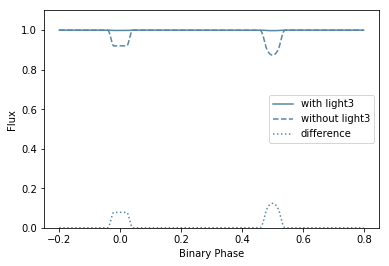


#######################################################

Number density per pixel Npx:  5.970704804604167
foo foo  21.326556143138845
a,r1,r2:  103.54368895436048 8.457290013534337e-05 7.087047710332484e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.9484718674812419 0.0027332195077988913 347.01635370847424
Secondary 2D distance:  1.673873424452278


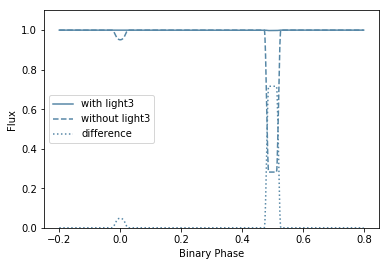


#######################################################

Number density per pixel Npx:  5.970704804604167
foo foo  0.16001695887250753
a,r1,r2:  184.29254083648442 7.596617821022748e-08 7.596617821022748e-08
Crowding Lum, BinaryLum, LIGHT 3: 0.9324934914144146 5.731964448489464e-05 16268.305565994102
Secondary 2D distance:  5.792967323903252


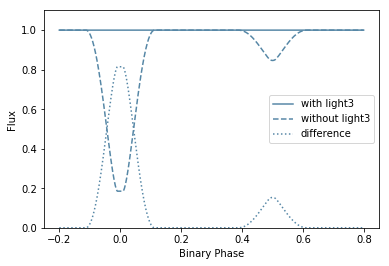


#######################################################

Number density per pixel Npx:  3.5159483671404703
foo foo  3.7893663842417182
a,r1,r2:  86.13866047927857 1.6252864767229373e-07 2.943584872159675e-05
Crowding Lum, BinaryLum, LIGHT 3: 30.367307005046523 0.07776961537106448 390.477783131035
Secondary 2D distance:  2.0308094251186244

#######################################################

Number density per pixel Npx:  3.5159483671404703
foo foo  2.576783084837352
a,r1,r2:  32.20564779693598 0.0003845072663164044 0.00045737345703702564
Crowding Lum, BinaryLum, LIGHT 3: 0.3170607109217626 0.001300746483143523 243.75288730784786
Secondary 2D distance:  4.323637766840218

#######################################################

Number density per pixel Npx:  1.835381979057536
foo foo  2.48070497388231
a,r1,r2:  120.00687598153591 1.1665998206764436e-07 1.1665998206764436e-07
Crowding Lum, BinaryLum, LIGHT 3: 2.2352913468979154 0.0005137565693315448 4350.8764273443385
Secondary 2D 

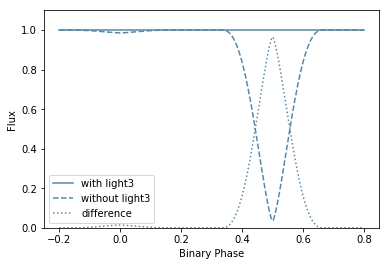


#######################################################

Number density per pixel Npx:  4.576553895536612
foo foo  1.0573458966273226
a,r1,r2:  115.46583518105172 1.212479862813779e-07 8.913693979927515e-05
Crowding Lum, BinaryLum, LIGHT 3: 107.31376140816124 1.128788470062276e-06 95069859.63653639
Secondary 2D distance:  5.009775635048786

#######################################################

Number density per pixel Npx:  5.325956411940976
foo foo  88.52471352101394
a,r1,r2:  139.272409523398 7.325279684897315e-05 1.0052242255238626e-07
Crowding Lum, BinaryLum, LIGHT 3: 0.7931784874248331 1.252953734490015e-06 633046.9079512162
Secondary 2D distance:  4.935479143103198

#######################################################

Number density per pixel Npx:  5.325956411940976
foo foo  55.482811168803394
a,r1,r2:  125.57085889497324 8.280926079637888e-05 4.594923887308216e-05
Crowding Lum, BinaryLum, LIGHT 3: 5.726406855005235 2.9287585742555216e-06 1955233.4922180688
Secondary 2D d

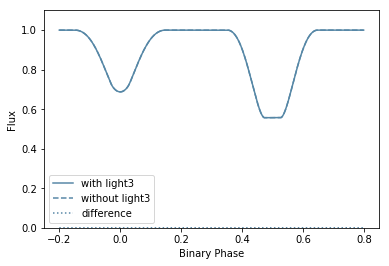


#######################################################

Number density per pixel Npx:  2.5539652230179515
foo foo  79.72722911415721
a,r1,r2:  208.50304361467295 4.445011944468097e-05 6.714530280849474e-08
Crowding Lum, BinaryLum, LIGHT 3: 0.024568173180612902 1.3631212218341218e-06 18023.46907016506
Secondary 2D distance:  0.793046658544319

#######################################################

Number density per pixel Npx:  2.5539652230179515
foo foo  0.0039934461278849104
a,r1,r2:  177.13891993916616 7.903401468637125e-08 0.006548669334975325
Crowding Lum, BinaryLum, LIGHT 3: 10.133089187202234 16.461189091160684 0.6155745572865992
Secondary 2D distance:  1.7489452851123635


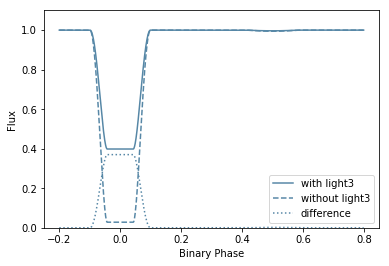


#######################################################

Number density per pixel Npx:  3.4778409539719983
foo foo  1.3823337024500908
a,r1,r2:  89.54112229488254 9.396517301324133e-05 8.042035152953806e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.18361011228624213 0.025430428986364974 7.220094965157227
Secondary 2D distance:  5.585846962260343


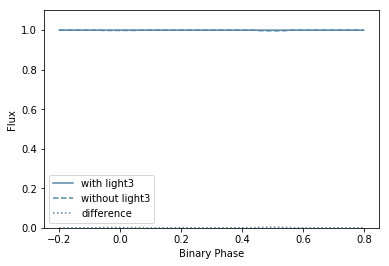


#######################################################

Number density per pixel Npx:  3.4778409539719983
foo foo  13.202232630189453
a,r1,r2:  167.40210388405157 5.6104690138153965e-05 3.871468945210366e-05
Crowding Lum, BinaryLum, LIGHT 3: 277.47240433015685 0.004596922400920233 60360.471665697725
Secondary 2D distance:  3.9486194247350253

#######################################################

Number density per pixel Npx:  1.606840211276797
foo foo  23.338999716608775
a,r1,r2:  169.31332775427904 6.276513091335339e-05 8.268693425196811e-08
Crowding Lum, BinaryLum, LIGHT 3: 0.010273241511804287 1.1161597930094014e-06 9204.0956645692
Secondary 2D distance:  6.244760961582296


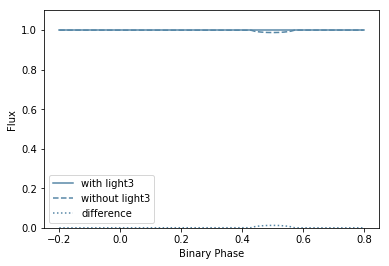


#######################################################

Number density per pixel Npx:  1.606840211276797
foo foo  5.8311995262661735
a,r1,r2:  156.03427919941225 8.9723873957901e-08 8.9723873957901e-08
Crowding Lum, BinaryLum, LIGHT 3: 0.005560943382356364 0.00010519266992714244 52.86436199602056
Secondary 2D distance:  1.4389524277359442

#######################################################

Number density per pixel Npx:  2.4179709067073336
foo foo  0.019161951191754498
a,r1,r2:  82.95201331622853 0.00012721841725429772 0.00013103302663700032
Crowding Lum, BinaryLum, LIGHT 3: 5.4908181137208105 2.4581660383377547e-06 2233705.1395575283
Secondary 2D distance:  6.944466441771985

#######################################################

Number density per pixel Npx:  2.4179709067073336
foo foo  5.648866666245532
a,r1,r2:  178.49446644221914 4.565121982792828e-05 4.448960965065719e-05
Crowding Lum, BinaryLum, LIGHT 3: 4.988048411747815 2.8747470763884873e-06 1735126.0055942887
Second

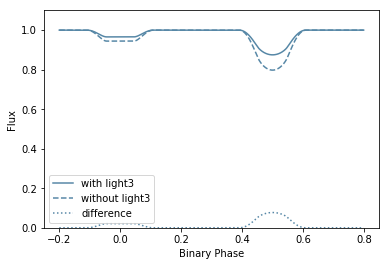


#######################################################

Number density per pixel Npx:  4.803323633233522
foo foo  133.7821801502791
a,r1,r2:  132.95781633637844 8.739354468527548e-05 3.912980860881459e-05
Crowding Lum, BinaryLum, LIGHT 3: 73.30878858654538 2.9828080470383665e-06 24577105.677093018
Secondary 2D distance:  2.8597901714907517

#######################################################

Number density per pixel Npx:  4.803323633233522
foo foo  0.39698092121125955
a,r1,r2:  208.13820834412607 6.726299852093014e-08 6.726299852093014e-08
Crowding Lum, BinaryLum, LIGHT 3: 6.608831314701508 2.5345767392242164e-10 26074694099.51399
Secondary 2D distance:  0.3807294880627308

#######################################################

Number density per pixel Npx:  4.848189387739608
foo foo  0.5844903242845312
a,r1,r2:  103.12144710500527 1.3576225308149766e-07 0.0007129039404999498
Crowding Lum, BinaryLum, LIGHT 3: 3.1349912518136014 3.3280742440268194e-08 94198356.82573006
Secondar

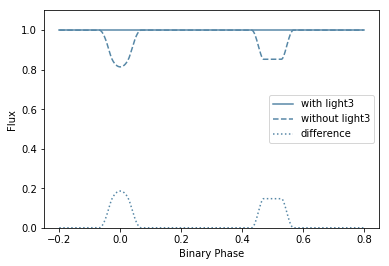


#######################################################

Number density per pixel Npx:  3.593015758490595
foo foo  19.78676462862805
a,r1,r2:  83.49652758449096 0.013044501893678891 0.00013378905945967751
Crowding Lum, BinaryLum, LIGHT 3: 26.88646912609245 3.2630281332262676 8.239729486950171
Secondary 2D distance:  0.8397465008559755

#######################################################

Number density per pixel Npx:  3.593015758490595
foo foo  0.19326751294454772
a,r1,r2:  63.27732882643605 0.0001614288878324756 0.0001744804385375863
Crowding Lum, BinaryLum, LIGHT 3: 1.5817221899502087 4.837787657489125e-05 32695.15534650695
Secondary 2D distance:  1.942353478196933


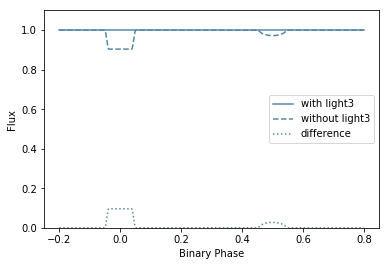


#######################################################

Number density per pixel Npx:  2.990752728423416
foo foo  27.81616134998539
a,r1,r2:  167.36566876194928 0.00015637052333206293 5.064341253451982e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.12200987907053944 0.01279952199828553 9.53237777839535
Secondary 2D distance:  0.8016222533257318

#######################################################

Number density per pixel Npx:  2.990752728423416
foo foo  5.59360843639978
a,r1,r2:  31.782499694109468 4.4049398677709243e-07 8.646878787814894e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.6554283910215052 0.06172391894679374 10.618709929719255
Secondary 2D distance:  2.575578823927678

#######################################################

Number density per pixel Npx:  2.775137447951555
foo foo  0.6752496593393029
a,r1,r2:  83.18109620854328 1.6830747174695327e-07 0.0008761647844450321
Crowding Lum, BinaryLum, LIGHT 3: 37.07454630110856 3.6163425643659944e-08 1025194534.0141844
Secondary 2D di

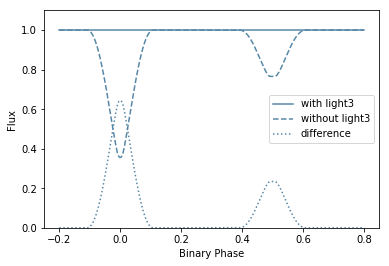


#######################################################

Number density per pixel Npx:  2.0770027786134455
foo foo  0.03530326062343403
a,r1,r2:  145.64447261345873 7.984906796670826e-05 0.008054243240163331
Crowding Lum, BinaryLum, LIGHT 3: 14.633582914342536 11.45578539923429 1.2773967392336671
Secondary 2D distance:  1.3708658907840081


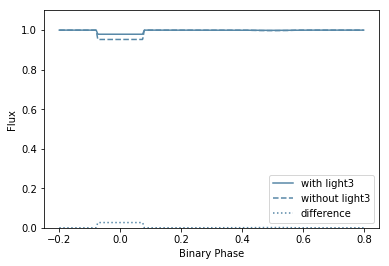


#######################################################

Number density per pixel Npx:  2.0770027786134455
foo foo  7.005532259187046
a,r1,r2:  123.48298294382641 4.4217338027776106e-05 1.1337594595012928e-07
Crowding Lum, BinaryLum, LIGHT 3: 0.15417040716718614 1.611759556868635e-06 95653.47790877201
Secondary 2D distance:  2.6827216504318168

#######################################################

Number density per pixel Npx:  5.108211010703191
foo foo  0.012247321097557575
a,r1,r2:  147.47957692444197 5.391360554321781e-05 0.007499518919025833
Crowding Lum, BinaryLum, LIGHT 3: 0.34993482038557766 4.9471022973891365 0.07073531116796551
Secondary 2D distance:  1.0738493469533061


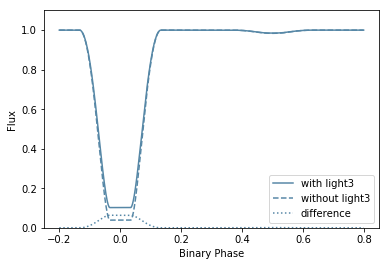


#######################################################

Number density per pixel Npx:  5.108211010703191
foo foo  4.767597486514204
a,r1,r2:  117.89916858763438 8.048405952116999e-05 4.684332792710906e-05
Crowding Lum, BinaryLum, LIGHT 3: 40.3361445993113 2.9230061190719873e-06 13799541.62125307
Secondary 2D distance:  2.892011821419548

#######################################################

Number density per pixel Npx:  1.0322060887290263
foo foo  50.816928168809056
a,r1,r2:  130.36745785023254 7.901313283341905e-05 3.594870684354208e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.5009413133030342 3.022132517325734e-06 165757.56040847406
Secondary 2D distance:  2.9432122465681507


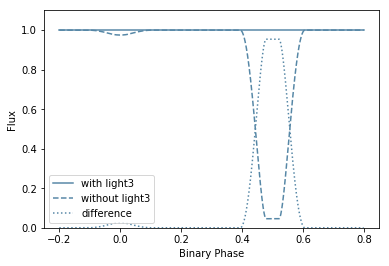


#######################################################

Number density per pixel Npx:  1.0322060887290263
foo foo  3.529038161530527
a,r1,r2:  146.3032296873437 9.56916674356308e-08 9.56916674356308e-08
Crowding Lum, BinaryLum, LIGHT 3: 0.7183289745094974 2.522285809994097e-10 2847928540.3075657
Secondary 2D distance:  2.172392697527378

#######################################################

Number density per pixel Npx:  1.7269803242226411
foo foo  6.776026196042702
a,r1,r2:  195.40327897829596 7.164669944742853e-08 7.164669944742853e-08
Crowding Lum, BinaryLum, LIGHT 3: 25.85224870579485 2.516392397009803e-10 102735363278.45668
Secondary 2D distance:  1.4553935830474016

#######################################################

Number density per pixel Npx:  1.7269803242226411
foo foo  3.3687086855193713
a,r1,r2:  169.07500892671425 0.014397397743458629 5.857172800054599e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.07827202647728566 207.81929238757135 0.00037663503507322465
Secondary 2

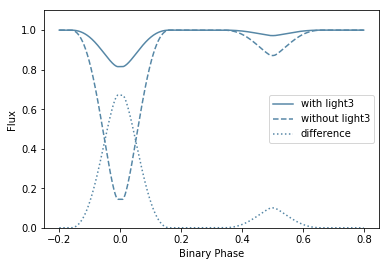


#######################################################

Number density per pixel Npx:  3.782626454769754
foo foo  0.2925023947990132
a,r1,r2:  107.16082803279608 6.972360095563197e-05 8.768329792427606e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.25108135307480833 2.729974638033668e-06 91972.0460317741
Secondary 2D distance:  8.90652515017558


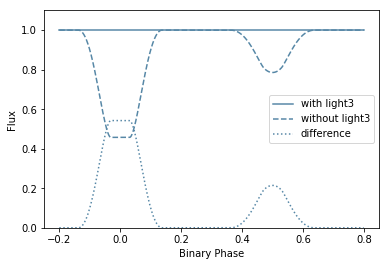


#######################################################

Number density per pixel Npx:  2.2885433516135856
foo foo  0.06713238729726759
a,r1,r2:  89.98381200431511 0.00011095120709418122 0.00011144714425606348
Crowding Lum, BinaryLum, LIGHT 3: 163.35799308566877 0.0018177112715880063 89870.15464945343
Secondary 2D distance:  2.741584288664329

#######################################################

Number density per pixel Npx:  2.2885433516135856
foo foo  0.012163352306644202
a,r1,r2:  177.95695994043396 7.86707078199476e-08 5.274067400329793e-05
Crowding Lum, BinaryLum, LIGHT 3: 6.09859384941964 1.360499332801414e-06 4482614.362523781
Secondary 2D distance:  1.5890731843783232

#######################################################

Number density per pixel Npx:  4.722924192510129
foo foo  0.050205721623046366
a,r1,r2:  64.33885210608659 6.593100375148819e-05 0.00016108142208142026
Crowding Lum, BinaryLum, LIGHT 3: 123.48414581790983 0.00023912046865876048 516409.76830858114
Secon

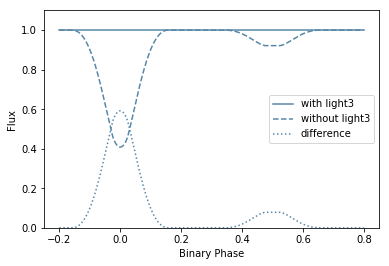


#######################################################

Number density per pixel Npx:  4.343321882329357
foo foo  1171.6939797249122
a,r1,r2:  158.5811350813467 0.0069225171778787295 8.828288429653677e-08
Crowding Lum, BinaryLum, LIGHT 3: 107.86544871639236 4.760395581653677 22.65892547503832
Secondary 2D distance:  2.24039205094897

#######################################################

Number density per pixel Npx:  1.8969177789006353
foo foo  2.684036165465228
a,r1,r2:  157.7048098799521 8.877344965354618e-08 8.877344965354618e-08
Crowding Lum, BinaryLum, LIGHT 3: 0.6526731621982744 0.00010093884459424456 6466.025689335949
Secondary 2D distance:  1.303666165689687

#######################################################

Number density per pixel Npx:  1.8969177789006353
foo foo  0.1654048587408985
a,r1,r2:  27.694251560304803 0.0003384521882376264 5.055200704563079e-07
Crowding Lum, BinaryLum, LIGHT 3: 0.12456882544844763 0.022946386053476465 5.428690389769459
Secondary 2D dista

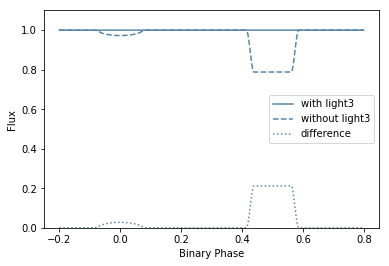


#######################################################

Number density per pixel Npx:  3.0065481015443942
foo foo  0.0304537682823876
a,r1,r2:  196.49758148172444 7.124769625371746e-08 4.6072056527237307e-05
Crowding Lum, BinaryLum, LIGHT 3: 6.047992215653176 1.3071893436549269e-06 4626714.748716411
Secondary 2D distance:  1.8235796609569512


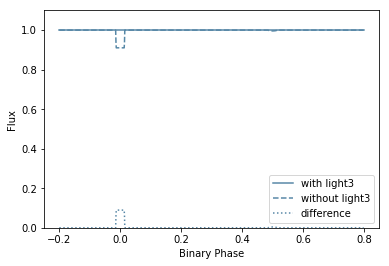


#######################################################

Number density per pixel Npx:  2.492344896675979
foo foo  0.4643647556870358
a,r1,r2:  139.95991530303553 2.3298945929632122e-05 1.0002864012662317e-07
Crowding Lum, BinaryLum, LIGHT 3: 0.9781737947543551 0.019741498949212354 49.549114647820716
Secondary 2D distance:  7.571114547916334

#######################################################

Number density per pixel Npx:  2.492344896675979
foo foo  4.819974462109246
a,r1,r2:  159.3855285415817 6.0129298024655755e-05 3.089873103253819e-05
Crowding Lum, BinaryLum, LIGHT 3: 118.82856358597247 0.019427726386331647 6116.442100480382
Secondary 2D distance:  3.1384537974999533

#######################################################

Number density per pixel Npx:  4.831931595449065
foo foo  2.4708870795811415
a,r1,r2:  194.09870840549235 1.7648216040952866e-05 2.2093994014854023e-05
Crowding Lum, BinaryLum, LIGHT 3: 15.530865918894202 3.59887533460345e-06 4315477.607563615
Secondary 2

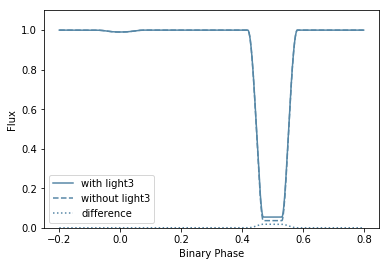


#######################################################

Number density per pixel Npx:  2.201564010459356
foo foo  16.17580492719809
a,r1,r2:  156.34439871841755 5.902171280716745e-05 3.216219764214469e-05
Crowding Lum, BinaryLum, LIGHT 3: 4.015475293982147 3.0323288495498647e-06 1324221.5779394198
Secondary 2D distance:  3.5626431464823956

#######################################################

Number density per pixel Npx:  3.3049944781692506
foo foo  1.3545363318213146
a,r1,r2:  153.81916391371215 5.744902926613094e-05 0.1217111762002719
Crowding Lum, BinaryLum, LIGHT 3: 3.9872286713530323 8945.141115468938 0.00044574240024652836
Secondary 2D distance:  0.8655893278743148

#######################################################

Number density per pixel Npx:  3.3049944781692506
foo foo  6.925171989557198
a,r1,r2:  156.03530098196828 8.97232864095149e-08 8.97232864095149e-08
Crowding Lum, BinaryLum, LIGHT 3: 4.320774391741644 6.514169671578777e-05 66328.85862020323
Secondary 2D di

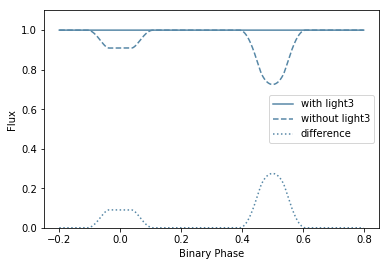


#######################################################

Number density per pixel Npx:  2.632499360246309
foo foo  0.883624232602713
a,r1,r2:  80.87901371852718 1.7309805543280236e-07 1.7309805543280236e-07
Crowding Lum, BinaryLum, LIGHT 3: 2.0549592324636548 0.005417389726206034 379.3264535728365
Secondary 2D distance:  0.4546122665366232

#######################################################

Number density per pixel Npx:  2.632499360246309
foo foo  0.8746649564581962
a,r1,r2:  86.04602536401289 0.00012173984015613217 3.813332153417332e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.06903775634319582 2.9500641848669565e-06 23402.120095332546
Secondary 2D distance:  2.4229305346051886

#######################################################

Number density per pixel Npx:  3.268111757195085
foo foo  1.3364966906260962
a,r1,r2:  205.38154089283492 6.816581441126199e-08 1.3267953193828144e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.04921646695234105 1.9094146803828464e-06 25775.68270422689
Second

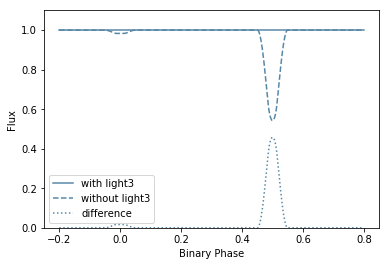


#######################################################

Number density per pixel Npx:  5.2137959425682325
foo foo  211.57392645565903
a,r1,r2:  10.344820691834789 1.3533342352710144e-06 0.5096739905057551
Crowding Lum, BinaryLum, LIGHT 3: 0.3631099808693494 4366.790835706071 8.31525929523111e-05
Secondary 2D distance:  1.2573207305745038

#######################################################

Number density per pixel Npx:  3.371800303560588
foo foo  0.6378832138243061
a,r1,r2:  83.04524931515108 1.6858279209772675e-07 1.6858279209772675e-07
Crowding Lum, BinaryLum, LIGHT 3: 1.1333715808933387 0.0015318403608900967 739.8757793761079
Secondary 2D distance:  1.9611985863622425

#######################################################

Number density per pixel Npx:  3.371800303560588
foo foo  0.8124970152845212
a,r1,r2:  111.35703010609727 9.298974648282565e-05 7.093932979230358e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.1889706523222049 5.196938912349028e-05 3636.1915256146376
Secondary 2

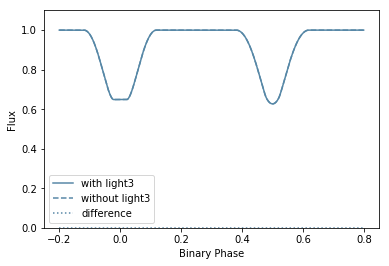


#######################################################

Number density per pixel Npx:  2.824991139006654
foo foo  6.214597525284629
a,r1,r2:  111.87469593171876 8.150078894127352e-05 8.709320827437744e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.05172101544440509 2.5581472570696586e-06 20218.15409627794
Secondary 2D distance:  0.9569012536256838

#######################################################

Number density per pixel Npx:  2.41832531552703
foo foo  0.003053764215693861
a,r1,r2:  115.54907073888016 1.21160645520356e-07 0.009576227893752003
Crowding Lum, BinaryLum, LIGHT 3: 34.58949296517237 7.611018242145613 4.544660367995818
Secondary 2D distance:  6.060731211844443

#######################################################

Number density per pixel Npx:  2.41832531552703
foo foo  3.1248392278233674
a,r1,r2:  123.45711070572595 1.1339970553312713e-07 1.1339970553312713e-07
Crowding Lum, BinaryLum, LIGHT 3: 2.2342150433907952 0.0003407712395979459 6556.348610953208
Secondary 2D dis

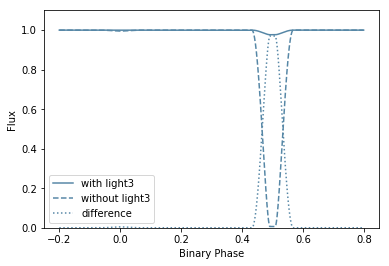


#######################################################

Number density per pixel Npx:  3.4803030740771552
foo foo  9.741786451596777
a,r1,r2:  83.4346107298051 0.014411269269956825 0.00011669588364788575
Crowding Lum, BinaryLum, LIGHT 3: 0.04837636926966233 14.80667505115497 0.0032672000366408263
Secondary 2D distance:  2.9163888373999836

#######################################################

Number density per pixel Npx:  2.1165231204292487
foo foo  0.005560482440624425
a,r1,r2:  161.72201857968903 1.5891984733316568e-05 0.0068211040086022055
Crowding Lum, BinaryLum, LIGHT 3: 2.279771803654646 5.174074399552259 0.440614422523945
Secondary 2D distance:  2.4670237528092436


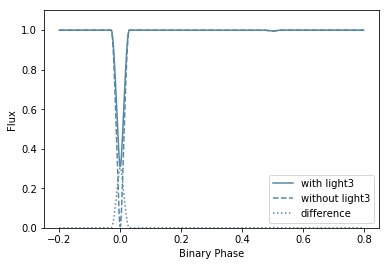


#######################################################

Number density per pixel Npx:  2.1165231204292487
foo foo  0.006672377063772885
a,r1,r2:  29.779762736536025 0.00023702359191969568 0.0021700274659734926
Crowding Lum, BinaryLum, LIGHT 3: 4.123770611047672 1.5713935344826114e-06 2624276.1730628116
Secondary 2D distance:  1.4109303868998888

#######################################################

Number density per pixel Npx:  3.738409753333517
foo foo  1.4726049851727212
a,r1,r2:  68.07550742110536 0.001063590312200104 2.0565399407745876e-07
Crowding Lum, BinaryLum, LIGHT 3: 0.8117700431158934 3.008994865259944e-08 26978113.27257833
Secondary 2D distance:  3.052575195819272

#######################################################

Number density per pixel Npx:  3.738409753333517
foo foo  1.9127472436934854
a,r1,r2:  207.38417272808147 6.75075624905887e-08 1.8602404793384785e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.7632221080181053 1.8347965184275075e-06 415970.98117028066
Second

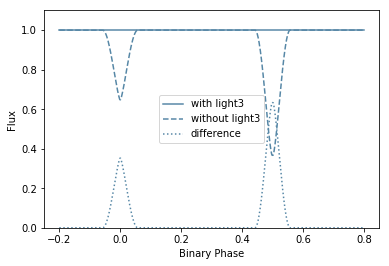


#######################################################

Number density per pixel Npx:  2.6559622321338563
foo foo  1.9180689478788304
a,r1,r2:  160.329138185904 8.732037206965334e-08 8.732037206965334e-08
Crowding Lum, BinaryLum, LIGHT 3: 7.005069447781713 0.0009100090231401312 7697.802186191082
Secondary 2D distance:  2.0389664576915667

#######################################################

Number density per pixel Npx:  2.6559622321338563
foo foo  0.002757343465304991
a,r1,r2:  156.51651861385923 8.944742781136921e-08 0.007040636961717102
Crowding Lum, BinaryLum, LIGHT 3: 0.20814613713353147 5.574974111629178 0.037335803353659845
Secondary 2D distance:  3.7925282281869523


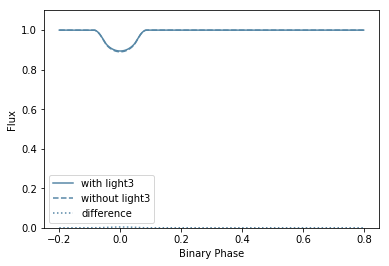


#######################################################

Number density per pixel Npx:  4.648110621399585
foo foo  0.28493956672268655
a,r1,r2:  181.92619989491686 2.4117107886193665e-05 3.561322670099552e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.064788169390265 3.3103597857852332e-06 19571.337734486442
Secondary 2D distance:  2.9655035206977174


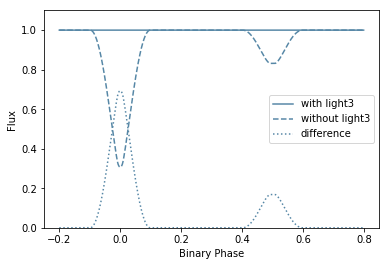


#######################################################

Number density per pixel Npx:  4.648110621399585
foo foo  0.020178836222974415
a,r1,r2:  155.5505910976263 3.1330752983510775e-05 0.00720962332367936
Crowding Lum, BinaryLum, LIGHT 3: 94.94814114528346 8.525994289783718 11.136313011498867
Secondary 2D distance:  8.714120254957361

#######################################################

Number density per pixel Npx:  1.7559614469906666
foo foo  0.2851057632308694
a,r1,r2:  137.38450031323163 5.069430204423298e-05 6.8506175606586e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.0033106197375363487 2.7893651309622026e-06 1186.872131148473
Secondary 2D distance:  1.0351671932623434

#######################################################

Number density per pixel Npx:  1.7559614469906666
foo foo  6.136497067751533
a,r1,r2:  144.92470543979223 5.057631760013986e-05 5.466634785166504e-05
Crowding Lum, BinaryLum, LIGHT 3: 1.0836473760228007 2.9565795915072855e-06 366520.6169776574
Secondary 2D

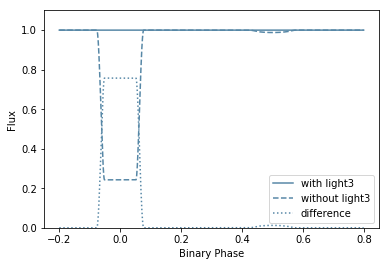


#######################################################

Number density per pixel Npx:  3.2408140555213882
foo foo  0.23080241590194356
a,r1,r2:  31.79131804902573 0.0003166075697664217 5.2044369067044326e-05
Crowding Lum, BinaryLum, LIGHT 3: 1.5523155560984379 0.06211241627757276 24.99203298035179
Secondary 2D distance:  4.453498740810122

#######################################################

Number density per pixel Npx:  2.9592158559967183
foo foo  1560.7369099096202
a,r1,r2:  128.19515924970563 0.008022807732952483 1.0920849181777625e-07
Crowding Lum, BinaryLum, LIGHT 3: 0.028432513266235547 2.2523472828585724 0.012623503259297718
Secondary 2D distance:  1.5418397956207148


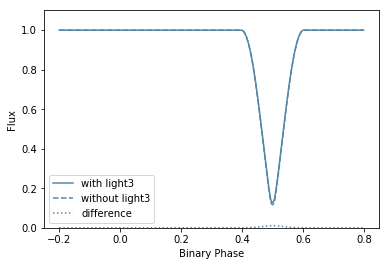


#######################################################

Number density per pixel Npx:  2.9592158559967183
foo foo  17.777456404276172
a,r1,r2:  106.61291528730095 8.877638328161797e-05 5.4563966761942974e-05
Crowding Lum, BinaryLum, LIGHT 3: 63.59876821666988 0.00476946404227623 13334.573371962633
Secondary 2D distance:  0.8983440602578139

#######################################################

Number density per pixel Npx:  1.5937030031032187
foo foo  7.8946024788592934
a,r1,r2:  183.6713386607466 4.461805809154379e-05 3.911753458943956e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.3564595985809895 2.935442119486735e-06 121433.01897000676
Secondary 2D distance:  0.3511425733682704

#######################################################

Number density per pixel Npx:  1.5937030031032187
foo foo  16.51000235663112
a,r1,r2:  138.96522363748858 1.007446297249237e-07 1.007446297249237e-07
Crowding Lum, BinaryLum, LIGHT 3: 1.7942535698614654 8.889093489129459e-06 201848.88054734402
Secondary

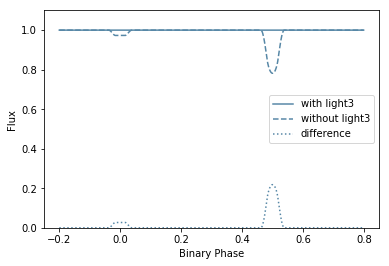


#######################################################

Number density per pixel Npx:  1.1440266560884431
foo foo  0.8442482076691339
a,r1,r2:  213.66746069991333 6.552237740898879e-08 6.552237740898879e-08
Crowding Lum, BinaryLum, LIGHT 3: 1.490235021321357 2.721192717570885e-10 5476403827.258654
Secondary 2D distance:  1.6483652793536199


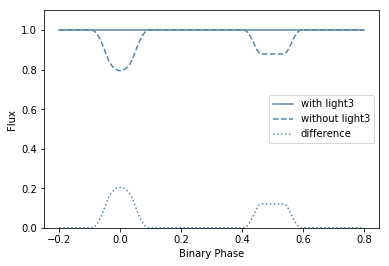


#######################################################

Number density per pixel Npx:  1.5023512352917145
foo foo  1.7011761206653113
a,r1,r2:  133.8018204243888 1.0463235818163906e-07 1.0463235818163906e-07
Crowding Lum, BinaryLum, LIGHT 3: 0.06932844749366723 0.0013704754429596261 50.58715050300221
Secondary 2D distance:  0.9015197151365555

#######################################################

Number density per pixel Npx:  1.5023512352917145
foo foo  103.93620753152885
a,r1,r2:  22.055474155148634 0.0031663524113045645 0.0003910999113780685
Crowding Lum, BinaryLum, LIGHT 3: 0.04746973968417356 1.418383249883396e-06 33467.49877938562
Secondary 2D distance:  0.40008165893164044

#######################################################

Number density per pixel Npx:  1.6723913003847732
foo foo  64.56508101153561
a,r1,r2:  136.69540231363192 7.504800564290225e-05 1.024174900036404e-07
Crowding Lum, BinaryLum, LIGHT 3: 2.3176888834792675 1.2318510321670434e-06 1881468.475455221
Seco

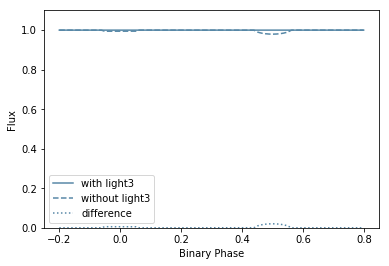


#######################################################

Number density per pixel Npx:  3.7928934704735915
foo foo  1.0576616895892326
a,r1,r2:  216.88567015525783 6.455013828243279e-08 6.455013828243279e-08
Crowding Lum, BinaryLum, LIGHT 3: 142.1207743080961 2.678744979071028e-10 530549848598.8117
Secondary 2D distance:  3.2284083305709963


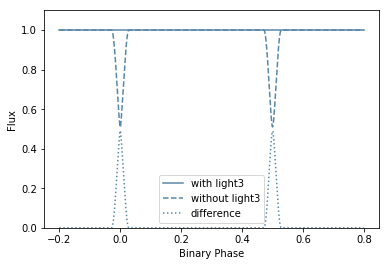


#######################################################

Number density per pixel Npx:  6.158868844873256
foo foo  1196.7710292837246
a,r1,r2:  149.7516263822004 0.0071751651106722065 9.34881332391596e-08
Crowding Lum, BinaryLum, LIGHT 3: 6.3310600084591595 3.1414877088128765 2.0153063119421137
Secondary 2D distance:  3.3839211323908334

#######################################################

Number density per pixel Npx:  6.158868844873256
foo foo  0.04491008394425894
a,r1,r2:  22.61968521450172 0.00043562692657960465 0.00024410531505778292
Crowding Lum, BinaryLum, LIGHT 3: 4.114343899926302 0.0040513030434733525 1015.560637102798
Secondary 2D distance:  5.971232532193608

#######################################################

Number density per pixel Npx:  1.7464263224192993
foo foo  3.1177248621301805
a,r1,r2:  54.04061003016326 2.5906443306590677e-07 2.5906443306590677e-07
Crowding Lum, BinaryLum, LIGHT 3: 0.08956947479837532 0.00037329905534291846 239.94026643355787
Secondary 

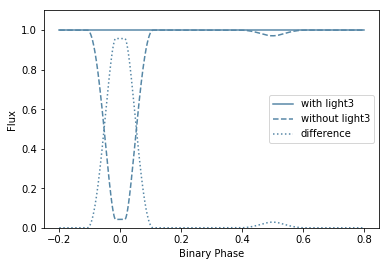


#######################################################

Number density per pixel Npx:  2.820312682589362
foo foo  6.469353930590578
a,r1,r2:  48.61349257928578 2.8798589151287194e-07 0.00014680210722219593
Crowding Lum, BinaryLum, LIGHT 3: 0.7831153014667714 0.028360331139025318 27.613052105345954
Secondary 2D distance:  14.542332475114229

#######################################################

Number density per pixel Npx:  2.820312682589362
foo foo  45.04192488742357
a,r1,r2:  191.89217779981993 5.01421265705885e-05 7.29576377761717e-08
Crowding Lum, BinaryLum, LIGHT 3: 18.406841031636773 1.2517728004841927e-06 14704618.141979843
Secondary 2D distance:  2.238003786413429


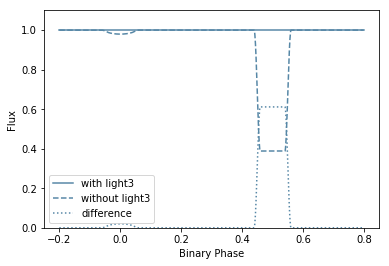


#######################################################

Number density per pixel Npx:  6.121516900664648
foo foo  0.019800147242224456
a,r1,r2:  33.5027410985221 3.6815209556928403 4.1787625552279297e-07
Crowding Lum, BinaryLum, LIGHT 3: 2.1333040930735625 34965.40309950868 6.101185468968722e-05
Secondary 2D distance:  1.0826015194555028

#######################################################

Number density per pixel Npx:  6.121516900664648
foo foo  0.5427430217361541
a,r1,r2:  203.60919205329725 6.87591746660206e-08 6.87591746660206e-08
Crowding Lum, BinaryLum, LIGHT 3: 42.04576324175762 2.6510327647762205e-10 158601446954.60522
Secondary 2D distance:  0.7823793868590085

#######################################################

Number density per pixel Npx:  3.6166351471405016
foo foo  0.00437850661020791
a,r1,r2:  96.96544486177817 1.4438133110157594e-07 0.01216911341868561
Crowding Lum, BinaryLum, LIGHT 3: 35.07319163851753 19.267135125443687 1.8203636093360225
Secondary 2D dist

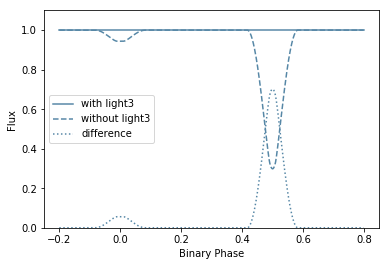


#######################################################

Number density per pixel Npx:  1.8103502388518529
foo foo  1.0724116703006423
a,r1,r2:  170.41369241093074 8.215302304606368e-08 5.7793392775764116e-05
Crowding Lum, BinaryLum, LIGHT 3: 1.7235332676359099 1.1806714309026577e-06 1459790.7788098324
Secondary 2D distance:  1.233431658959311

#######################################################

Number density per pixel Npx:  1.8103502388518529
foo foo  12.096355561190212
a,r1,r2:  128.57430923438707 7.224926071226702e-05 0.07143977592364732
Crowding Lum, BinaryLum, LIGHT 3: 0.020398745278431947 8561.786732412636 2.3825336832098083e-06
Secondary 2D distance:  1.1253218927361477

#######################################################

Number density per pixel Npx:  4.174098603062258
foo foo  38.19957687590693
a,r1,r2:  126.20306062823013 8.317040242183967e-05 7.084299234498434e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.5248736826027915 2.6152576587002876e-06 200696.73856289923
Secon

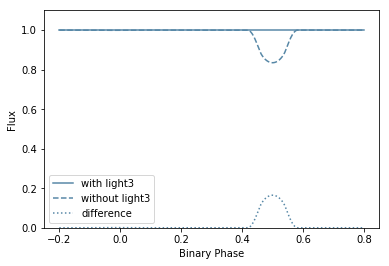


#######################################################

Number density per pixel Npx:  4.664243955027389
foo foo  0.06352328813966887
a,r1,r2:  170.6494773622905 3.127557085060803e-05 5.535896425704992e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.04253843885938872 0.004867506217650613 8.73926749289714
Secondary 2D distance:  4.10245698074845


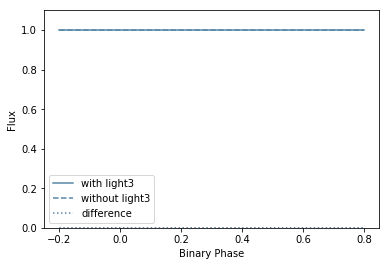


#######################################################

Number density per pixel Npx:  4.664243955027389
foo foo  116.28932519058841
a,r1,r2:  125.99824259588117 8.955581066144496e-05 4.522650218856962e-05
Crowding Lum, BinaryLum, LIGHT 3: 2.506056024347309 2.9380236796636525e-06 852973.3921798086
Secondary 2D distance:  3.9479434606600616

#######################################################

Number density per pixel Npx:  3.3968803551787614
foo foo  0.08554587637594246
a,r1,r2:  20.909743911742133 0.00021984593692960303 6.695443071465892e-07
Crowding Lum, BinaryLum, LIGHT 3: 0.5838257659068167 0.02670583668432552 21.86135460977645
Secondary 2D distance:  10.5592119831607

#######################################################

Number density per pixel Npx:  3.3968803551787614
foo foo  1.141906823352552
a,r1,r2:  25.355534845653953 0.0004277473167504639 0.0004973429151645102
Crowding Lum, BinaryLum, LIGHT 3: 17.40746226392827 0.009888071491750075 1760.4506883320835
Secondary 2D 

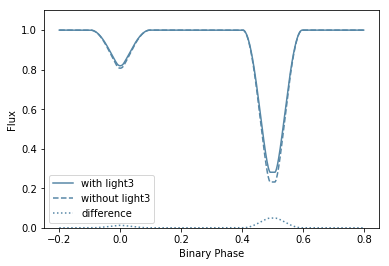


#######################################################

Number density per pixel Npx:  2.2236219918996243
foo foo  0.8331513105004295
a,r1,r2:  219.008607069954 6.392442830125042e-08 6.392442830125042e-08
Crowding Lum, BinaryLum, LIGHT 3: 0.4389615826629466 2.646354460981578e-10 1658740690.7694757
Secondary 2D distance:  1.975592198139094

#######################################################

Number density per pixel Npx:  2.2236219918996243
foo foo  52.49555880218345
a,r1,r2:  178.47149458496386 4.8028478187443284e-05 7.844389958495643e-08
Crowding Lum, BinaryLum, LIGHT 3: 0.30472714911444054 1.417629342925197e-06 214955.44701808548
Secondary 2D distance:  1.8776531257484552

#######################################################

Number density per pixel Npx:  1.1636809090109888
foo foo  1.463544233920929
a,r1,r2:  133.67893769385822 0.006446778328623104 1.0472854019876925e-07
Crowding Lum, BinaryLum, LIGHT 3: 0.019655861502189707 0.6634019207495413 0.02962888844214022
Secondar

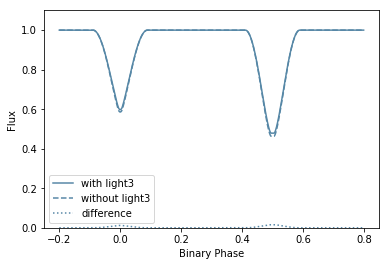


#######################################################

Number density per pixel Npx:  1.1636809090109888
foo foo  1.61914403737745
a,r1,r2:  124.00245080477617 1.1290099436857877e-07 0.002050949533606128
Crowding Lum, BinaryLum, LIGHT 3: 0.08358447950255707 1191.662218806379 7.014108375969068e-05
Secondary 2D distance:  1.0138343002406276


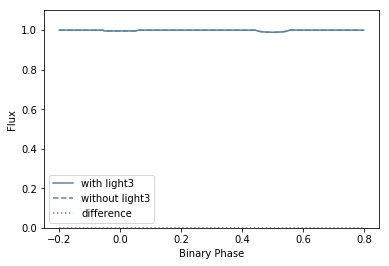


#######################################################

Number density per pixel Npx:  2.3822147587664086
foo foo  3.704299620923924
a,r1,r2:  116.14870871214042 1.2053513254888777e-07 1.2053513254888777e-07
Crowding Lum, BinaryLum, LIGHT 3: 10.917509051844988 0.00025071211094527775 43545.9978805249
Secondary 2D distance:  1.8361942757654497

#######################################################

Number density per pixel Npx:  2.3822147587664086
foo foo  0.9602463489413217
a,r1,r2:  110.85787595878324 8.522745626060553e-05 5.615683196661335e-05
Crowding Lum, BinaryLum, LIGHT 3: 30.510062375343388 0.5928237805153368 51.465651983159724
Secondary 2D distance:  9.044406909670965


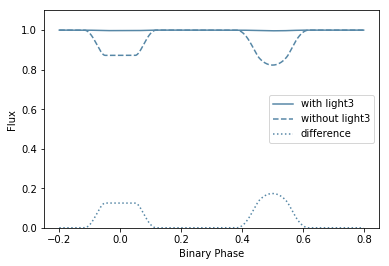


#######################################################

Number density per pixel Npx:  4.514221460795761
foo foo  26.23490656834241
a,r1,r2:  77.50775202718357 0.014154936508636685 0.0001316483578888403
Crowding Lum, BinaryLum, LIGHT 3: 1.9766742341525276 3.5801809745635818 0.5521157305165225
Secondary 2D distance:  3.2291062103774424

#######################################################

Number density per pixel Npx:  4.514221460795761
foo foo  0.0008783578033460756
a,r1,r2:  123.79909305508012 1.1308645042957774e-07 0.008587361560915779
Crowding Lum, BinaryLum, LIGHT 3: 5.58555725694447 2.841629604916396 1.965617632671308
Secondary 2D distance:  0.8742607620983306

#######################################################

Number density per pixel Npx:  3.5995569322881282
foo foo  157.42789074453108
a,r1,r2:  174.85182814476101 0.006655986827564853 8.00677931054247e-08
Crowding Lum, BinaryLum, LIGHT 3: 4.5936879593573305 16.639434471221563 0.2760723609508641
Secondary 2D distance:

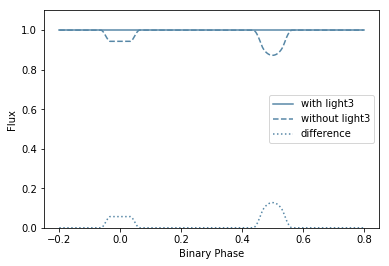


#######################################################

Number density per pixel Npx:  2.700504001960858
foo foo  1.1814486069570294
a,r1,r2:  85.00918139751963 3.8828555198989235e-05 0.0001232343103358354
Crowding Lum, BinaryLum, LIGHT 3: 0.03523657176322848 2.9480244430681686e-06 11952.605022011241
Secondary 2D distance:  5.419309545037976

#######################################################

Number density per pixel Npx:  2.700504001960858
foo foo  3.899633214786985
a,r1,r2:  110.698536176463 0.0006646207515440449 1.2646960369631983e-07
Crowding Lum, BinaryLum, LIGHT 3: 73.16941390630303 3.361713051828899e-08 2176551442.0243607
Secondary 2D distance:  3.896062073208749

#######################################################

Number density per pixel Npx:  1.4734278647074026
foo foo  177.93402608590756
a,r1,r2:  59.118473662170054 0.018793297409229796 2.3681260920236864e-07
Crowding Lum, BinaryLum, LIGHT 3: 0.007860182661473439 8.271298129411418 0.0009502961371352196
Secondary

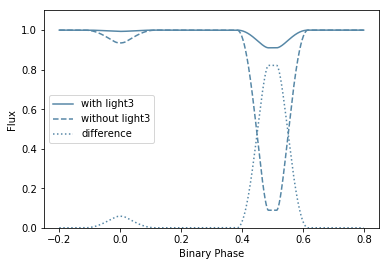


#######################################################

Number density per pixel Npx:  3.1553225741122657
foo foo  0.0841403950511466
a,r1,r2:  148.2915887648312 9.440859132072523e-08 6.34821311078567e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.060884088482646204 1.2234189639640102e-06 49765.52618195091
Secondary 2D distance:  4.2614056666430535

#######################################################

Number density per pixel Npx:  3.1553225741122657
foo foo  1.5584411880340716
a,r1,r2:  157.23763484029277 8.903720800824742e-08 8.903720800824742e-08
Crowding Lum, BinaryLum, LIGHT 3: 0.09805613820226267 0.0003685292806657961 266.0742126788718
Secondary 2D distance:  0.911951413106328

#######################################################

Number density per pixel Npx:  2.386477475014313
foo foo  30.57906829989689
a,r1,r2:  91.65814451571643 0.00011459981052114019 1.5274147293696796e-07
Crowding Lum, BinaryLum, LIGHT 3: 2515.660629516286 1.118186078978622e-06 2249769226.079215
Secondary

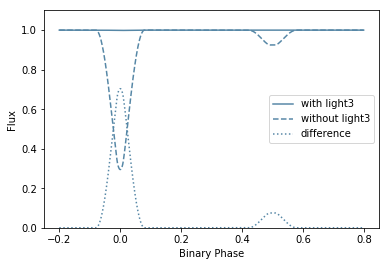


#######################################################

Number density per pixel Npx:  1.735241652464368
foo foo  0.014980203969097891
a,r1,r2:  58.75071807007855 0.0001552659199570402 0.00018305106603651905
Crowding Lum, BinaryLum, LIGHT 3: 0.04829722675698547 2.575553790111007e-06 18752.17164651174
Secondary 2D distance:  15.784562576095333

#######################################################

Number density per pixel Npx:  3.3842775510709533
foo foo  4.229830542927091
a,r1,r2:  95.17307200892026 9.109275804733293e-05 7.916433636474791e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.8601036913077974 0.018343323160528013 46.88919689092145
Secondary 2D distance:  1.703887622902985

#######################################################

Number density per pixel Npx:  3.3842775510709533
foo foo  7.0862811370059635
a,r1,r2:  185.1183314017387 7.56273022449494e-08 7.56273022449494e-08
Crowding Lum, BinaryLum, LIGHT 3: 0.6880487443539219 2.731836779986996e-10 2518630503.090295
Secondary 2D 

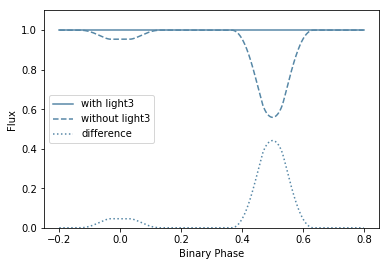


#######################################################

Number density per pixel Npx:  1.3195028231603017
foo foo  0.0011441393791865576
a,r1,r2:  117.32369741831678 1.193279815422378e-07 0.008420866689617633
Crowding Lum, BinaryLum, LIGHT 3: 0.0268457968374641 1.8039704398023888 0.014881505952173392
Secondary 2D distance:  5.321105195040368


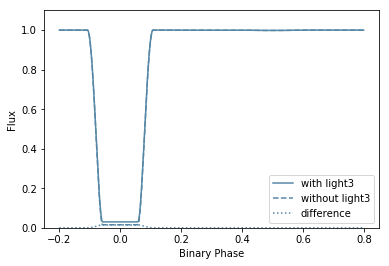


#######################################################

Number density per pixel Npx:  1.3195028231603017
foo foo  0.9732270717675511
a,r1,r2:  111.09125045206378 0.020834111268075235 0.005085153951510874
Crowding Lum, BinaryLum, LIGHT 3: 0.007422776580790285 140480.63275969075 5.283843356178392e-08
Secondary 2D distance:  0.07104554220283568


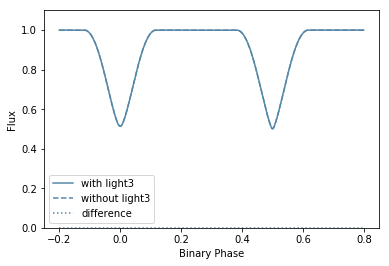


#######################################################

Number density per pixel Npx:  1.9212035078662901
foo foo  66.62387423384374
a,r1,r2:  146.99060635586778 6.775196119565704e-05 9.524418156426721e-08
Crowding Lum, BinaryLum, LIGHT 3: 0.04159484804116115 1.245279957377279e-06 33402.005544813626
Secondary 2D distance:  3.4102556672172213

#######################################################

Number density per pixel Npx:  1.9212035078662901
foo foo  390.5520094768519
a,r1,r2:  162.93619827463738 0.006881040774263104 8.59232027520507e-08
Crowding Lum, BinaryLum, LIGHT 3: 2.943285431578647 10.90086068469167 0.27000486628656495
Secondary 2D distance:  1.5314200953124242

#######################################################

Number density per pixel Npx:  2.400124379139709
foo foo  314.6073060151818
a,r1,r2:  44.044721378386676 0.024723540749321562 3.1785874815114586e-07
Crowding Lum, BinaryLum, LIGHT 3: 0.6106529471099489 3.6740535145532327 0.1662068733324383
Secondary 2D dist

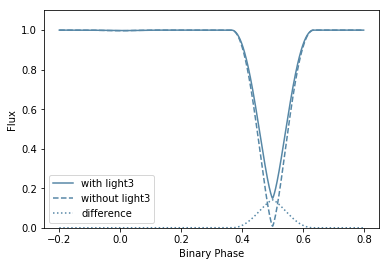


#######################################################

Number density per pixel Npx:  2.400124379139709
foo foo  22.260240467176512
a,r1,r2:  94.13110600182736 1.4872873160258224e-07 1.4872873160258224e-07
Crowding Lum, BinaryLum, LIGHT 3: 1.228992969736494 1.1192647004396865e-05 109803.60313817655
Secondary 2D distance:  0.4846734832969937


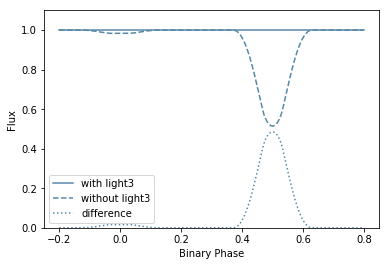


#######################################################

Number density per pixel Npx:  4.959582003881944
foo foo  1.1216925883336473
a,r1,r2:  130.19762105124508 7.250180514679973e-05 4.770796840605065e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.08432648553494396 2.9262397751135e-06 28817.35333245998
Secondary 2D distance:  1.8774989863938893


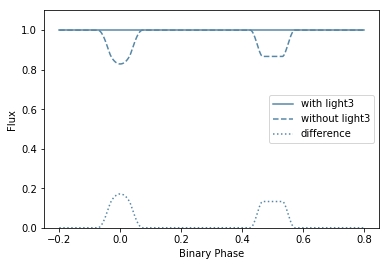


#######################################################

Number density per pixel Npx:  4.959582003881944
foo foo  0.022922361063032616
a,r1,r2:  83.06096506993676 1.6855089497469836e-07 0.00011549052721934241
Crowding Lum, BinaryLum, LIGHT 3: 0.0601129802157939 1.268594699720622e-06 47385.489021065885
Secondary 2D distance:  2.551210009367992

#######################################################

Number density per pixel Npx:  4.626068654974408
foo foo  0.6876339748958262
a,r1,r2:  44.740857569968625 0.005771378217094178 3.129130901906809e-07
Crowding Lum, BinaryLum, LIGHT 3: 1.6146762645797779 692.2410886168503 0.0023325345622086987
Secondary 2D distance:  3.026270285400045


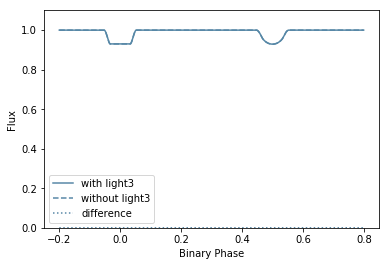


#######################################################

Number density per pixel Npx:  4.626068654974408
foo foo  4.483913993643301
a,r1,r2:  200.71094016187698 3.888781592457442e-05 1.5588309622911783e-05
Crowding Lum, BinaryLum, LIGHT 3: 75.27881553821594 3.3097884415924385e-06 22744298.273637407
Secondary 2D distance:  3.8158306577014094

#######################################################

Number density per pixel Npx:  2.028715481386064
foo foo  3.510994512215937
a,r1,r2:  168.85394202936877 0.016422665371375614 6.349329816095266e-05
Crowding Lum, BinaryLum, LIGHT 3: 1.6747547159413723 170.9358413687208 0.009797563240870047
Secondary 2D distance:  8.47012121438344

#######################################################

Number density per pixel Npx:  2.028715481386064
foo foo  1.1502256924364824
a,r1,r2:  100.99997101244755 8.297650564566352e-05 0.00010300795191023703
Crowding Lum, BinaryLum, LIGHT 3: 3.541031582061784 5.0596172604068626e-05 69986.1550748413
Secondary 2D di

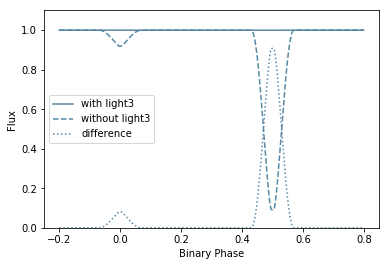


#######################################################

Number density per pixel Npx:  3.5875532043410554
foo foo  3.0717842102346635
a,r1,r2:  191.57107191600588 7.307992725612708e-08 5.901412222405736e-08
Crowding Lum, BinaryLum, LIGHT 3: 3.703079313858947 3.7607651149586184e-08 98466115.28940685
Secondary 2D distance:  1.7349626330658061


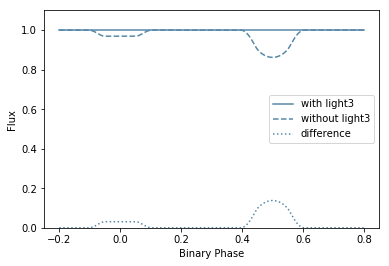


#######################################################

Number density per pixel Npx:  4.769028732065387
foo foo  2.367871329871117
a,r1,r2:  43.14111772513614 3.245163949899914e-07 0.00016714291382727335
Crowding Lum, BinaryLum, LIGHT 3: 2.706211160417696 0.18675219886289274 14.490919929700569
Secondary 2D distance:  2.338441864641502

#######################################################

Number density per pixel Npx:  4.769028732065387
foo foo  21.591653915056693
a,r1,r2:  25.326294036208864 0.0005463421377169631 0.0004795603133635426
Crowding Lum, BinaryLum, LIGHT 3: 3.105092546420704 0.01087609894899935 285.4969011390234
Secondary 2D distance:  6.3732251818099295

#######################################################

Number density per pixel Npx:  2.113869261851595
foo foo  0.22881726284891418
a,r1,r2:  156.84170064681123 3.527298624590904e-05 6.056444770440552e-05
Crowding Lum, BinaryLum, LIGHT 3: 5.935271073686691 2.929263438387307e-06 2026199.14477693
Secondary 2D distan

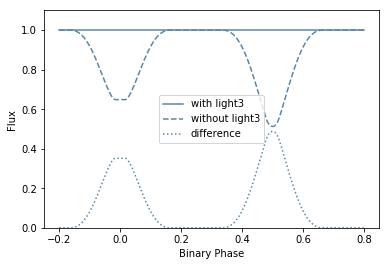


#######################################################

Number density per pixel Npx:  6.118144301758309
foo foo  4.286224745839307
a,r1,r2:  99.93806908390786 9.623041853317779e-05 6.271849135261843e-05
Crowding Lum, BinaryLum, LIGHT 3: 44.15822493243833 2.837582470455983e-06 15561917.721229212
Secondary 2D distance:  4.7818001974907896

#######################################################

Number density per pixel Npx:  6.017960291653383
foo foo  0.017741307671032117
a,r1,r2:  138.14015242653082 1.0134634828527378e-07 7.311757789291525e-05
Crowding Lum, BinaryLum, LIGHT 3: 14.78014108254995 1.2359148515515458e-06 11958866.797332535
Secondary 2D distance:  1.0910806996309288

#######################################################

Number density per pixel Npx:  6.017960291653383
foo foo  0.034467765572095736
a,r1,r2:  171.2057486633275 8.177295510988187e-08 5.334096283540843e-05
Crowding Lum, BinaryLum, LIGHT 3: 7.277346477168453 1.2982384892797143e-06 5605554.40103001
Secondary

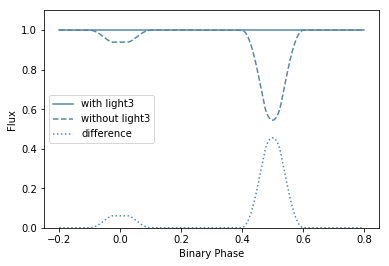


#######################################################

Number density per pixel Npx:  3.463782502208957
foo foo  0.906829498556129
a,r1,r2:  119.05649661108453 0.0023959064390292684 1.1759123104162092e-07
Crowding Lum, BinaryLum, LIGHT 3: 5.909673080472277 1556.0200720615844 0.0037979414189962856
Secondary 2D distance:  1.4527654596580453

#######################################################

Number density per pixel Npx:  1.3940331679513553
foo foo  66.60994622444694
a,r1,r2:  143.62807556710757 6.371660517430898e-05 9.747397884934243e-08
Crowding Lum, BinaryLum, LIGHT 3: 0.13733964049165706 1.3775304149704992e-06 99699.89700343444
Secondary 2D distance:  0.9628861552923931


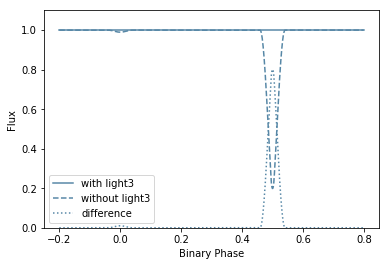


#######################################################

Number density per pixel Npx:  1.3940331679513553
foo foo  7.040441420092036
a,r1,r2:  211.96497184706809 2.596617977985844e-05 6.604864887817854e-08
Crowding Lum, BinaryLum, LIGHT 3: 56.57491002049069 1.6051263471093651e-06 35246390.492795244
Secondary 2D distance:  2.7653972429537323

#######################################################

Number density per pixel Npx:  2.0593752157070044
foo foo  4.015235872278768
a,r1,r2:  153.81294398973205 9.10196478713429e-08 6.996429826129113e-08
Crowding Lum, BinaryLum, LIGHT 3: 0.01570660899229593 3.876454520439394e-05 405.17975664307795
Secondary 2D distance:  1.2334181575150076

#######################################################

Number density per pixel Npx:  2.0593752157070044
foo foo  61.49852359206633
a,r1,r2:  137.62399735298547 7.041587478555363e-05 1.017264450188294e-07
Crowding Lum, BinaryLum, LIGHT 3: 127270.00972538805 1.2621648502460962e-06 100834696593.37527
Seconda

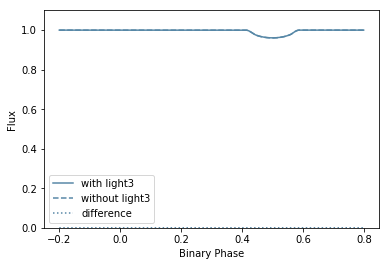


#######################################################

Number density per pixel Npx:  5.802131534885156
foo foo  0.7957620697865896
a,r1,r2:  171.77322038896895 8.150280915906413e-08 8.150280915906413e-08
Crowding Lum, BinaryLum, LIGHT 3: 0.4035427815642334 2.710272644847318e-10 1488937957.3359005
Secondary 2D distance:  1.843474216770831

#######################################################

Number density per pixel Npx:  5.802131534885156
foo foo  5.587002266839535
a,r1,r2:  143.04604812810314 6.504621507650024e-05 2.898627472146313e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.326106504625305 3.061003591246617e-06 106535.8124890326
Secondary 2D distance:  1.9137806169481433


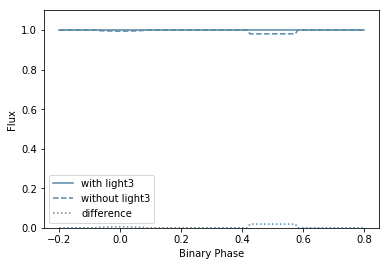


#######################################################

Number density per pixel Npx:  6.456699329893405
foo foo  0.7524431587504558
a,r1,r2:  188.91865591262916 7.410596868990376e-08 7.410596868990376e-08
Crowding Lum, BinaryLum, LIGHT 3: 1.844544211225385 2.4512196996428965e-10 7525005659.40338
Secondary 2D distance:  0.946264771829834

#######################################################

Number density per pixel Npx:  6.456699329893405
foo foo  0.5398489736978971
a,r1,r2:  49.43292536661572 0.00022585804031871923 0.000235579035956583
Crowding Lum, BinaryLum, LIGHT 3: 7.712603941397491 0.0007762175947393439 9936.136456668966
Secondary 2D distance:  2.2891991473592452


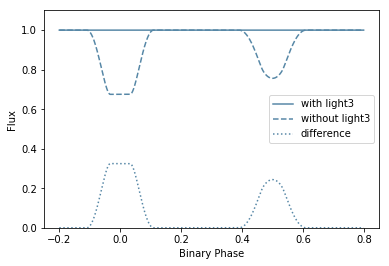


#######################################################

Number density per pixel Npx:  5.039523528819798
foo foo  0.2632138519380037
a,r1,r2:  35.07128248293645 0.0003330124102496876 0.03453904080702516
Crowding Lum, BinaryLum, LIGHT 3: 37.6184046972089 7.480216971707348 5.029052611641365
Secondary 2D distance:  1.3686079137775964

#######################################################

Number density per pixel Npx:  5.039523528819798
foo foo  0.2644680684140279
a,r1,r2:  59.31591458436525 2.3602434689071087e-07 2.3602434689071087e-07
Crowding Lum, BinaryLum, LIGHT 3: 0.35158598671463265 0.00021312424142045925 1649.6761906169604
Secondary 2D distance:  1.139057300555752

#######################################################

Number density per pixel Npx:  5.657544049183859
foo foo  0.34571141624986895
a,r1,r2:  101.392799845571 1.3807686562875344e-07 1.3807686562875344e-07
Crowding Lum, BinaryLum, LIGHT 3: 0.3172845762238858 0.00035038592268341897 905.5288916688559
Secondary 2D di

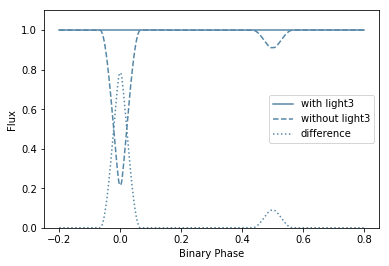


#######################################################

Number density per pixel Npx:  3.306438591808396
foo foo  1.7800168228245208
a,r1,r2:  139.8972130972338 1.0007347315967957e-07 3.2577768279942625e-05
Crowding Lum, BinaryLum, LIGHT 3: 29.41948709702396 1.7744502480116578e-06 16579493.91930806
Secondary 2D distance:  2.7146369807495687

#######################################################

Number density per pixel Npx:  3.306438591808396
foo foo  0.8806845287509264
a,r1,r2:  224.25839967864266 6.242798494977977e-08 0.00034167687541254775
Crowding Lum, BinaryLum, LIGHT 3: 115.60503296426533 7.482084891256489 15.450911697000466
Secondary 2D distance:  8.209707519990998

#######################################################

Number density per pixel Npx:  1.5861047417626397
foo foo  3.926063760621743
a,r1,r2:  52.40763671110131 2.671366403559738e-07 0.00012667467453418425
Crowding Lum, BinaryLum, LIGHT 3: 0.05524626649641727 0.0600297879527985 0.9203142036726414
Secondary 2D d

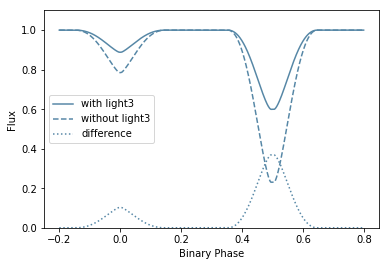


#######################################################

Number density per pixel Npx:  1.5861047417626397
foo foo  250.30924999786632
a,r1,r2:  112.8157144048911 0.00964921508208548 1.748973911757535e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.142869526438428 3.633296326512447 0.03932228852238061
Secondary 2D distance:  6.46577825668658

#######################################################

Number density per pixel Npx:  1.7856452244051195
foo foo  0.03393546841814843
a,r1,r2:  108.88292036746496 9.079702341703015e-05 9.691290311642206e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.002670726136267801 2.5179564899830096e-06 1060.672075507477
Secondary 2D distance:  3.2606506188040196

#######################################################

Number density per pixel Npx:  1.7856452244051195
foo foo  0.03512347944249744
a,r1,r2:  152.06730080155185 9.206449990369743e-08 5.3728297264089115e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.004457450973542938 1.398725008019635e-06 3186.79579473163
Secondary

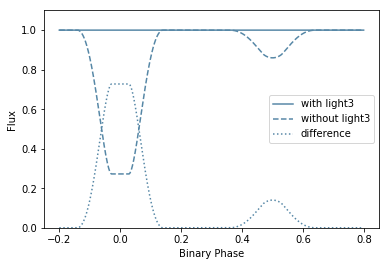


#######################################################

Number density per pixel Npx:  2.7707271195937015
foo foo  322.4694606598395
a,r1,r2:  184.58725562820467 0.005995894799411032 7.584488946625207e-08
Crowding Lum, BinaryLum, LIGHT 3: 3.5140712343337857 7.675056991510437 0.4578560443552124
Secondary 2D distance:  1.119870222535965


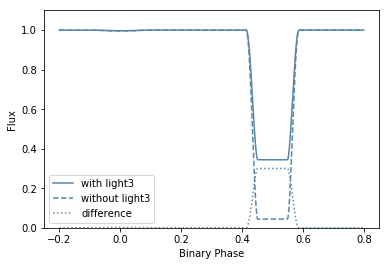


#######################################################

Number density per pixel Npx:  2.7707271195937015
foo foo  2.599442773538574
a,r1,r2:  157.71383352182923 4.8756974844218646e-05 4.216661393189208e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.7683552900888713 3.024907217222869e-06 254009.53976839298
Secondary 2D distance:  1.4866863858103148

#######################################################

Number density per pixel Npx:  3.0088895197223775
foo foo  0.26171519167390433
a,r1,r2:  17.057309981189945 0.0005890969924523464 8.207624775206986e-07
Crowding Lum, BinaryLum, LIGHT 3: 8.00097853871232 0.12593429522207975 63.532959982052034
Secondary 2D distance:  2.7896464131719454

#######################################################

Number density per pixel Npx:  3.0088895197223775
foo foo  94.28187965120362
a,r1,r2:  8.03052702350146 1.7433475983616998e-06 0.47417879929616746
Crowding Lum, BinaryLum, LIGHT 3: 6.582673305686623 3294.8389879458455 0.0019978740477969653
Secondary 2D 

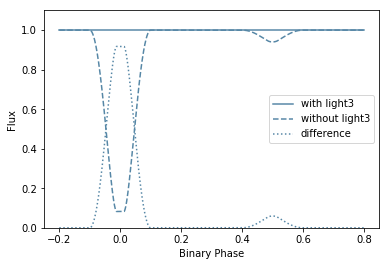


#######################################################

Number density per pixel Npx:  2.2133613553123097
foo foo  75.46641059596887
a,r1,r2:  107.80695093507595 9.75773852435989e-05 6.183948885160083e-05
Crowding Lum, BinaryLum, LIGHT 3: 63.76281604069828 2.8546629765760624e-06 22336372.65200974
Secondary 2D distance:  2.036642252521368

#######################################################

Number density per pixel Npx:  2.2133613553123097
foo foo  3.3354554719061005
a,r1,r2:  215.18259430075912 6.506102431515582e-08 5.085937522552011e-08
Crowding Lum, BinaryLum, LIGHT 3: 2.924530381704374 9.271587179428123e-08 31542931.378495228
Secondary 2D distance:  0.7425587895306358

#######################################################

Number density per pixel Npx:  1.6027824819062306
foo foo  0.06039512164620996
a,r1,r2:  86.18039759965178 1.6244993513532556e-07 1.6244993513532556e-07
Crowding Lum, BinaryLum, LIGHT 3: 0.10551964745868976 2.0011589252514538e-05 5272.926908862612
Seconda

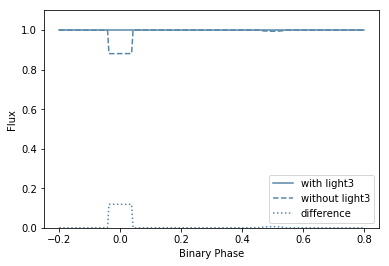


#######################################################

Number density per pixel Npx:  2.632498765165079
foo foo  85.86582034755371
a,r1,r2:  163.77925147875285 5.6537219745508415e-05 8.548091332445872e-08
Crowding Lum, BinaryLum, LIGHT 3: 0.04377438794853388 1.3643282012503475e-06 32084.93961234295
Secondary 2D distance:  7.146606299182641

#######################################################

Number density per pixel Npx:  1.0487943216478883
foo foo  3.768025777870983
a,r1,r2:  194.4828007451622 0.00037556459829871916 7.198580001089506e-08
Crowding Lum, BinaryLum, LIGHT 3: 0.15056116768174987 7.89049864936646e-09 19081324.815110218
Secondary 2D distance:  1.3822301362126124

#######################################################

Number density per pixel Npx:  1.0487943216478883
foo foo  245.1387327835664
a,r1,r2:  133.8675948130019 0.00835081115679717 1.0458094820898545e-07
Crowding Lum, BinaryLum, LIGHT 3: 0.5079180619430239 10.038720954300134 0.050595894064119275
Secondary 2

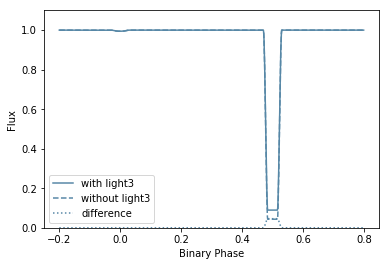


#######################################################

Number density per pixel Npx:  3.430637451109662
foo foo  0.6094228197144589
a,r1,r2:  166.9331715383138 4.060944653109906e-05 4.446105688261333e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.32002893512732394 3.0575624248389343e-06 104667.99713637322
Secondary 2D distance:  28.418006453671275

#######################################################

Number density per pixel Npx:  3.430637451109662
foo foo  4.3086819111036725
a,r1,r2:  142.047601232031 9.855851051741006e-08 9.855851051741006e-08
Crowding Lum, BinaryLum, LIGHT 3: 5.763477847480644 0.00020041489072149184 28757.73265515439
Secondary 2D distance:  1.5567893982068481


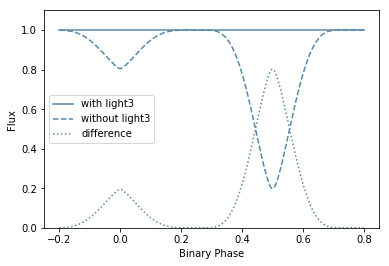


#######################################################

Number density per pixel Npx:  5.643489226098633
foo foo  0.07263399711005213
a,r1,r2:  134.83034577200007 8.613248450187449e-05 0.009912240310568617
Crowding Lum, BinaryLum, LIGHT 3: 7.2779161056563275 22.704141850321037 0.3205545558002853
Secondary 2D distance:  0.8194036238769723

#######################################################

Number density per pixel Npx:  5.643489226098633
foo foo  22.543102901646925
a,r1,r2:  96.68763663863585 0.00010894747358385427 9.901443927003241e-05
Crowding Lum, BinaryLum, LIGHT 3: 9.303125429163021 2.541413735751628e-06 3660610.351746448
Secondary 2D distance:  2.318331667417442

#######################################################

Number density per pixel Npx:  2.2190013937875332
foo foo  6.134287359402866
a,r1,r2:  188.72150852243905 7.41833832805305e-08 7.41833832805305e-08
Crowding Lum, BinaryLum, LIGHT 3: 15.616674833583302 5.9006069779562435e-05 264662.17614433204
Secondary 2D di

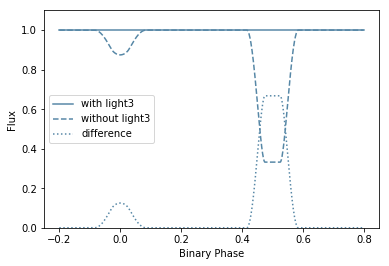


#######################################################

Number density per pixel Npx:  5.447632362725433
foo foo  6.551795101012257
a,r1,r2:  156.45869101073154 8.948048784991904e-08 8.948048784991904e-08
Crowding Lum, BinaryLum, LIGHT 3: 4.191655750265708 9.081237748826059e-05 46157.31760582491
Secondary 2D distance:  3.129397301779905

#######################################################

Number density per pixel Npx:  3.6681724111191736
foo foo  341.95983431623074
a,r1,r2:  188.91294784607325 0.005977208587056956 7.410820782600479e-08
Crowding Lum, BinaryLum, LIGHT 3: 1.9686748831692327 12.128634043739202 0.16231629019967522
Secondary 2D distance:  4.67039142694724


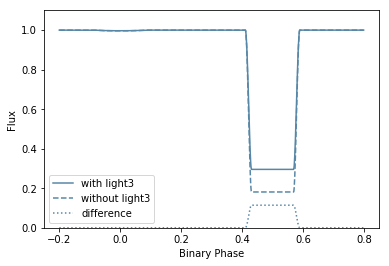


#######################################################

Number density per pixel Npx:  3.6681724111191736
foo foo  0.22987868713319087
a,r1,r2:  191.2952805507822 2.6837221333829578e-05 4.867073144959968e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.029048830527617676 2.984250883186871e-06 9734.04437652257
Secondary 2D distance:  7.666174176639552

#######################################################

Number density per pixel Npx:  2.2032932736215693
foo foo  0.4235864927423781
a,r1,r2:  169.68006064112836 5.898973041720221e-08 8.250822133786161e-08
Crowding Lum, BinaryLum, LIGHT 3: 0.114010623153042 1.5696316824954564e-05 7263.527133434504
Secondary 2D distance:  2.6227631770293884

#######################################################

Number density per pixel Npx:  2.2032932736215693
foo foo  1.0307968696688368
a,r1,r2:  97.76914100113719 0.08000012491595124 0.3573864382778972
Crowding Lum, BinaryLum, LIGHT 3: 56.78186941754304 315.34578884807325 0.1800622409608245
Secondary 2D dis

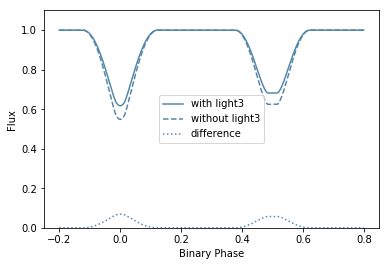


#######################################################

Number density per pixel Npx:  5.46790756240638
foo foo  0.045015864452999925
a,r1,r2:  128.181211981539 8.98664729530057e-05 0.0055124914835412535
Crowding Lum, BinaryLum, LIGHT 3: 5.205000984330541 0.3778431080953412 13.775561530203065
Secondary 2D distance:  3.133009139208467


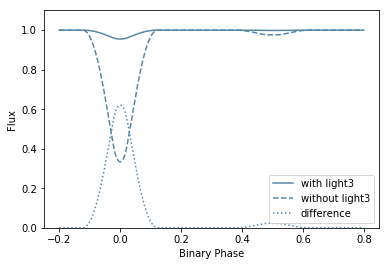


#######################################################

Number density per pixel Npx:  5.46790756240638
foo foo  628.5337979248193
a,r1,r2:  198.5645189572994 0.005561044551096116 7.050605049440202e-08
Crowding Lum, BinaryLum, LIGHT 3: 12.464115475302183 7.358669984736948 1.6938000346740296
Secondary 2D distance:  1.6057481385031984

#######################################################

Number density per pixel Npx:  1.9855027564240628
foo foo  16.097220918858756
a,r1,r2:  57.59220592983413 2.4308844875739804e-07 2.4308844875739804e-07
Crowding Lum, BinaryLum, LIGHT 3: 0.007117507938871801 4.8587706634272994e-05 146.48783472013525
Secondary 2D distance:  15.627062396796797

#######################################################

Number density per pixel Npx:  1.9855027564240628
foo foo  8.138817074034419
a,r1,r2:  138.31904062754137 4.714292115889631e-05 1.01215276916925e-07
Crowding Lum, BinaryLum, LIGHT 3: 0.6379565148319153 1.5005639015489918e-06 425144.5167869025
Secondary 2D

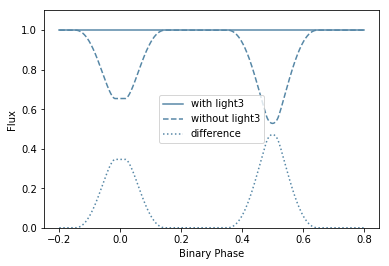


#######################################################

Number density per pixel Npx:  6.632438000868705
foo foo  2.1255331201512693
a,r1,r2:  66.70770197746953 2.0987081828614765e-07 2.0987081828614765e-07
Crowding Lum, BinaryLum, LIGHT 3: 1.8482370803879418 0.0006706840328650468 2755.749339212074
Secondary 2D distance:  1.3538554236910256

#######################################################

Number density per pixel Npx:  6.632438000868705
foo foo  0.052067244390476365
a,r1,r2:  146.09512354617195 4.935157673744621e-05 5.998848089222595e-05
Crowding Lum, BinaryLum, LIGHT 3: 5626.118739382931 0.002749061098441549 2046560.09376161
Secondary 2D distance:  1.2239921708662085

#######################################################

Number density per pixel Npx:  2.297546176915935
foo foo  0.010351550024869979
a,r1,r2:  72.60055414539279 0.00012622470494132862 0.00016012362156407825
Crowding Lum, BinaryLum, LIGHT 3: 1.5789081249140648 2.570304304886216e-06 614288.4023158344
Secondar

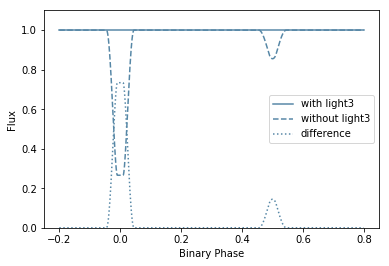


#######################################################

Number density per pixel Npx:  1.8761165110285198
foo foo  0.19776692438197638
a,r1,r2:  47.82901735740473 0.0001460767506343486 0.00010682241668974094
Crowding Lum, BinaryLum, LIGHT 3: 0.15474003955549367 0.030597751612699557 5.057235626792559
Secondary 2D distance:  2.0829019580104204

#######################################################

Number density per pixel Npx:  1.8761165110285198
foo foo  2.3349744952349627
a,r1,r2:  29.992426571201662 0.00033155515440500596 0.00037380486283584285
Crowding Lum, BinaryLum, LIGHT 3: 5.545707010371896 0.049158985773998576 112.8116645015317
Secondary 2D distance:  3.7931834777459956

#######################################################

Number density per pixel Npx:  3.806782911064364
foo foo  0.6905450387622754
a,r1,r2:  124.55251242985315 7.254870012522381e-05 0.02134789888696508
Crowding Lum, BinaryLum, LIGHT 3: 0.300107227641778 264.1221517134955 0.0011362440662202277
Secondary 2

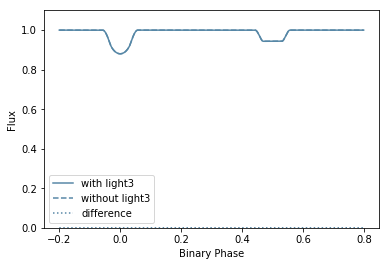


#######################################################

Number density per pixel Npx:  3.806782911064364
foo foo  62.23688722697098
a,r1,r2:  111.74295228617918 8.941277465622363e-05 1.2528754354140666e-07
Crowding Lum, BinaryLum, LIGHT 3: 8.913532110342478 1.223514283896737e-06 7285188.434379381
Secondary 2D distance:  0.3686080872978032

#######################################################

Number density per pixel Npx:  3.339139030139427
foo foo  0.0005125816183242245
a,r1,r2:  60.550032024491884 2.312137505449566e-07 0.015870977047621717
Crowding Lum, BinaryLum, LIGHT 3: 4.321593593756942 1.5729954186431316 2.7473656582450543
Secondary 2D distance:  0.5452063949108333

#######################################################

Number density per pixel Npx:  3.339139030139427
foo foo  120.48126180508585
a,r1,r2:  193.41972913924312 0.006702004437732725 7.238144765429478e-08
Crowding Lum, BinaryLum, LIGHT 3: 1.7303859025767614 38.05135792902532 0.04547501053193254
Secondary 2D dis

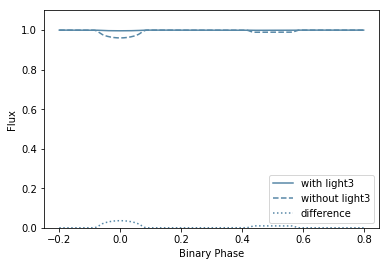


#######################################################

Number density per pixel Npx:  4.026760552249425
foo foo  13.546613345411748
a,r1,r2:  140.76916236486102 4.06705840076103e-05 0.1869661545217927
Crowding Lum, BinaryLum, LIGHT 3: 48.41179622183663 10881.16736494966 0.004449136255157729
Secondary 2D distance:  4.940848472646803


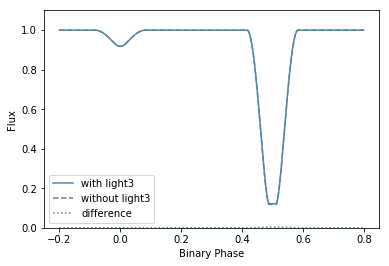


#######################################################

Number density per pixel Npx:  4.5791575222182415
foo foo  0.921298440776904
a,r1,r2:  208.5993489293335 6.711430343314606e-08 6.711430343314606e-08
Crowding Lum, BinaryLum, LIGHT 3: 0.04945239966284663 2.6124365071484353e-10 189296082.5173341
Secondary 2D distance:  0.6239725798589436


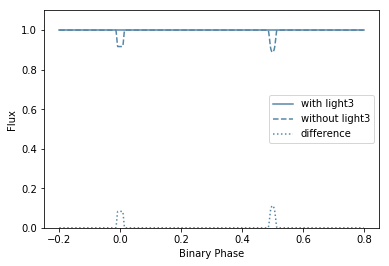


#######################################################

Number density per pixel Npx:  4.5791575222182415
foo foo  0.1750429151770221
a,r1,r2:  180.9346701556895 3.773829951261026e-05 2.9763940730827082e-05
Crowding Lum, BinaryLum, LIGHT 3: 112.04600484952226 3.2203224758676563e-06 34793411.43291357
Secondary 2D distance:  4.936709350217469


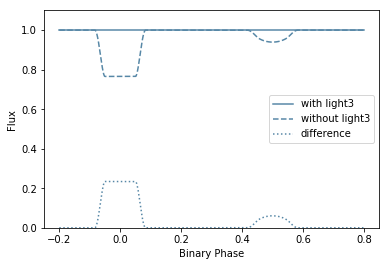


#######################################################

Number density per pixel Npx:  1.8366698471943304
foo foo  24.09622925466592
a,r1,r2:  157.08857021232822 5.626945327140411e-05 2.4682827458615297e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.10472769702747967 0.004081479382923671 25.659249306916863
Secondary 2D distance:  3.6390584020914183

#######################################################

Number density per pixel Npx:  1.8366698471943304
foo foo  0.5981691569507872
a,r1,r2:  116.27280763992137 1.2040648440653297e-07 1.2040648440653297e-07
Crowding Lum, BinaryLum, LIGHT 3: 0.11926126953063446 2.630846314581596e-10 453319028.4419997
Secondary 2D distance:  1.3169397192133288


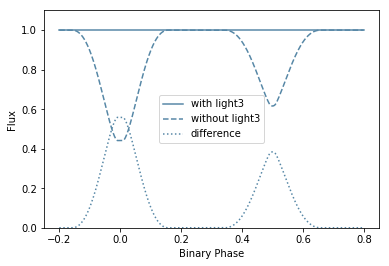


#######################################################

Number density per pixel Npx:  3.374611863303356
foo foo  0.013095178388884115
a,r1,r2:  124.41169331758857 1.1252961539766105e-07 8.177215598616359e-05
Crowding Lum, BinaryLum, LIGHT 3: 51.823132698199075 1.2559410877061756e-06 41262391.36968419
Secondary 2D distance:  2.2276736315916565

#######################################################

Number density per pixel Npx:  3.374611863303356
foo foo  0.8921652339791664
a,r1,r2:  89.33499805759448 1.5671349755864066e-07 1.5671349755864066e-07
Crowding Lum, BinaryLum, LIGHT 3: 0.35261256925619966 0.013866060276484057 25.429903103349968
Secondary 2D distance:  0.42088148091554434

#######################################################

Number density per pixel Npx:  3.2835821265839082
foo foo  0.7517592259468352
a,r1,r2:  30.484882174325463 0.0004408211321861691 0.0004087792805021507
Crowding Lum, BinaryLum, LIGHT 3: 0.12575594682739194 0.006202518149364273 20.27498248276489
Sec

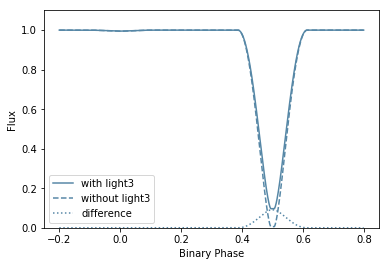


#######################################################

Number density per pixel Npx:  3.9304682155717794
foo foo  4.262071064942765
a,r1,r2:  30.30062914396303 4.62036610972129e-07 5.97892241368932e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.11148572420763962 0.07630257167407846 1.461100481433886
Secondary 2D distance:  2.1700862997222914


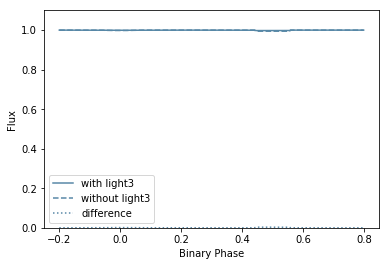


#######################################################

Number density per pixel Npx:  3.9304682155717794
foo foo  0.3580131850219451
a,r1,r2:  12.776054357160401 0.011302764985841167 1.0957999714640876e-06
Crowding Lum, BinaryLum, LIGHT 3: 0.1331485227080198 39.2168031234043 0.0033951906352243624
Secondary 2D distance:  3.3463358660388964

#######################################################

Number density per pixel Npx:  6.186189589771117
foo foo  0.42931642870876435
a,r1,r2:  118.1739228552966 1.1846945300396715e-07 0.005538585121490455
Crowding Lum, BinaryLum, LIGHT 3: 91.0681513014553 0.2774513439985176 328.2310692354832
Secondary 2D distance:  1.8981743926069792

#######################################################

Number density per pixel Npx:  6.186189589771117
foo foo  0.041787250300963204
a,r1,r2:  46.89308697260764 2.985514689655221e-07 0.0017160158193130833
Crowding Lum, BinaryLum, LIGHT 3: 3.5328887251801966 12.236772017561155 0.2887108397631419
Secondary 2D dist

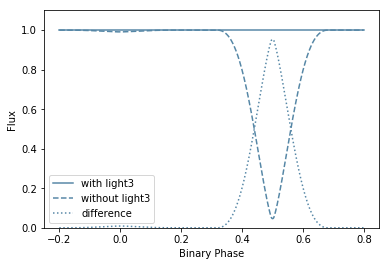


#######################################################

Number density per pixel Npx:  6.641814889336314
foo foo  314.68229027889936
a,r1,r2:  178.69289442972155 0.006208724373142627 7.834670787934483e-08
Crowding Lum, BinaryLum, LIGHT 3: 18.166366880031497 8.426739173467405 2.155800304966181
Secondary 2D distance:  2.588875176304485


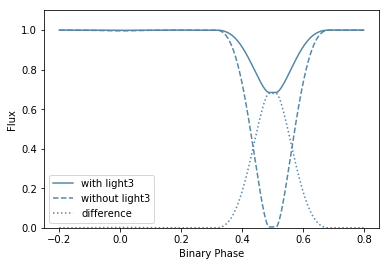


#######################################################

Number density per pixel Npx:  5.657961924769289
foo foo  0.006030487098932212
a,r1,r2:  90.59943275889385 1.5452635379359663e-07 0.012847295896195026
Crowding Lum, BinaryLum, LIGHT 3: 6.233194271482104 16.706942705463803 0.37309006090286123
Secondary 2D distance:  0.3861382483106224

#######################################################

Number density per pixel Npx:  5.657961924769289
foo foo  0.02246305791982419
a,r1,r2:  83.87118937391624 0.0001430370881885123 0.0001342141382372494
Crowding Lum, BinaryLum, LIGHT 3: 280.1099571603546 2.3337236177007374e-06 120027048.20561756
Secondary 2D distance:  0.9477739049203397

#######################################################

Number density per pixel Npx:  1.1663172285087462
foo foo  7.462482012458255
a,r1,r2:  123.51008165503822 7.76775117072192e-05 7.123823966132896e-05
Crowding Lum, BinaryLum, LIGHT 3: 5.69883668195477 2.6371988586466586e-06 2160943.1019089944
Secondary 2D

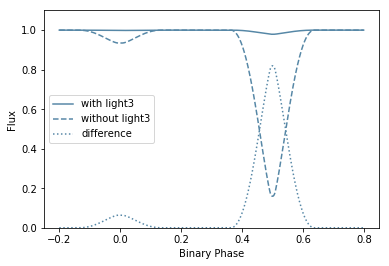


#######################################################

Number density per pixel Npx:  4.910628999036736
foo foo  0.040942745263503846
a,r1,r2:  74.5815246539478 0.09395266276398714 3.856604932477697e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.8494612767412435 14615.504659519444 5.812055734852564e-05
Secondary 2D distance:  2.0269046988232824

#######################################################

Number density per pixel Npx:  1.09364749544982
foo foo  0.1482976186343563
a,r1,r2:  200.7341338859944 6.974399285749381e-08 6.974399285749381e-08
Crowding Lum, BinaryLum, LIGHT 3: 19.279242718414732 2.5024429044379216e-10 77041688680.38602
Secondary 2D distance:  4.218135118371198

#######################################################

Number density per pixel Npx:  1.09364749544982
foo foo  0.4037134890211162
a,r1,r2:  75.68894969203907 0.00012194902295623928 0.007010174844229257
Crowding Lum, BinaryLum, LIGHT 3: 1.490684779345421 0.13877079625838512 10.742064033197817
Secondary 2D dista

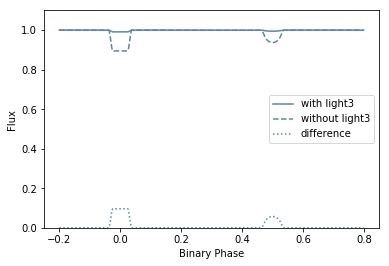


#######################################################

Number density per pixel Npx:  2.5754689790131917
foo foo  1.485863297358885
a,r1,r2:  200.08411733329686 6.997057131066044e-08 6.997057131066044e-08
Crowding Lum, BinaryLum, LIGHT 3: 0.17868973970113433 2.6439704100464144e-10 675838651.6814213
Secondary 2D distance:  1.0196561216750974

#######################################################

Number density per pixel Npx:  2.5754689790131917
foo foo  0.00038573766499762016
a,r1,r2:  126.12392753591885 1.1100193495015398e-07 0.008031482555774747
Crowding Lum, BinaryLum, LIGHT 3: 23.39703424936285 2.063351260322289 11.339336495574829
Secondary 2D distance:  2.99721647248964

#######################################################

Number density per pixel Npx:  1.2802397805193848
foo foo  1.657366390297788
a,r1,r2:  162.85220047485674 8.59675212197179e-08 8.59675212197179e-08
Crowding Lum, BinaryLum, LIGHT 3: 0.007621492582917394 0.0014916408042797338 5.109469090045154
Secondary 

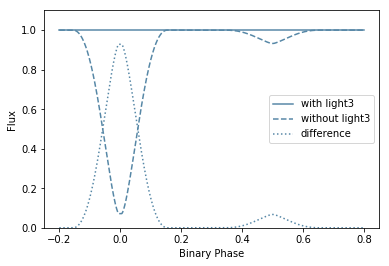


#######################################################

Number density per pixel Npx:  6.7343420908201015
foo foo  4.8316305352687055
a,r1,r2:  164.37202875395243 0.015179661327316492 6.705189893647324e-05
Crowding Lum, BinaryLum, LIGHT 3: 1.571141224554064 109.64422388353962 0.014329448181628582
Secondary 2D distance:  0.5653283441519383

#######################################################

Number density per pixel Npx:  6.7343420908201015
foo foo  2.4914578569047885
a,r1,r2:  44.26837067084594 3.1625288638011824e-07 0.0001912573161835688
Crowding Lum, BinaryLum, LIGHT 3: 4.069315877869768 0.4293602473321439 9.477626080091742
Secondary 2D distance:  1.2261283056461418

#######################################################

Number density per pixel Npx:  4.636231256327064
foo foo  126.99937279074199
a,r1,r2:  42.155897147795336 0.0002756995187501738 0.00022671302283265829
Crowding Lum, BinaryLum, LIGHT 3: 3.6561713866193974 2.5109679974529102e-06 1456080.4400247892
Secondary 2D

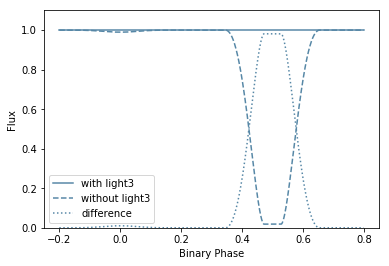


#######################################################

Number density per pixel Npx:  4.636231256327064
foo foo  133.32005620220008
a,r1,r2:  46.43811654514402 0.025378560760385038 3.014764818549465e-07
Crowding Lum, BinaryLum, LIGHT 3: 0.24274276856546892 18.569099021331283 0.013072404228477524
Secondary 2D distance:  8.607195219081511

#######################################################

Number density per pixel Npx:  2.7211290747095047
foo foo  0.6782983951603704
a,r1,r2:  133.2653608339888 8.668877048274451e-08 1.0505355564556694e-07
Crowding Lum, BinaryLum, LIGHT 3: 2.188940428428298 2.8902538476262323e-07 7573523.10152991
Secondary 2D distance:  4.5770676382693996

#######################################################

Number density per pixel Npx:  2.7211290747095047
foo foo  0.18921299214762682
a,r1,r2:  216.0101870775851 6.481175813699737e-08 6.481175813699737e-08
Crowding Lum, BinaryLum, LIGHT 3: 0.14141711904595208 0.00014999603203793844 942.805733755567
Secondary 2

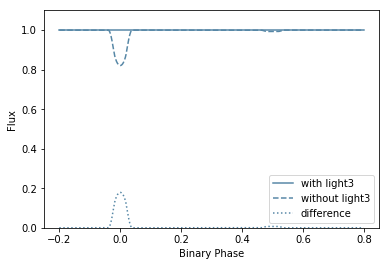


#######################################################

Number density per pixel Npx:  1.8165407433125256
foo foo  0.09250691592922683
a,r1,r2:  154.41226259262461 9.0666374321159e-08 5.495643188075439e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.8014696041089386 1.3324322878858684e-06 601508.6930838393
Secondary 2D distance:  3.572494725798007


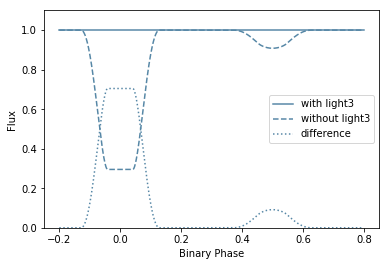


#######################################################

Number density per pixel Npx:  1.8165407433125256
foo foo  1.0070507972797123
a,r1,r2:  131.2121423447362 0.00013846488988563267 0.00012605342385930724
Crowding Lum, BinaryLum, LIGHT 3: 104.63547283763164 0.003998529483670344 26168.488506825834
Secondary 2D distance:  5.5527511867005

#######################################################

Number density per pixel Npx:  5.9525301787900755
foo foo  4.465930110727984
a,r1,r2:  217.4636475189252 6.437857618837935e-08 6.437857618837935e-08
Crowding Lum, BinaryLum, LIGHT 3: 15.05859616374236 2.602282958519257e-10 57866866915.62148
Secondary 2D distance:  1.1255731591203437

#######################################################

Number density per pixel Npx:  5.9525301787900755
foo foo  0.31619562505339055
a,r1,r2:  149.64875963569153 4.6982401845729135e-05 5.9455785236460706e-05
Crowding Lum, BinaryLum, LIGHT 3: 438.8068854097513 2.8365862104073214e-06 154695416.55380908
Secondary

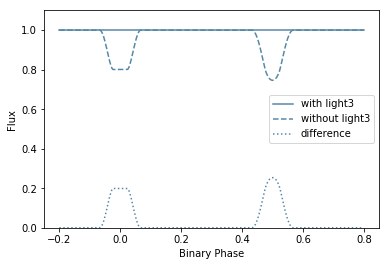


#######################################################

Number density per pixel Npx:  5.402783028287347
foo foo  0.023710350178979843
a,r1,r2:  130.0152748810354 5.7243941823711e-05 8.028768622888642e-05
Crowding Lum, BinaryLum, LIGHT 3: 380.1249151954701 2.762812222480585e-06 137586229.02506772
Secondary 2D distance:  4.3298224526742635

#######################################################

Number density per pixel Npx:  1.019062136426524
foo foo  2.3223581707082026
a,r1,r2:  32.815008083247385 4.266340561149286e-07 0.00025004752067993524
Crowding Lum, BinaryLum, LIGHT 3: 0.037594852393450826 0.23374851181373185 0.16083461709227562
Secondary 2D distance:  30.270190467454828

#######################################################

Number density per pixel Npx:  1.019062136426524
foo foo  552.9547278346149
a,r1,r2:  33.13749047823781 0.032664195505533705 4.2248220362957593e-07
Crowding Lum, BinaryLum, LIGHT 3: 0.15802921438217024 3.4017847128724332 0.04645479585588823
Secondary 2

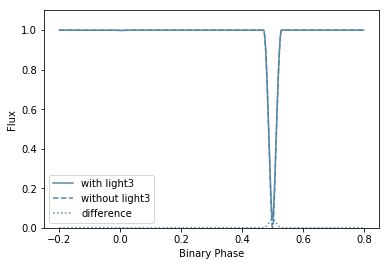


#######################################################

Number density per pixel Npx:  4.676182164169231
foo foo  0.003251807530964252
a,r1,r2:  0.0 inf inf
Crowding Lum, BinaryLum, LIGHT 3: 1.7995897496746343 7.249076923219072 0.24825088335184842
Secondary 2D distance:  1.896346407568676


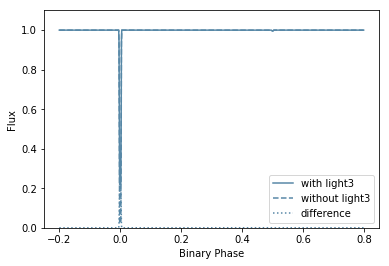


#######################################################

Number density per pixel Npx:  4.676182164169231
foo foo  0.47833023086037124
a,r1,r2:  112.06985693454247 1.2492208326969748e-07 0.0006522364329698645
Crowding Lum, BinaryLum, LIGHT 3: 0.33656934092824004 3.208050771172331e-08 10491396.95520611
Secondary 2D distance:  5.100265340669551


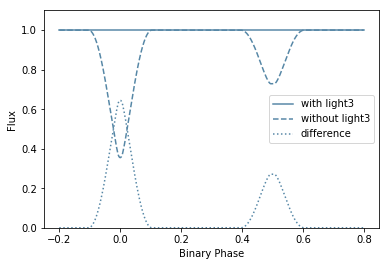


#######################################################

Number density per pixel Npx:  3.2270811658881913
foo foo  0.3964716982627899
a,r1,r2:  92.14176258404028 1.5193978937868633e-07 1.5193978937868633e-07
Crowding Lum, BinaryLum, LIGHT 3: 69.3218556764519 0.0005470141009749142 126727.73069817259
Secondary 2D distance:  0.3281022344418793

#######################################################

Number density per pixel Npx:  3.2270811658881913
foo foo  328.57358683305546
a,r1,r2:  187.13664144761418 0.005928705142548238 7.481164507229371e-08
Crowding Lum, BinaryLum, LIGHT 3: 0.2425230022644922 8.46722539839274 0.028642558908438677
Secondary 2D distance:  0.763566141712631


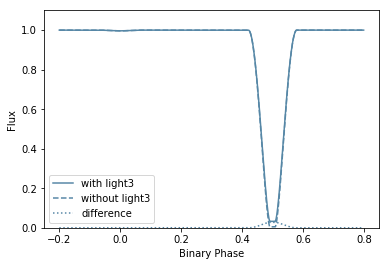


#######################################################

Number density per pixel Npx:  4.206124117316726
foo foo  0.9803053317954347
a,r1,r2:  186.29218730964098 3.867793039832216e-05 0.02711708961314039
Crowding Lum, BinaryLum, LIGHT 3: 201.16857323104833 1283.1684409381264 0.1567748760123602
Secondary 2D distance:  46.50327454249802


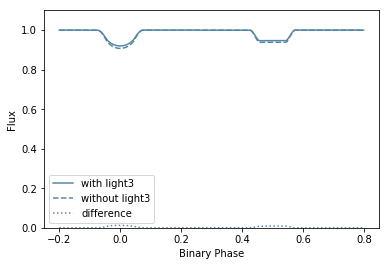


#######################################################

Number density per pixel Npx:  4.206124117316726
foo foo  3.241690223020432
a,r1,r2:  151.42802303503404 9.245316500474282e-08 9.245316500474282e-08
Crowding Lum, BinaryLum, LIGHT 3: 29.530649402875415 0.0003311022394438203 89188.91473667009
Secondary 2D distance:  1.7176129583323

#######################################################

Number density per pixel Npx:  1.4375236403083762
foo foo  0.19609342426331045
a,r1,r2:  168.16675395740236 8.32507000970375e-08 8.32507000970375e-08
Crowding Lum, BinaryLum, LIGHT 3: 0.008868164014132474 2.39486190703799e-10 37029959.798812725
Secondary 2D distance:  4.087729947837443

#######################################################

Number density per pixel Npx:  1.4375236403083762
foo foo  0.22551141438273606
a,r1,r2:  168.38754642194783 6.403992852951518e-08 8.314154043743001e-08
Crowding Lum, BinaryLum, LIGHT 3: 0.17889704437465925 4.1167631215392476e-05 4345.575373007376
Secondary 

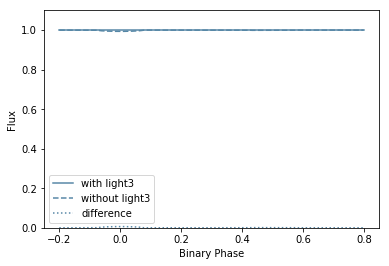


#######################################################

Number density per pixel Npx:  2.831469726464459
foo foo  0.50058391089941
a,r1,r2:  160.1969648184209 2.5199249529927368e-05 8.739241730246661e-08
Crowding Lum, BinaryLum, LIGHT 3: 49.42390984768164 1.8180847403830947e-06 27184601.87794512
Secondary 2D distance:  0.42297988772464695


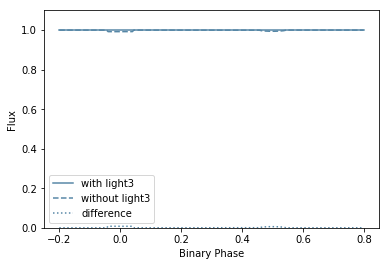


#######################################################

Number density per pixel Npx:  2.831469726464459
foo foo  16.60839938091319
a,r1,r2:  68.98013562943079 0.0001474322401179887 6.183132078981994e-05
Crowding Lum, BinaryLum, LIGHT 3: 1.1352987965347514 6.181253210837179e-05 18366.806176849506
Secondary 2D distance:  0.6319684206858459

#######################################################

Number density per pixel Npx:  2.4589314132853297
foo foo  6.672412782137174
a,r1,r2:  130.97693223141613 0.006856490686976433 7.170032728873437e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.9199817154133437 0.7627588883527627 1.2061238871960127
Secondary 2D distance:  3.6932604817687764


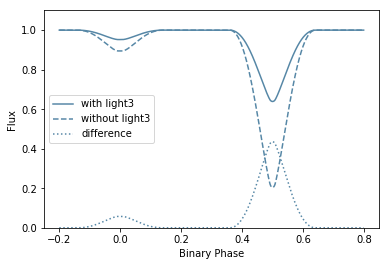


#######################################################

Number density per pixel Npx:  2.4589314132853297
foo foo  36.800820773252134
a,r1,r2:  60.70378892089034 0.0011152589593896765 2.3062810820993252e-07
Crowding Lum, BinaryLum, LIGHT 3: 1.4859854130797672 1.0783391246121652e-08 137803162.21153674
Secondary 2D distance:  1.8804518142368434


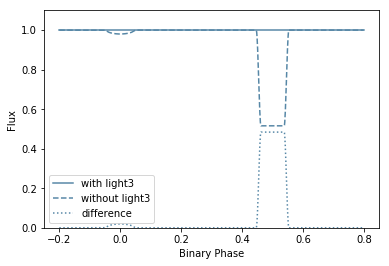


#######################################################

Number density per pixel Npx:  2.477039807608422
foo foo  0.022564709524205306
a,r1,r2:  0.0 inf inf
Crowding Lum, BinaryLum, LIGHT 3: 2.2841302906443306 58.99986656058114 0.038714160282023395
Secondary 2D distance:  2.22177644768318

#######################################################

Number density per pixel Npx:  2.477039807608422
foo foo  125.48951532192183
a,r1,r2:  70.50196751447766 0.00014988470439945012 7.02340905218548e-05
Crowding Lum, BinaryLum, LIGHT 3: 16.844722558584447 2.9252387355334067e-06 5758409.51166431
Secondary 2D distance:  1.842092702544312

#######################################################

Number density per pixel Npx:  3.7437507441747218
foo foo  0.3869869203534501
a,r1,r2:  196.56981847886786 1.5259497234298384e-05 7.122151359927649e-08
Crowding Lum, BinaryLum, LIGHT 3: 0.07459442373202961 1.8913444521109773e-06 39439.89348358671
Secondary 2D distance:  4.224281549159881

##################

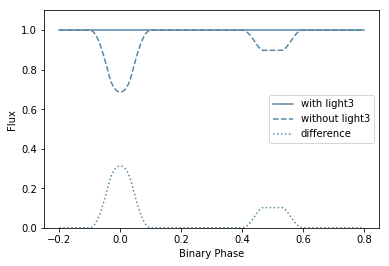


#######################################################

Number density per pixel Npx:  1.9927142849828228
foo foo  3.4365212824164475
a,r1,r2:  193.1599201164238 7.247880404776386e-08 7.247880404776386e-08
Crowding Lum, BinaryLum, LIGHT 3: 0.0923862717762263 0.0002357847370346495 391.824648779746
Secondary 2D distance:  1.6501128687082276

#######################################################

Number density per pixel Npx:  1.9927142849828228
foo foo  0.16429385552474
a,r1,r2:  54.5559012604935 7.115608906850205e-05 2.56617518481691e-07
Crowding Lum, BinaryLum, LIGHT 3: 11.73834644920159 0.04453038384842821 263.60308254149305
Secondary 2D distance:  3.695111129275183

#######################################################

Number density per pixel Npx:  4.510405688637656
foo foo  0.3126920535770207
a,r1,r2:  144.88658025112943 9.662730651613171e-08 9.662730651613171e-08
Crowding Lum, BinaryLum, LIGHT 3: 0.17047061911967903 2.3928847137904224e-10 712406319.1897237
Secondary 2D dist

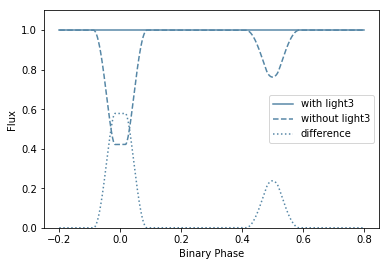


#######################################################

Number density per pixel Npx:  4.510405688637656
foo foo  4.9677390157954004
a,r1,r2:  133.71648898039513 0.013894769107029257 8.455861944988711e-05
Crowding Lum, BinaryLum, LIGHT 3: 1.3498494906298817 69.57320875786985 0.019401857622057598
Secondary 2D distance:  2.7434262083343204


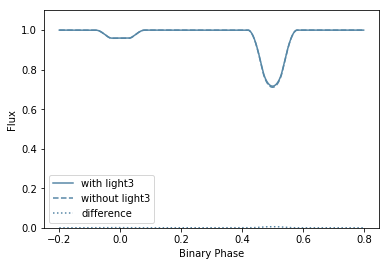


#######################################################

Number density per pixel Npx:  2.2599308614507025
foo foo  4.091100723596518
a,r1,r2:  208.97514037359463 6.699361452741003e-08 5.3488480512699854e-08
Crowding Lum, BinaryLum, LIGHT 3: 0.05397690202454956 0.008900891998900437 6.064212668934477
Secondary 2D distance:  0.40870999254863716

#######################################################

Number density per pixel Npx:  2.2599308614507025
foo foo  22.01594026737648
a,r1,r2:  103.30960219674576 9.121704800739648e-05 7.86131793114472e-05
Crowding Lum, BinaryLum, LIGHT 3: 4.803555743092362 0.002174593559365635 2208.9441598887283
Secondary 2D distance:  2.2196154156433985


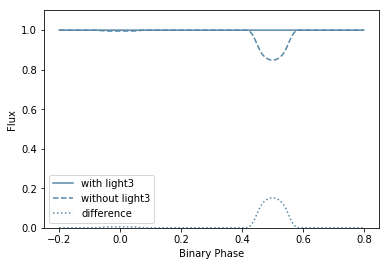


#######################################################

Number density per pixel Npx:  2.8713787599709555
foo foo  1.0529612147029253
a,r1,r2:  86.92224489107599 1.227193787774498e-07 1.6106348861035147e-07
Crowding Lum, BinaryLum, LIGHT 3: 0.49243225449909356 0.0005519029010375438 892.2443668503118
Secondary 2D distance:  1.1286779217793046


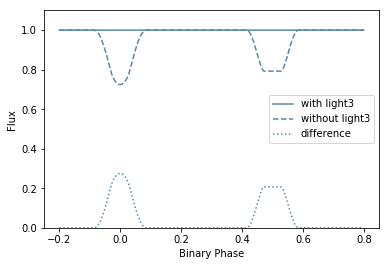


#######################################################

Number density per pixel Npx:  2.8713787599709555
foo foo  0.8727738512773426
a,r1,r2:  152.97727617357836 9.151686021729563e-08 9.151686021729563e-08
Crowding Lum, BinaryLum, LIGHT 3: 112.1338540503156 2.7231148230090745e-10 411785258200.7774
Secondary 2D distance:  0.19675196629493272

#######################################################

Number density per pixel Npx:  5.139992384796227
foo foo  21.386767605155132
a,r1,r2:  31.148543779992487 0.00035494833109638507 0.00046004525052340385
Crowding Lum, BinaryLum, LIGHT 3: 6.92665195600441 2.2562533203353776e-06 3069979.7285948405
Secondary 2D distance:  20.978300939876398


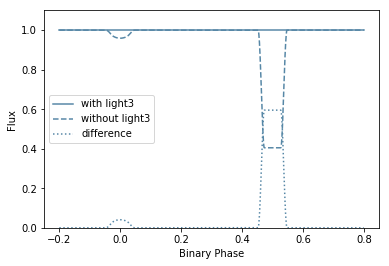


#######################################################

Number density per pixel Npx:  5.139992384796227
foo foo  0.5848006540996515
a,r1,r2:  168.1563484040308 8.325585166943606e-08 0.00043640405414915206
Crowding Lum, BinaryLum, LIGHT 3: 115.67270088265141 3.32654081607111e-08 3477266845.0005493
Secondary 2D distance:  3.986477091105353

#######################################################

Number density per pixel Npx:  2.0286976033731734
foo foo  1.3243337051447248
a,r1,r2:  162.0954086396086 8.63688868025041e-08 8.63688868025041e-08
Crowding Lum, BinaryLum, LIGHT 3: 7.330478476798124 2.764712201178868e-10 26514436018.59326
Secondary 2D distance:  0.6302657876066171

#######################################################

Number density per pixel Npx:  2.0286976033731734
foo foo  5.8959665828197245
a,r1,r2:  74.24240945903546 1.8857146612038156e-07 1.8857146612038156e-07
Crowding Lum, BinaryLum, LIGHT 3: 271.13157647151417 0.0001359088359399306 1994951.7968894218
Secondary 2D

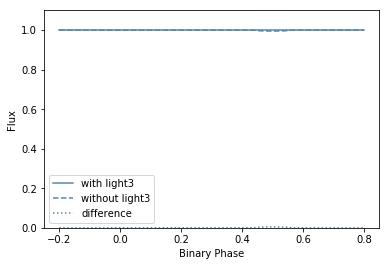


#######################################################

Number density per pixel Npx:  3.0576212835049383
foo foo  2.221707665215024
a,r1,r2:  56.19403522255136 2.4913676237263036e-07 7.669438677576693e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.10631684390188889 0.13610158069905234 0.781158039133848
Secondary 2D distance:  6.102133548477467

#######################################################

Number density per pixel Npx:  3.0576212835049383
foo foo  254.7459444671889
a,r1,r2:  92.62252924372343 0.01291235709157933 1.5115113044646974e-07
Crowding Lum, BinaryLum, LIGHT 3: 2.9966249977511255 21.723264115299006 0.1379454294642902
Secondary 2D distance:  0.7697885299126432

#######################################################

Number density per pixel Npx:  2.5359371867808376
foo foo  0.04967616339290695
a,r1,r2:  112.3290489432841 7.01800887582595e-05 8.019392390546386e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.30313194355315576 0.0024687131668959445 122.78945469161208
Secondary 2D di

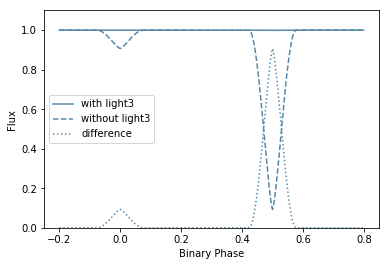


#######################################################

Number density per pixel Npx:  1.1747737189420406
foo foo  0.004889464127798689
a,r1,r2:  50.289958765542316 2.783855931413593e-07 0.02200298943410672
Crowding Lum, BinaryLum, LIGHT 3: 2.172564159562493 7.0069464153971905 0.3100586233667295
Secondary 2D distance:  1.6315913565008797

#######################################################

Number density per pixel Npx:  1.1747737189420406
foo foo  14.740638734039052
a,r1,r2:  144.13663492488908 0.0004974187168257367 9.713006001073584e-08
Crowding Lum, BinaryLum, LIGHT 3: 0.06524818826522868 8.435109983893373e-09 7735309.722080498
Secondary 2D distance:  2.563129802135182


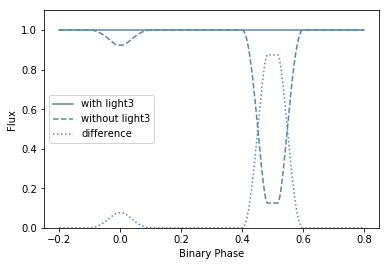


#######################################################

Number density per pixel Npx:  5.505062345708771
foo foo  0.760555901209153
a,r1,r2:  167.55009711834842 3.848426633692455e-05 4.478627384424076e-05
Crowding Lum, BinaryLum, LIGHT 3: 151.40856692047242 3.0915709851266232e-06 48974637.0531004
Secondary 2D distance:  3.088679670746593

#######################################################

Number density per pixel Npx:  5.505062345708771
foo foo  32.326869118260085
a,r1,r2:  179.97840328353576 5.8412798348311744e-05 7.778711081209323e-08
Crowding Lum, BinaryLum, LIGHT 3: 0.5382716077864393 1.1240735934132426e-06 478857.97775213356
Secondary 2D distance:  1.9737799135135412

#######################################################

Number density per pixel Npx:  4.935065988867879
foo foo  427.32695118289735
a,r1,r2:  119.29823231252315 0.009241942908148053 1.1735295426108648e-07
Crowding Lum, BinaryLum, LIGHT 3: 5.587498144698089 6.131304889855632 0.9113065236639459
Secondary 2D d

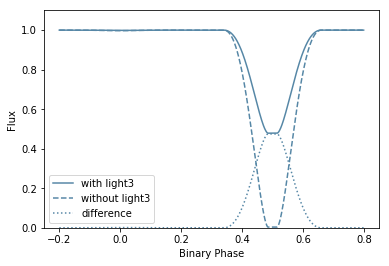


#######################################################

Number density per pixel Npx:  4.935065988867879
foo foo  137.87023901174587
a,r1,r2:  60.47182060933252 0.0002141035053103169 0.00019722896339674002
Crowding Lum, BinaryLum, LIGHT 3: 60.67281601596492 2.5769206611074027e-06 23544696.94456618
Secondary 2D distance:  0.47942043985334976

#######################################################

Number density per pixel Npx:  3.358306178825242
foo foo  1.3241389816828322
a,r1,r2:  31.688030710673146 4.4180719615638743e-07 0.008571841197025419
Crowding Lum, BinaryLum, LIGHT 3: 1.693114185566364 947.0372965310427 0.001787800957542189
Secondary 2D distance:  0.5186585043824242

#######################################################

Number density per pixel Npx:  3.358306178825242
foo foo  0.0321558409224609
a,r1,r2:  135.09131054461628 4.2769859068747504e-05 0.008485717392265293
Crowding Lum, BinaryLum, LIGHT 3: 0.3137127871768991 11.756760773144716 0.026683607264808427
Secondary 2D

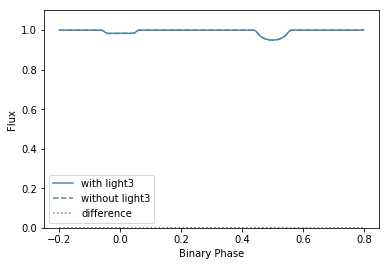


#######################################################

Number density per pixel Npx:  5.277407165539977
foo foo  0.012685361344618642
a,r1,r2:  33.0806375680166 6.773974852810214e-05 0.002147324192732003
Crowding Lum, BinaryLum, LIGHT 3: 1.1263379886530183 1.8487656994576976e-06 609237.8222851113
Secondary 2D distance:  1.6863260871566796


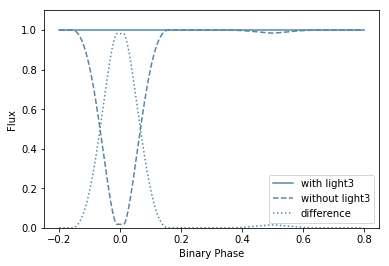


#######################################################

Number density per pixel Npx:  2.742768327317462
foo foo  0.8633111444981778
a,r1,r2:  95.24655081982563 1.4698694996822805e-07 1.4698694996822805e-07
Crowding Lum, BinaryLum, LIGHT 3: 0.04881753030337444 0.21777807376234554 0.22416182428285916
Secondary 2D distance:  1.3137374962869384

#######################################################

Number density per pixel Npx:  2.742768327317462
foo foo  53.385692416158115
a,r1,r2:  51.83821369398188 0.00021430268566164447 0.00022398108590148945
Crowding Lum, BinaryLum, LIGHT 3: 0.8202838454760358 2.355526153879199e-06 348238.05463809054
Secondary 2D distance:  1.5672969616120147

#######################################################

Number density per pixel Npx:  1.8452435155956537
foo foo  0.04682659654901625
a,r1,r2:  140.62187034042836 5.0090724939214855e-05 6.33415121823343e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.08362715857416303 0.0026043239396687187 32.11088962489082
Seco

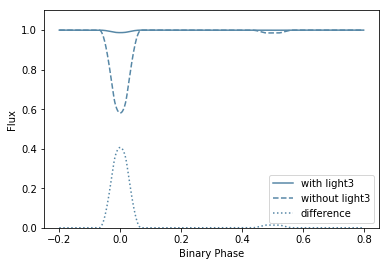


#######################################################

Number density per pixel Npx:  1.8452435155956537
foo foo  26.144141136088265
a,r1,r2:  103.14232868588059 9.110906025627131e-05 2.6103746247310898e-05
Crowding Lum, BinaryLum, LIGHT 3: 188.17356949007296 3.1047804053146997e-06 60607690.37577063
Secondary 2D distance:  1.7623177698290133

#######################################################

Number density per pixel Npx:  2.2107886951949296
foo foo  0.0013962139881332747
a,r1,r2:  168.82131710879162 8.292791597507877e-08 0.006509958473231704
Crowding Lum, BinaryLum, LIGHT 3: 0.020400076289484963 4.92575005036239 0.004141516739767199
Secondary 2D distance:  0.2950476164848349


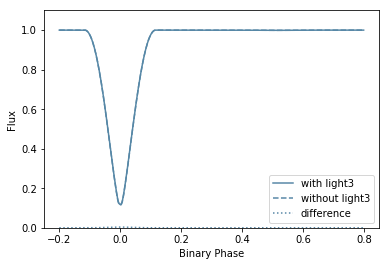


#######################################################

Number density per pixel Npx:  2.2107886951949296
foo foo  3.4335707439869076
a,r1,r2:  43.225821613696176 0.0002663108855154892 0.0003073683055989907
Crowding Lum, BinaryLum, LIGHT 3: 0.0781347190170546 0.0003225802198716306 242.21794829251456
Secondary 2D distance:  1.8945078022996158

#######################################################

Number density per pixel Npx:  2.879101682357285
foo foo  0.8165898680814111
a,r1,r2:  53.06201347887875 1.0398365034862154e-05 2.6384223066794626e-07
Crowding Lum, BinaryLum, LIGHT 3: 0.23442482583962285 0.4810888039290869 0.4872797369738361
Secondary 2D distance:  0.0846286954465561

#######################################################

Number density per pixel Npx:  2.879101682357285
foo foo  1.100002332582083
a,r1,r2:  185.25945207301433 7.556969343989169e-08 6.014030147489456e-08
Crowding Lum, BinaryLum, LIGHT 3: 19.02139751943618 8.165628414451699e-08 232944686.60576957
Secondary 

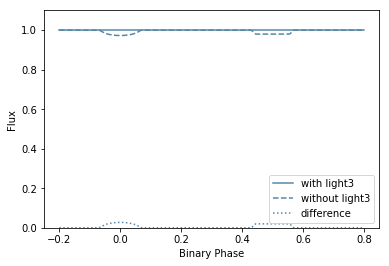


#######################################################

Number density per pixel Npx:  6.283204934127395
foo foo  33.209453409000375
a,r1,r2:  173.2212726010971 5.4302051306375004e-05 8.082148219889785e-08
Crowding Lum, BinaryLum, LIGHT 3: 2.88946109488919 1.2728961399370162e-06 2269989.674909504
Secondary 2D distance:  1.3212510198527068

#######################################################

Number density per pixel Npx:  6.283204934127395
foo foo  39.02058901398625
a,r1,r2:  56.6912768526673 0.0001945737729004895 0.00010762025377940861
Crowding Lum, BinaryLum, LIGHT 3: 0.3102603815782771 5.2816696524769526e-05 5874.286011673862
Secondary 2D distance:  1.1464785894502707

#######################################################

Number density per pixel Npx:  5.406286012971485
foo foo  0.007583226582834458
a,r1,r2:  158.73710418602292 8.81961408568566e-08 0.0075406885186260495
Crowding Lum, BinaryLum, LIGHT 3: 738.8629237434259 21.2296704875733 34.80331567915367
Secondary 2D dista

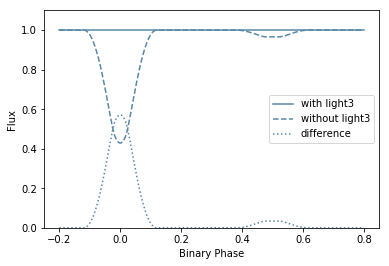


#######################################################

Number density per pixel Npx:  3.8911068407125606
foo foo  55.28094390213249
a,r1,r2:  142.58849934925527 7.223161412327214e-05 3.180146048658815e-05
Crowding Lum, BinaryLum, LIGHT 3: 777.8033091845891 3.0433049269149595e-06 255578500.30264932
Secondary 2D distance:  1.6342858623156342

#######################################################

Number density per pixel Npx:  1.7306897532656875
foo foo  0.3744312191403106
a,r1,r2:  206.54858989634658 6.778066123339645e-08 6.778066123339645e-08
Crowding Lum, BinaryLum, LIGHT 3: 0.010118711181394832 2.59909439284521e-10 38931680.23927731
Secondary 2D distance:  1.2975103971308382


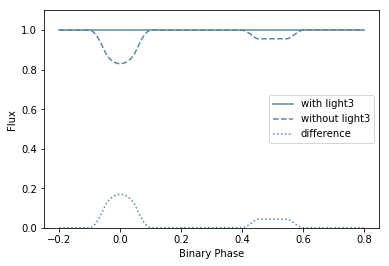


#######################################################

Number density per pixel Npx:  1.7306897532656875
foo foo  26.48611229829958
a,r1,r2:  112.52921448838322 0.0002328082277541222 8.745999049312871e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.10760469717183979 0.00048543429931681463 221.66686063032495
Secondary 2D distance:  0.8346520096322735

#######################################################

Number density per pixel Npx:  1.4341997306009595
foo foo  1.1766090412855483
a,r1,r2:  171.19113098457154 0.0069668187082546195 8.177993754397089e-08
Crowding Lum, BinaryLum, LIGHT 3: 0.11372728252746217 1.5193998138687292 0.07485013588219895
Secondary 2D distance:  1.2605850462038746


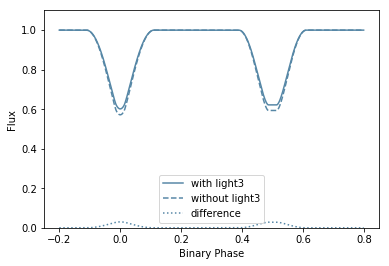


#######################################################

Number density per pixel Npx:  1.4341997306009595
foo foo  0.02427783305072755
a,r1,r2:  171.70325724973247 8.153601873514728e-08 5.7493991947984933e-05
Crowding Lum, BinaryLum, LIGHT 3: 15.869506959367072 1.2521803114157497e-06 12673499.82641443
Secondary 2D distance:  0.7342064246225846

#######################################################

Number density per pixel Npx:  2.3708377686887183
foo foo  0.3507312320704136
a,r1,r2:  182.6471996379102 7.665050451227484e-08 7.665050451227484e-08
Crowding Lum, BinaryLum, LIGHT 3: 0.05030737548296611 2.6097183064980265e-10 192769370.38646686
Secondary 2D distance:  1.239941343961224

#######################################################

Number density per pixel Npx:  2.3708377686887183
foo foo  0.1877243166724013
a,r1,r2:  145.9426841607034 3.238877878207688e-05 6.450672908523489e-05
Crowding Lum, BinaryLum, LIGHT 3: 4.019944417214401 0.018155469881893985 221.4178120073552
Seconda

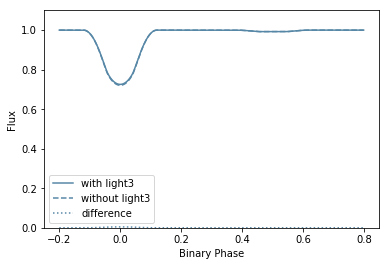


#######################################################

Number density per pixel Npx:  1.1482781776266846
foo foo  0.3495666330606365
a,r1,r2:  67.58523114514664 7.93578647167811e-05 2.071458477360753e-07
Crowding Lum, BinaryLum, LIGHT 3: 2.376703870660318 0.11388478910858767 20.86937060922299
Secondary 2D distance:  0.46764261213165154

#######################################################

Number density per pixel Npx:  4.089694699804418
foo foo  0.9770228838782157
a,r1,r2:  20.758794717605852 0.008983346095833913 6.744129507734081e-07
Crowding Lum, BinaryLum, LIGHT 3: 15.01266529322557 107.06641312713437 0.14021825196851426
Secondary 2D distance:  1.4145982417371687


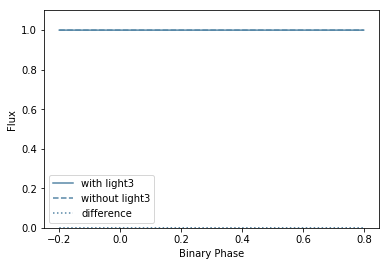


#######################################################

Number density per pixel Npx:  4.089694699804418
foo foo  0.44689721808622695
a,r1,r2:  28.43023734812546 4.924334548660772e-07 4.924334548660772e-07
Crowding Lum, BinaryLum, LIGHT 3: 11.751386307480521 0.0006815632857271123 17241.812394492154
Secondary 2D distance:  2.5784008027209637

#######################################################

Number density per pixel Npx:  5.633992648363869
foo foo  0.20495607053166792
a,r1,r2:  143.7070192418682 9.742043272386782e-08 4.134604641439279e-05
Crowding Lum, BinaryLum, LIGHT 3: 48.49175595585197 1.5709231518608755e-06 30868318.350525215
Secondary 2D distance:  0.426858917823491

#######################################################

Number density per pixel Npx:  5.633992648363869
foo foo  15.213090127722817
a,r1,r2:  188.1456516042395 4.6592326517270595e-05 2.309061843166004e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.2093429483339317 3.135008693804122e-06 66775.87489555193
Secondary 

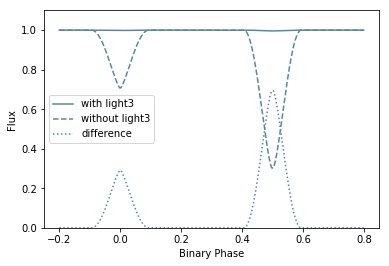


#######################################################

Number density per pixel Npx:  2.3807312906066826
foo foo  0.8644775185503976
a,r1,r2:  132.90780172368932 5.6590225306508014e-05 0.13175876945239254
Crowding Lum, BinaryLum, LIGHT 3: 0.07999172499704382 152.22310929674038 0.0005254900216307481
Secondary 2D distance:  4.485717870802552


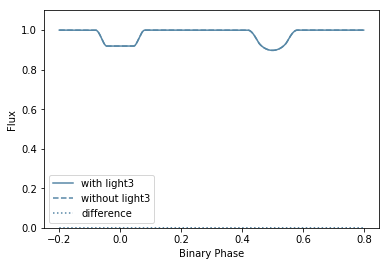


#######################################################

Number density per pixel Npx:  2.3807312906066826
foo foo  0.4435504764911801
a,r1,r2:  50.31725284732965 3.0433988327720555e-05 2.7823458570916365e-07
Crowding Lum, BinaryLum, LIGHT 3: 367.551933506087 0.14528057159372135 2529.94553555275
Secondary 2D distance:  2.6430269393123655

#######################################################

Number density per pixel Npx:  3.9990839553012525
foo foo  57.4295958813632
a,r1,r2:  109.17846388654085 9.630524033254268e-05 6.657353606579462e-05
Crowding Lum, BinaryLum, LIGHT 3: 646.3198713549177 2.783065446195639e-06 232233083.93211386
Secondary 2D distance:  1.1845098209899343

#######################################################

Number density per pixel Npx:  3.9990839553012525
foo foo  0.9040154373509811
a,r1,r2:  149.37110417850664 4.319008650371295e-05 5.60548721408351e-05
Crowding Lum, BinaryLum, LIGHT 3: 4.926053733271063 3.0018186050209016e-06 1641023.1201284605
Secondary 2D d

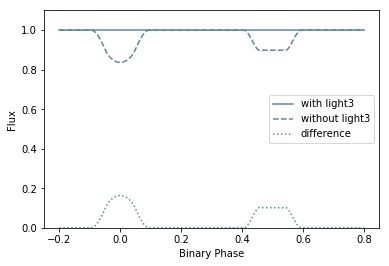


#######################################################

Number density per pixel Npx:  2.9610213588193686
foo foo  0.8473142796051024
a,r1,r2:  192.31059001735275 7.279890305955974e-08 7.279890305955974e-08
Crowding Lum, BinaryLum, LIGHT 3: 3.5438271539055224 2.3125517755162397 1.5324314860429105
Secondary 2D distance:  1.5181581128398751

#######################################################

Number density per pixel Npx:  2.9610213588193686
foo foo  184.8198515709108
a,r1,r2:  161.04769042199695 0.007457705617423844 8.693077164481825e-08
Crowding Lum, BinaryLum, LIGHT 3: 0.254253279868384 22.201885691679383 0.011451877709814111
Secondary 2D distance:  0.6460533072305484

#######################################################

Number density per pixel Npx:  4.299233335850994
foo foo  62.64315128662407
a,r1,r2:  177.4594458314712 5.8465831173010555e-05 3.43242106225764e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.9096307348491477 2.9411659449767705e-06 309275.5566555875
Secondary 2D di

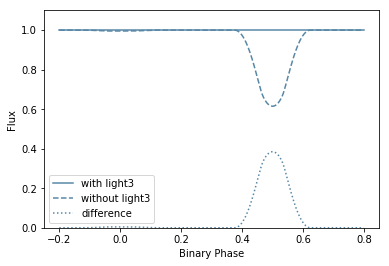


#######################################################

Number density per pixel Npx:  4.299233335850994
foo foo  0.14716364807417362
a,r1,r2:  133.56441906097427 1.0481833484117337e-07 1.0481833484117337e-07
Crowding Lum, BinaryLum, LIGHT 3: 0.36015947412622573 2.512671760970098e-10 1433372554.746962
Secondary 2D distance:  2.0809486840399183


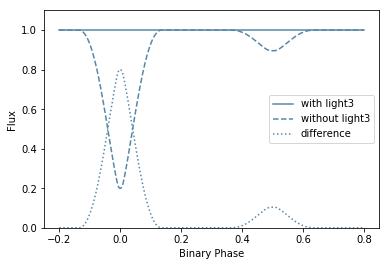


#######################################################

Number density per pixel Npx:  1.4750230558562827
foo foo  11.702260594340085
a,r1,r2:  32.23948836328673 4.342500675644325e-07 0.00018422612373852193
Crowding Lum, BinaryLum, LIGHT 3: 402.62687979390324 0.02019615358506968 19935.819862825334
Secondary 2D distance:  1.2362165680539996

#######################################################

Number density per pixel Npx:  1.4750230558562827
foo foo  0.15600678944133345
a,r1,r2:  127.19395756239888 1.7992956986590182e-05 7.057145923379815e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.03293797671039199 3.129727489822182e-06 10524.231524152088
Secondary 2D distance:  2.3282500296287645

#######################################################

Number density per pixel Npx:  6.779943880795806
foo foo  9.721386412934555
a,r1,r2:  33.0208786271383 4.239741818527524e-07 0.00013956481233624504
Crowding Lum, BinaryLum, LIGHT 3: 8.847746898635735 0.029307554381027164 301.8930472193716
Secondary 

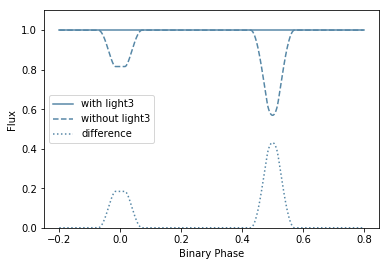


#######################################################

Number density per pixel Npx:  4.664571510092587
foo foo  0.212812098769443
a,r1,r2:  40.80790946675593 0.0001520006354046796 3.430707473855054e-07
Crowding Lum, BinaryLum, LIGHT 3: 0.08585342613890559 0.048725689750184605 1.7619745678116403
Secondary 2D distance:  1.3431136835225923

#######################################################

Number density per pixel Npx:  4.664571510092587
foo foo  6.399650904771975
a,r1,r2:  133.00955890057398 6.18406860051882e-05 8.669398334019127e-05
Crowding Lum, BinaryLum, LIGHT 3: 5.942411649959657 11.223630514004244 0.5294553881246389
Secondary 2D distance:  3.6844563273520294


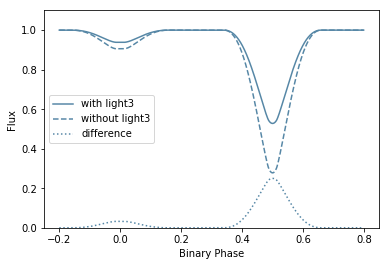


#######################################################

Number density per pixel Npx:  2.6683842279468823
foo foo  0.23222031760801365
a,r1,r2:  30.294406502402573 0.0002765249642996847 4.621315158918758e-07
Crowding Lum, BinaryLum, LIGHT 3: 19.642982070537595 0.04534660698700508 433.1742411547276
Secondary 2D distance:  2.0422048870675655

#######################################################

Number density per pixel Npx:  2.6683842279468823
foo foo  0.03316548228925123
a,r1,r2:  50.6947491616212 0.00018996345194763814 0.0002635126243890462
Crowding Lum, BinaryLum, LIGHT 3: 8.520278147026684 4.1744295961045316e-05 204106.40426125724
Secondary 2D distance:  2.8062682536267767


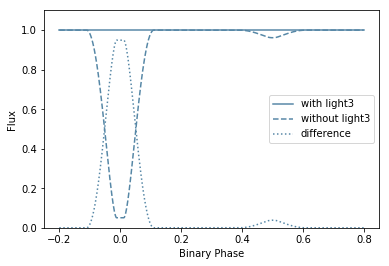


#######################################################

Number density per pixel Npx:  4.680287142914328
foo foo  6.45793051085116
a,r1,r2:  104.48747681876279 4.012385412016906e-05 1.3398734878327565e-07
Crowding Lum, BinaryLum, LIGHT 3: 6.776300153312939 0.00039970852132990435 16953.104053841365
Secondary 2D distance:  0.33579224065759505


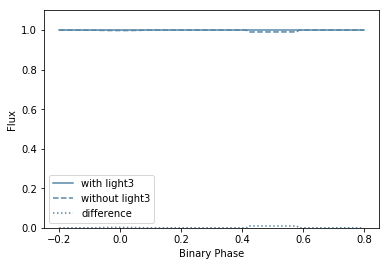


#######################################################

Number density per pixel Npx:  4.680287142914328
foo foo  0.002938230893187179
a,r1,r2:  79.7059684544984 1.7564556671803258e-07 0.013926183777857756
Crowding Lum, BinaryLum, LIGHT 3: 2.477135678208624 8.625102742038695 0.287200715434389
Secondary 2D distance:  1.048583316592979

#######################################################

Number density per pixel Npx:  3.138420284448454
foo foo  4.307522265242721
a,r1,r2:  135.23853395346572 1.0352079093682918e-07 8.026106477814308e-08
Crowding Lum, BinaryLum, LIGHT 3: 0.06266792310780656 0.0015743864590151582 39.80466342870343
Secondary 2D distance:  0.4085005486260916

#######################################################

Number density per pixel Npx:  3.138420284448454
foo foo  0.4454542444711687
a,r1,r2:  81.22886558518533 7.411584905409307e-05 6.842612489202561e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.7452727198099972 0.00481992698429399 154.62323853421668
Secondary 2D dista

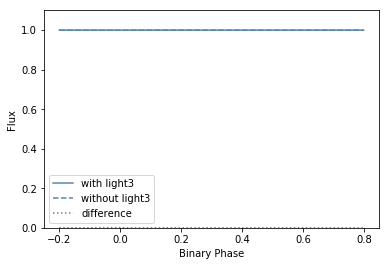


#######################################################

Number density per pixel Npx:  4.255149112283439
foo foo  1.9615914034428144
a,r1,r2:  148.26400765997488 9.442615386538899e-08 3.072224528949251e-05
Crowding Lum, BinaryLum, LIGHT 3: 55.0108378261373 1.7749809565478722e-06 30992353.8183344
Secondary 2D distance:  4.847587105166738

#######################################################

Number density per pixel Npx:  4.255149112283439
foo foo  1.0624313596989443
a,r1,r2:  213.22390426540446 6.565867953798414e-08 6.565867953798414e-08
Crowding Lum, BinaryLum, LIGHT 3: 0.11185100251645894 2.652420472231913e-10 421694085.4115053
Secondary 2D distance:  0.6742785870906614

#######################################################

Number density per pixel Npx:  5.927917293718929
foo foo  0.07974612775443857
a,r1,r2:  101.03837473952186 9.661681101273639e-05 0.005203031537714253
Crowding Lum, BinaryLum, LIGHT 3: 1.1352769557838336 0.10980235709216304 10.33927673183677
Secondary 2D di

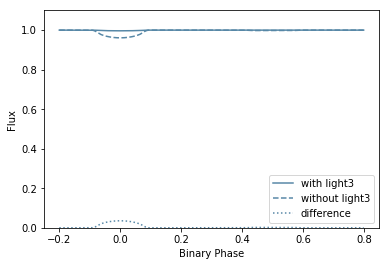


#######################################################

Number density per pixel Npx:  5.927917293718929
foo foo  22.635822776831546
a,r1,r2:  122.9161166719587 7.334919579775472e-05 3.863085584162334e-05
Crowding Lum, BinaryLum, LIGHT 3: 1.8176033830426397 0.0042932218346014225 423.3658201385216
Secondary 2D distance:  3.1494503311435937


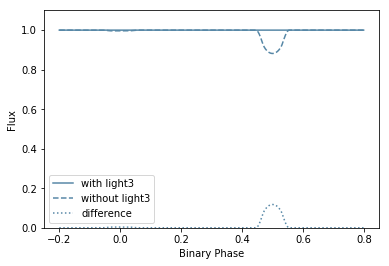


#######################################################

Number density per pixel Npx:  1.0687098377274173
foo foo  0.21572776169903393
a,r1,r2:  103.01000906750647 7.467232437347336e-05 8.263907883702444e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.01597426769340215 0.013846409532530881 1.1536758071377318
Secondary 2D distance:  1.1042365152887943

#######################################################

Number density per pixel Npx:  1.0687098377274173
foo foo  127.44645253105855
a,r1,r2:  79.77891252333124 0.015235780837659337 1.7548496911268022e-07
Crowding Lum, BinaryLum, LIGHT 3: 0.21165971136951095 23.979877387402308 0.008826555196679412
Secondary 2D distance:  0.7105076273657296

#######################################################

Number density per pixel Npx:  3.886479202485112
foo foo  1.400785833818269
a,r1,r2:  16.4355227147961 8.51813492210776e-07 0.017789006030589468
Crowding Lum, BinaryLum, LIGHT 3: 0.47475531980678 825.0674278071781 0.0005754139647332344
Secondary 2D d

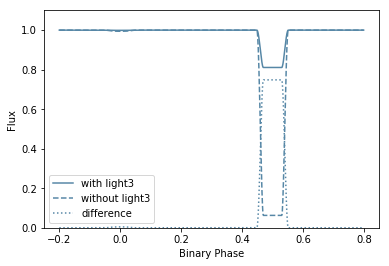


#######################################################

Number density per pixel Npx:  3.3575181053318874
foo foo  3.5099087897527417
a,r1,r2:  10.541043436230726 1.3281417617425292e-06 0.011755844688517494
Crowding Lum, BinaryLum, LIGHT 3: 10.670337729768365 23.46171635198695 0.45479783190988515
Secondary 2D distance:  1.0989057821561936

#######################################################

Number density per pixel Npx:  3.3575181053318874
foo foo  9.42862316640367
a,r1,r2:  55.47202909572055 0.00017702481411103937 0.0002071524439777006
Crowding Lum, BinaryLum, LIGHT 3: 2.3121705069296152 0.002802908855946629 824.9181924071961
Secondary 2D distance:  1.3394665895642854


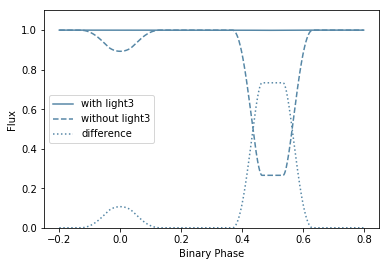


#######################################################

Number density per pixel Npx:  2.2918725956972916
foo foo  6.2692251744408125
a,r1,r2:  204.01020372245551 2.8734670679671328e-05 6.862401852726061e-08
Crowding Lum, BinaryLum, LIGHT 3: 64.77370838158835 1.57305276837538e-06 41177072.81268475
Secondary 2D distance:  3.7316989904077356


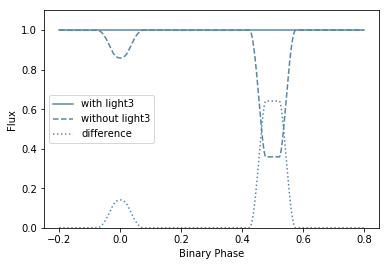


#######################################################

Number density per pixel Npx:  2.2918725956972916
foo foo  0.2915992304020089
a,r1,r2:  100.39594949356153 1.394478569167557e-07 1.394478569167557e-07
Crowding Lum, BinaryLum, LIGHT 3: 0.2775844966965576 0.0002976794733296561 932.4945841635345
Secondary 2D distance:  10.685046783871602


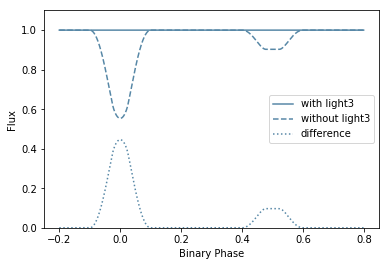


#######################################################

Number density per pixel Npx:  5.265173313582307
foo foo  0.04163084753179378
a,r1,r2:  180.66424002661407 1.8247857893684508e-07 5.162835808051506e-05
Crowding Lum, BinaryLum, LIGHT 3: 524.9827343368731 0.005214198955915518 100683.29551201325
Secondary 2D distance:  11.469764696224644

#######################################################

Number density per pixel Npx:  5.265173313582307
foo foo  0.9855262712573721
a,r1,r2:  194.62048270839074 7.193487450638418e-08 7.193487450638418e-08
Crowding Lum, BinaryLum, LIGHT 3: 31.984645423560668 2.6898300582683163e-10 118909539750.44817
Secondary 2D distance:  2.4127552423977296

#######################################################

Number density per pixel Npx:  3.6025978951566127
foo foo  0.040213007516932894
a,r1,r2:  156.72701958790685 8.93272904494143e-08 6.63341782672088e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.028445057606682735 1.136866802326287e-06 25020.571933737272
Seco

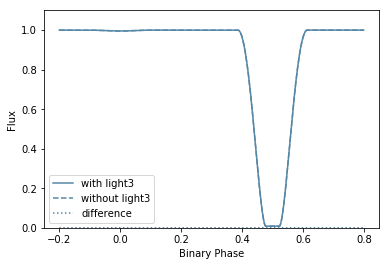


#######################################################

Number density per pixel Npx:  1.717770614582006
foo foo  0.0029367167791557965
a,r1,r2:  165.3006300753693 8.469417202836226e-08 0.006613700315549896
Crowding Lum, BinaryLum, LIGHT 3: 0.0023407823310119587 3.9612981861658816 0.0005909129333375403
Secondary 2D distance:  1.3257261552213957


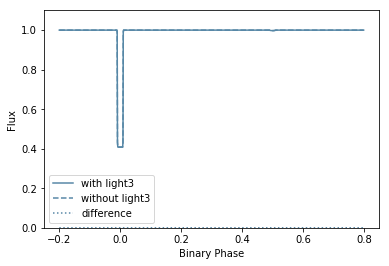


#######################################################

Number density per pixel Npx:  1.717770614582006
foo foo  0.4000006706422427
a,r1,r2:  114.8570292466699 6.741811876336375e-05 7.750828114827841e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.031552674116922357 0.02335325705332176 1.3511037901428107
Secondary 2D distance:  2.5525209747605775

#######################################################

Number density per pixel Npx:  1.1117961252283195
foo foo  0.4278097533394791
a,r1,r2:  185.44053403222006 2.7684811680629747e-05 2.421674156312607e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.9522671604804315 3.4455967223217136e-06 276372.2040688425
Secondary 2D distance:  1.6402747683303727

#######################################################

Number density per pixel Npx:  1.1117961252283195
foo foo  0.174095324628056
a,r1,r2:  102.99898355095264 1.3592367145132387e-07 1.3592367145132387e-07
Crowding Lum, BinaryLum, LIGHT 3: 566.8202233436016 0.00011820997201504729 4795028.826091333
Second

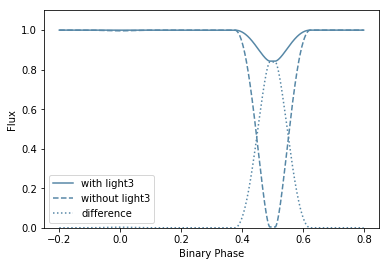


#######################################################

Number density per pixel Npx:  3.059236326700952
foo foo  4.474037243548995
a,r1,r2:  151.00126798638857 0.015082610644831856 6.797241990470192e-05
Crowding Lum, BinaryLum, LIGHT 3: 7.853413307693318 149.3709034851208 0.05257659373048925
Secondary 2D distance:  3.2732026731138357

#######################################################

Number density per pixel Npx:  6.491875148098364
foo foo  0.030774190514444973
a,r1,r2:  19.251238963073032 0.0007496593827508933 0.0008901477394181791
Crowding Lum, BinaryLum, LIGHT 3: 361.7129941336583 0.0007837587740416667 461510.6154006879
Secondary 2D distance:  0.9783292656520914

#######################################################

Number density per pixel Npx:  6.491875148098364
foo foo  255.70350247070226
a,r1,r2:  168.46156494007442 0.006645593361878195 8.310500976872746e-08
Crowding Lum, BinaryLum, LIGHT 3: 75.06511498439379 10.363694913791843 7.243084209715428
Secondary 2D distanc

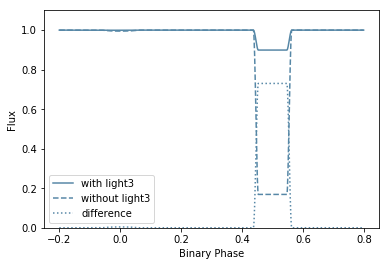


#######################################################

Number density per pixel Npx:  1.7995638269582266
foo foo  60.056177366992706
a,r1,r2:  193.06917370497226 5.0646675845800774e-05 7.251287054966791e-08
Crowding Lum, BinaryLum, LIGHT 3: 2.134834688095242 1.2545743272128077e-06 1701640.661528633
Secondary 2D distance:  1.3741044925805581

#######################################################

Number density per pixel Npx:  1.7995638269582266
foo foo  79.1199436230389
a,r1,r2:  12.138228398518772 1.1533808345300554e-06 0.49006883714187627
Crowding Lum, BinaryLum, LIGHT 3: 0.1656750377984783 3195.384346859144 5.1848234770670436e-05
Secondary 2D distance:  1.913268282040244


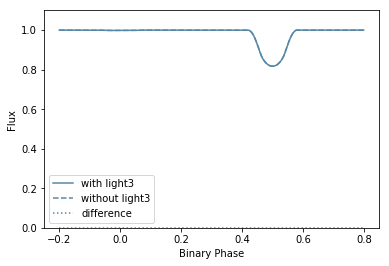


#######################################################

Number density per pixel Npx:  1.5958445256605707
foo foo  1.7527298466535117
a,r1,r2:  43.1294681228564 3.2460404937339627e-07 0.0001581385788526925
Crowding Lum, BinaryLum, LIGHT 3: 0.011791822523719473 0.22819104092988132 0.05167522123422396
Secondary 2D distance:  3.683556196776802

#######################################################

Number density per pixel Npx:  1.5958445256605707
foo foo  0.002201611307288828
a,r1,r2:  135.55745486510915 1.0327724147617816e-07 0.0077740108626128445
Crowding Lum, BinaryLum, LIGHT 3: 0.12679346259910135 2.6412690259729747 0.04800475125868481
Secondary 2D distance:  1.0134133978000788


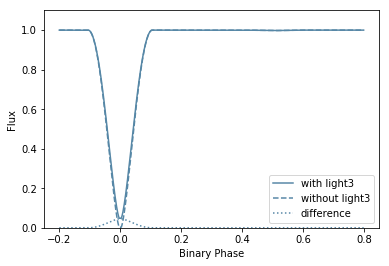


#######################################################

Number density per pixel Npx:  5.674013456954461
foo foo  29.214867935614123
a,r1,r2:  146.95194067144269 0.008158594218370122 8.023848363052343e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.31575818202118566 11.17012639421056 0.028268093921017947
Secondary 2D distance:  5.164095733690581

#######################################################

Number density per pixel Npx:  5.674013456954461
foo foo  36.126240432208
a,r1,r2:  125.80140972666722 6.905576913746041e-05 2.6684894750927857e-05
Crowding Lum, BinaryLum, LIGHT 3: 16.203522161923782 0.0033080821165344288 4898.162013855543
Secondary 2D distance:  4.10586915881261

#######################################################

Number density per pixel Npx:  1.4915796741825345
foo foo  11.763480119440086
a,r1,r2:  43.92769825347347 0.024620102714141064 0.0002676573483418401
Crowding Lum, BinaryLum, LIGHT 3: 0.2844407907950386 2.963195282155985 0.09599124043828894
Secondary 2D distanc

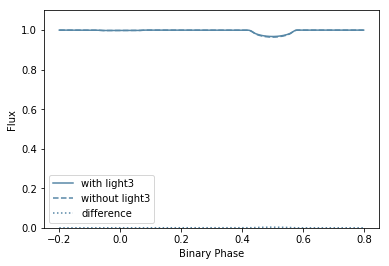


#######################################################

Number density per pixel Npx:  1.4915796741825345
foo foo  0.6958363877648296
a,r1,r2:  153.10543469333697 9.144025506371701e-08 9.144025506371701e-08
Crowding Lum, BinaryLum, LIGHT 3: 0.028099815133157992 2.475917796950542e-10 113492520.50196116
Secondary 2D distance:  0.8435137193008577

#######################################################

Number density per pixel Npx:  1.916553851087003
foo foo  0.09969886132852303
a,r1,r2:  177.47247027901878 3.193129566478041e-05 4.410078578317403e-05
Crowding Lum, BinaryLum, LIGHT 3: 12.108122856810148 3.128119200201891e-06 3870735.7622525003
Secondary 2D distance:  3.5631386004810537

#######################################################

Number density per pixel Npx:  1.916553851087003
foo foo  0.2119293763479926
a,r1,r2:  87.23551446195133 1.3876645857841027e-07 1.604850969968916e-07
Crowding Lum, BinaryLum, LIGHT 3: 1.4749075537819651 4.554322639642682e-05 32384.784093769907
Seco

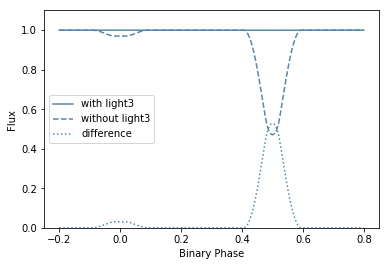


#######################################################

Number density per pixel Npx:  2.0217763473975316
foo foo  0.08848262298654694
a,r1,r2:  135.18986031884975 1.0355806246844651e-07 0.0005427725273831152
Crowding Lum, BinaryLum, LIGHT 3: 7.5706865342380905 7.86040319291722e-09 963142264.8980418
Secondary 2D distance:  3.6850420548234264

#######################################################

Number density per pixel Npx:  4.468781758530374
foo foo  3.9403632643417783
a,r1,r2:  170.98964881991725 8.187630126513979e-08 6.351444874640302e-08
Crowding Lum, BinaryLum, LIGHT 3: 0.23799234737641534 3.0407474214834783e-06 78267.71329146007
Secondary 2D distance:  2.1269790272086144

#######################################################

Number density per pixel Npx:  4.468781758530374
foo foo  0.6256685306936354
a,r1,r2:  156.36603426336498 8.953351068826117e-08 8.953351068826117e-08
Crowding Lum, BinaryLum, LIGHT 3: 0.2013662178845401 0.001385798847666555 145.30696011445377
Seconda

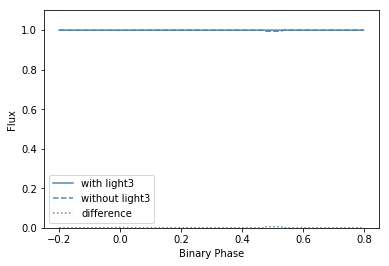


#######################################################

Number density per pixel Npx:  3.8934693715297257
foo foo  0.060326512351318425
a,r1,r2:  80.57243348139804 0.00011803218507983835 0.00011612772432514624
Crowding Lum, BinaryLum, LIGHT 3: 375.0141837128985 0.00224596935497255 166972.0839612622
Secondary 2D distance:  3.8713082521038817

#######################################################

Number density per pixel Npx:  1.0095591026640598
foo foo  0.5530444285722304
a,r1,r2:  68.32661157609672 8.444857093724406e-05 2.048982040388161e-07
Crowding Lum, BinaryLum, LIGHT 3: 1.6877970560749556 0.23163675151764102 7.286395811618072
Secondary 2D distance:  0.4064774973856406

#######################################################

Number density per pixel Npx:  1.0095591026640598
foo foo  0.009505614337933397
a,r1,r2:  84.73849487957173 5.740804925621869e-05 0.00012415742186852496
Crowding Lum, BinaryLum, LIGHT 3: 0.03292322069650702 2.9415177004704044e-06 11192.596492362421
Second

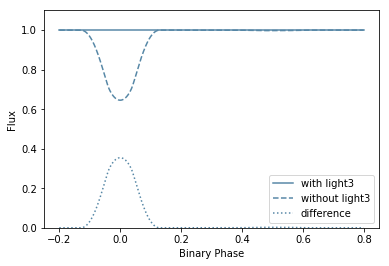


#######################################################

Number density per pixel Npx:  4.05653473225117
foo foo  5.167797369347293
a,r1,r2:  174.33881187639756 3.6954990793544863e-05 4.437875280263066e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.33163929892417665 3.0237992926601836e-06 109676.35971381467
Secondary 2D distance:  19.028288389605073


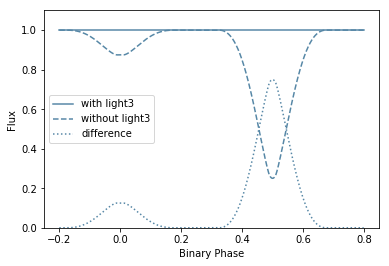


#######################################################

Number density per pixel Npx:  4.05653473225117
foo foo  0.3920339037709566
a,r1,r2:  232.64312090260475 6.017800975882305e-08 6.017800975882305e-08
Crowding Lum, BinaryLum, LIGHT 3: 1.1445576989423427 2.7143802462497e-10 4216644666.9500747
Secondary 2D distance:  1.1329354740090445

#######################################################

Number density per pixel Npx:  3.8972421817914626
foo foo  0.013163619104222106
a,r1,r2:  109.10749817483013 1.2831382108649287e-07 9.095074306280848e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.07327199900421029 1.2382729707199713e-06 59172.7355250334
Secondary 2D distance:  1.9451821708699888


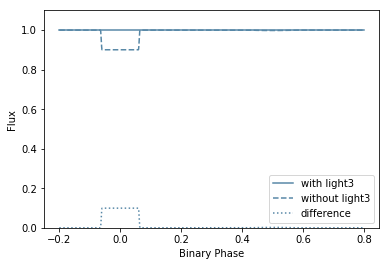


#######################################################

Number density per pixel Npx:  3.8972421817914626
foo foo  1.587260461715293
a,r1,r2:  209.04429863087637 6.697145098762414e-08 6.697145098762414e-08
Crowding Lum, BinaryLum, LIGHT 3: 3.1453808281701052 2.737375604536511e-10 11490497770.775148
Secondary 2D distance:  3.581716585142672

#######################################################

Number density per pixel Npx:  2.278557639850081
foo foo  3.2480758768788194
a,r1,r2:  68.71365195455053 0.00016324248421374911 0.00014964868406359128
Crowding Lum, BinaryLum, LIGHT 3: 0.022399754091131 0.000137139086780605 163.33603071869737
Secondary 2D distance:  1.0223239153902408

#######################################################

Number density per pixel Npx:  2.278557639850081
foo foo  17.29355861970517
a,r1,r2:  90.14562409909838 0.00011068693196508703 4.351468813840946e-05
Crowding Lum, BinaryLum, LIGHT 3: 0.5901647634092669 0.0066585893476515225 88.63210097457315
Secondary 2D

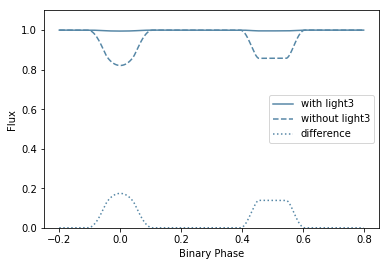


#######################################################

Number density per pixel Npx:  2.5971511322279883
foo foo  0.981243730179043
a,r1,r2:  124.88638927294302 5.952551702151056e-05 7.806344465331138e-05
Crowding Lum, BinaryLum, LIGHT 3: 1.2105443186431262 0.06118596982815602 19.78467158472772
Secondary 2D distance:  1.6110138680587018

#######################################################

Number density per pixel Npx:  6.373077569524492
foo foo  4.575508909793406
a,r1,r2:  16.466195891432193 8.502267367828764e-07 0.0005696481516815222
Crowding Lum, BinaryLum, LIGHT 3: 0.8599293153049611 0.03921774120451234 21.927048547253374
Secondary 2D distance:  1.9418650533232809

#######################################################

Number density per pixel Npx:  6.373077569524492
foo foo  1.9000251008158415
a,r1,r2:  106.00361628605324 1.320709659774311e-07 1.320709659774311e-07
Crowding Lum, BinaryLum, LIGHT 3: 875.3826590299183 2.728818237661855e-10 3207918530257.1714
Secondary 2D di

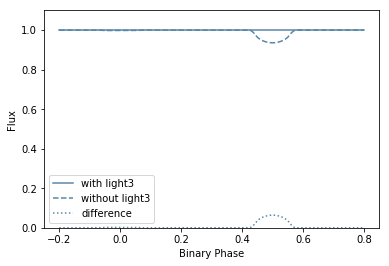


#######################################################

Number density per pixel Npx:  1.255174973618764
foo foo  0.6368910987286877
a,r1,r2:  138.11157554915948 1.013673180132308e-07 0.0005414446973759198
Crowding Lum, BinaryLum, LIGHT 3: 0.00290675196227901 3.121816233845028 0.0009311092468434212
Secondary 2D distance:  1.4955844021320621

#######################################################

Number density per pixel Npx:  1.255174973618764
foo foo  10.571148760388123
a,r1,r2:  33.2259214304005 0.00041248869267924987 0.00043227966430296885
Crowding Lum, BinaryLum, LIGHT 3: 0.037346433177170166 8.437980497452855e-05 442.59918814038275
Secondary 2D distance:  1.308538622731203

#######################################################

Number density per pixel Npx:  1.0817339790280278
foo foo  3.564817138274173
a,r1,r2:  163.52488712905597 8.561387961057584e-08 8.561387961057584e-08
Crowding Lum, BinaryLum, LIGHT 3: 0.01667096424648403 2.5898843331371385e-10 64369532.00257564
Second

IndexError: index 1 is out of bounds for axis 0 with size 1

In [38]:
# Want to run this for both M67 (OC) and M10 (GC)
M67 = OCs.loc[np.where(OCs['ID'] == 'NGC_2682')]
M10 = GCs.loc[np.where(GCs['ID'] == 'NGC 6254')]

M67_rhm = M67['rhm[pc]'].values[0]
M67_mass = M67['mass[Msun]'].values[0]
M67_dist = M67['dist[pc]'].values[0]

M10_rhm = M10['rhm[pc]'].values[0]
M10_mass = M10['mass[Msun]'].values[0]
M10_dist = M10['dist[pc]'].values[0]

# M67 distance and number density lists
d_M67 = []
nPx_M67 = []

# M10 distance and number density lists
d_M10 = []
nPx_M10 = []

# Light 3 lists
light3_m10 = []
light3_m67 = []

n = 0
# Drawing large # of binaries (~1000) for each cluster, each at random 2D dist
for i in range(0,1000):
    
    m67_crowd = Crowding(M67_rhm, M67_mass, M67_dist,n)
    m10_crowd = Crowding(M10_rhm, M10_mass, M10_dist,n)

#     Random distances
    dM67 = m67_crowd.getPosition()[2]
    dM10 = m10_crowd.getPosition()[2]
    d_M67.append(dM67)
    d_M10.append(dM10)
    
#     Number density
    nM67 = m67_crowd.StarsAroundMe()
    nM10 = m10_crowd.StarsAroundMe()
    nPx_M67.append(nM67)
    nPx_M10.append(nM10)
    
    fluxM67 = m67_crowd.fluxAdded(nM67, n) #
    fluxM10 = m10_crowd.fluxAdded(nM10,n)

#     Getting extra flux from background stars
    light3M67 = m67_crowd.fluxAdded(nM67,n)
    light3M10 = m10_crowd.fluxAdded(nM10,n)
    
#     Appending light3 values to lists for each test cluster
    light3_m10.append(np.max(light3M10))
    d_M10.append(dM10)
    light3_m67.append(np.max(light3M67))
    d_M67.append(dM67)
    

    n+= 1
#     print(n)
#     print('d, n, flux:',dM10, nM10)

# PLEASE CLEAN 


In [ ]:
# Plots of random d2D versus pixel density at that random pos for M67 and M10
print(len(d_M67),len(nPx_M67))
f,ax = plt.subplots()
ax.scatter(d_M67,nPx_M67)
ax.set_title('M67')
ax.set_xlabel('d [pc]')
ax.set_ylabel('log $n_{px}$')
ax.set_ylim(0,0.5)

f,ax = plt.subplots()
ax.scatter(d_M10,nPx_M10)
ax.set_title('M10')
ax.set_xlabel('d [pc]')
ax.set_ylabel('$n_{px}$')
ax.set_ylim(0,0.5)


In [ ]:
# Histogram of pixel number density for OC (M67) and GC (M10)
# M67 first
f,ax = plt.subplots()
ax.hist(nPx_M67, bins = 30)
# ax.set_xlim(0,0.5) 
ax.set_xlabel('$n_{px}$', fontsize = 16)
ax.set_title('M67 - Open')

# M10 
f,ax = plt.subplots()
ax.hist(nPx_M10, bins = 30)
# ax.set_xlim(0,10)
ax.set_xlabel('$n_{px}$', fontsize = 16)
ax.set_title('M10 - Globular')

In [ ]:
# Plot of random distance from cluster center to light 3 added (should be negatively correlated as above)
# M67

print(len(d_M67),len(light3_m67))
f,ax = plt.subplots()
ax.scatter(d_M67,light3_m67)
ax.set_ylim(0,2)
ax.set_xlabel('d [pc]')
ax.set_ylabel('light3')
ax.set_title('M67 - Open')

# M10
f,ax = plt.subplots()
ax.scatter(d_M10,light3_m10)
ax.set_xlabel('d [pc]')
ax.set_ylabel('light3')
ax.set_title('M10 - Globular')